# Importing libraries

In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Reading data and basic analysis on data

In [331]:
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [332]:
df.shape

(1460, 81)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [334]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [335]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [336]:
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [337]:
# Columns MSSubClass, OverallQual, OverallCond needs to be transformed to object-type
# Column LotFrontage and MasVnrArea needss to be transformed to numeric-type.

In [338]:
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [339]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [340]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave   NaN      Reg   
1   2         20       RL         80.0     9600   Pave   NaN      Reg   
2   3         60       RL         68.0    11250   Pave   NaN      IR1   
3   4         70       RL         60.0     9550   Pave   NaN      IR1   
4   5         60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold SaleType SaleCondition  SalePrice  
0   2008       WD        Normal     208500  
1   2007       WD        Normal     181500  
2   2008       WD        Normal     223500  
3   2006       WD       Abnorml     140000  
4   2008       WD        Normal     250000  

[5 rows x 81 columns]

# EDA

In [341]:
# Extracting numerical variables
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  WoodDeckSF  OpenPorchSF  \
0           0        150          856  ...           0           61   
1           0        284         1262  ...         298            0   
2           0        434          920  ...           0           42   
3           0        540          756  ...           0           35   
4           0        490         1145  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 35 columns]

In [342]:
# removing prediction variable
df_numeric = df_numeric.drop('SalePrice', axis=1)
df_numeric.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  GarageArea  WoodDeckSF  \
0           0        150          856  ...         548           0   
1           0        284         1262  ...         460         298   
2           0        434          920  ...         608           0   
3           0        540          756  ...         642           0   
4           0        490         1145  ...         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  
0       2    2008  
1       5    2007  
2       9    2008  
3       2    2006  
4      12    2008  

[5 rows x 34 columns]

In [343]:
# Extracting categorical variables
df_categorical = df.select_dtypes(include='object')
df_categorical.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageType GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
1       Gtl      Veenker  ...     Attchd          RFn         TA         TA   
2       Gtl      CollgCr  ...     Attchd          RFn         TA         TA   
3       Gtl      Crawfor  ...     Detchd          Unf         TA         TA   
4       Gtl      NoRidge  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 46 columns]

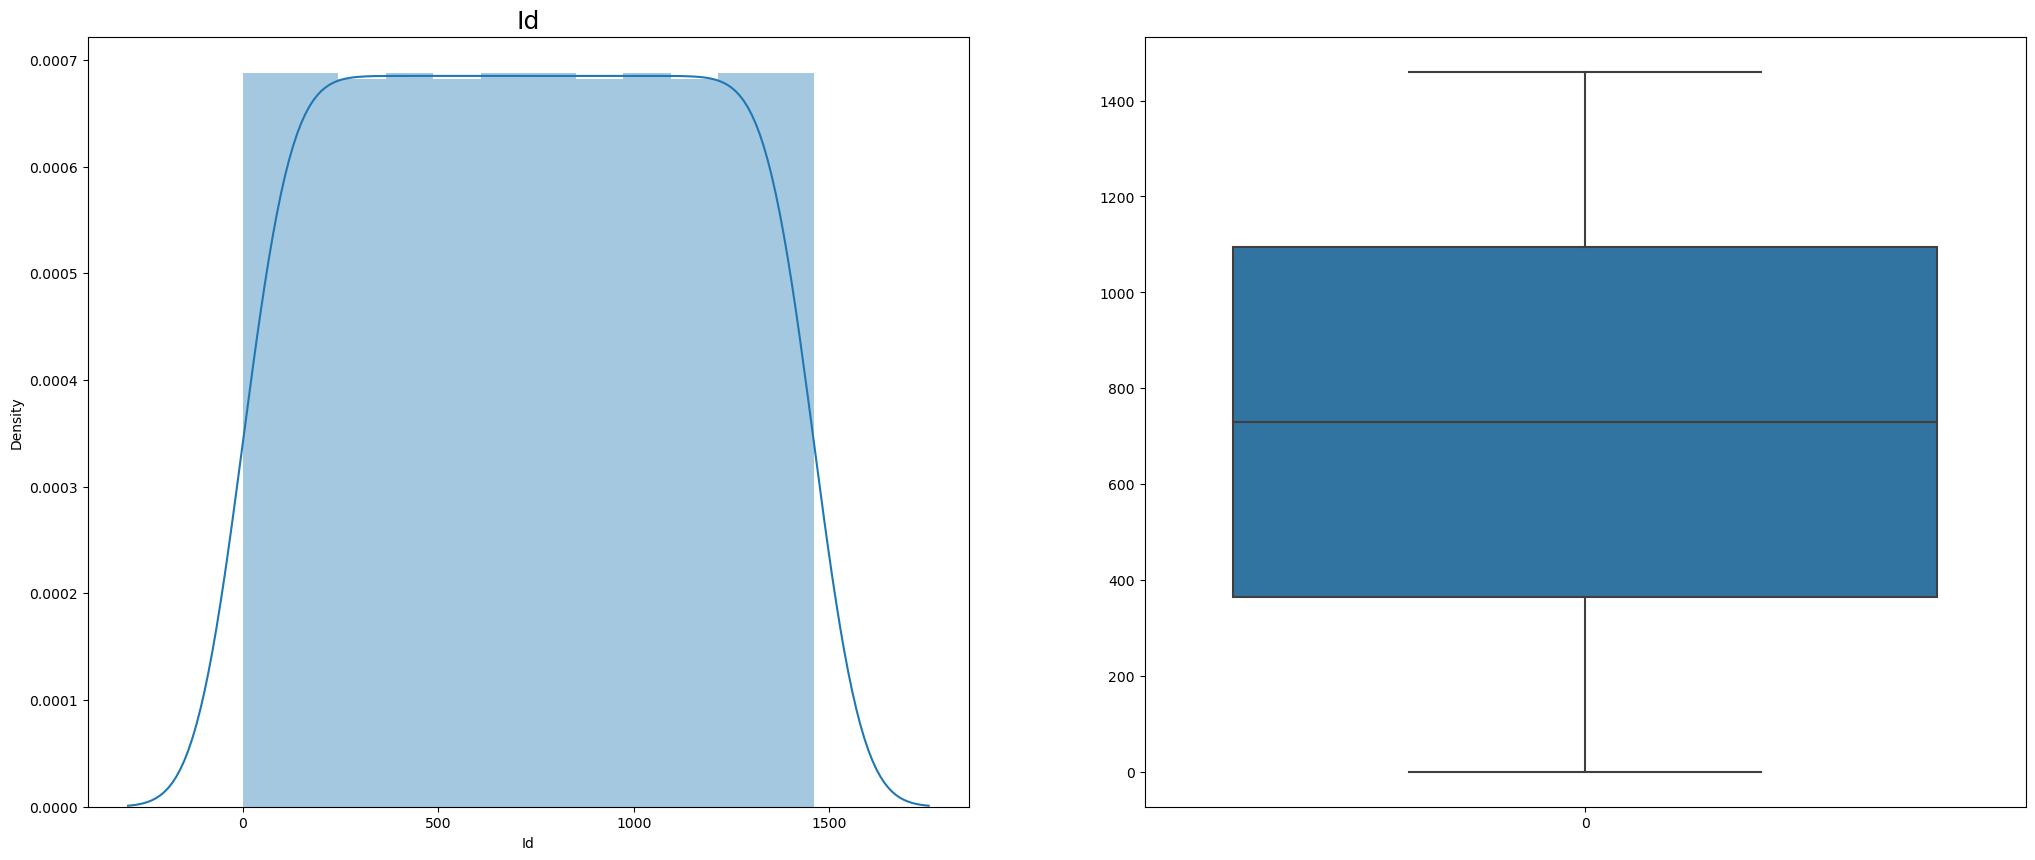

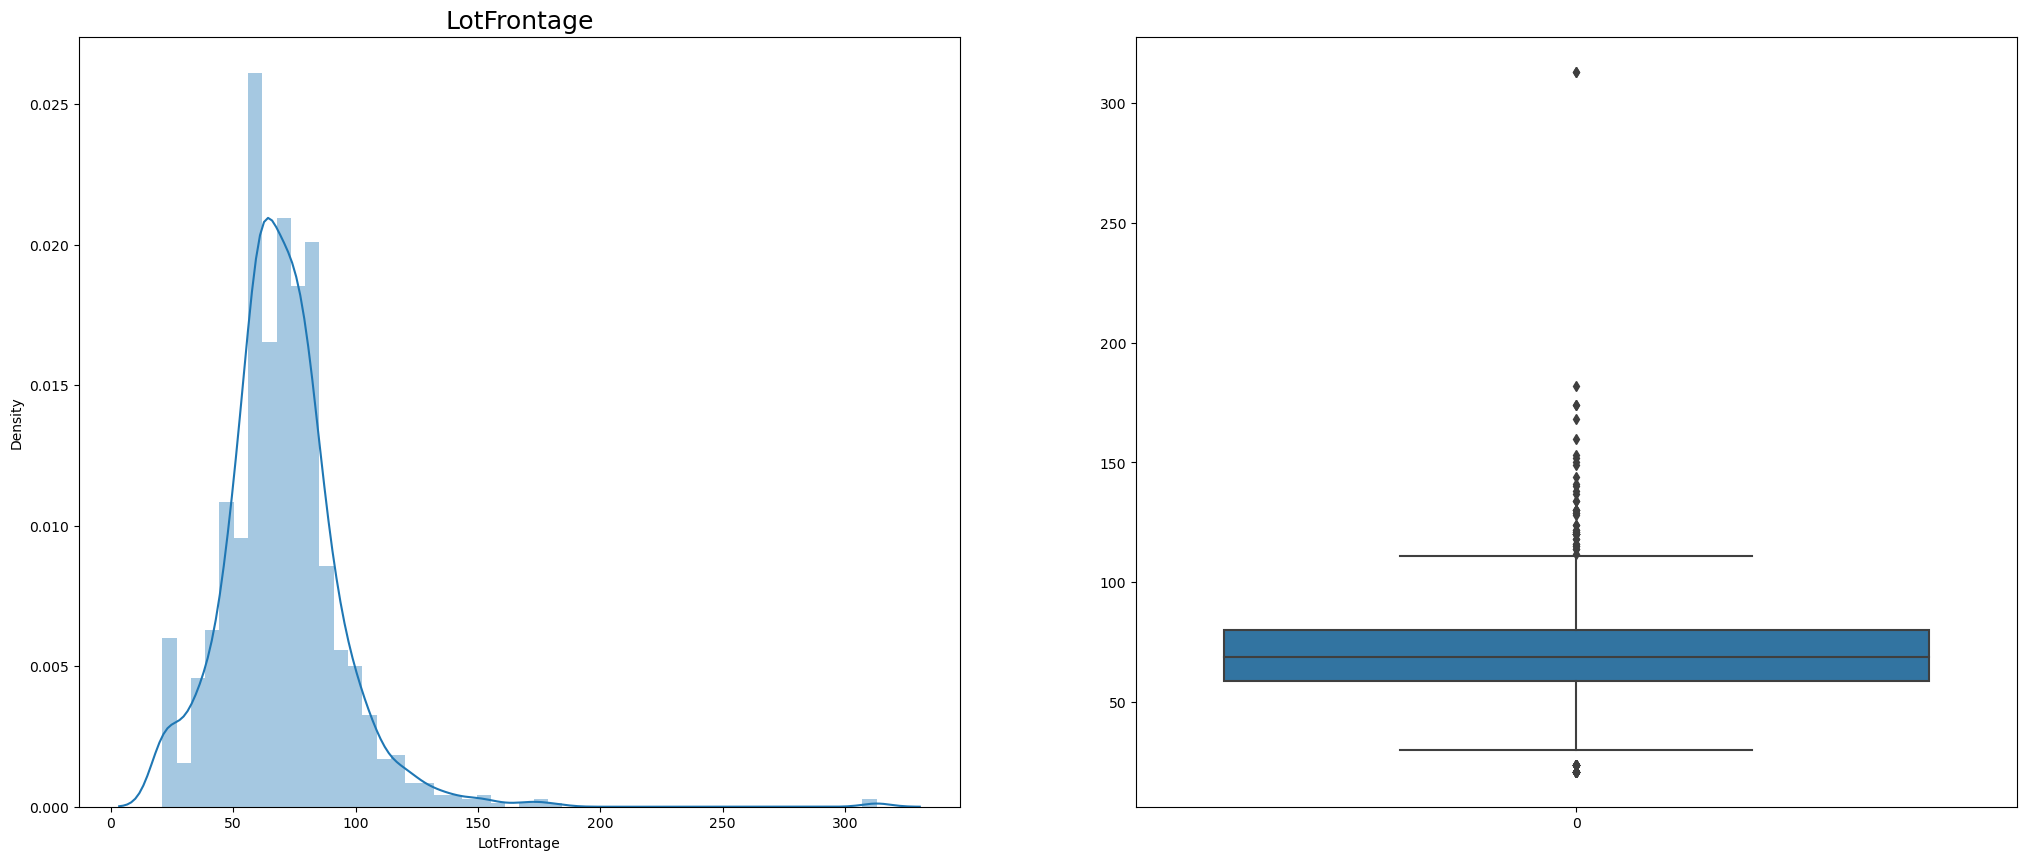

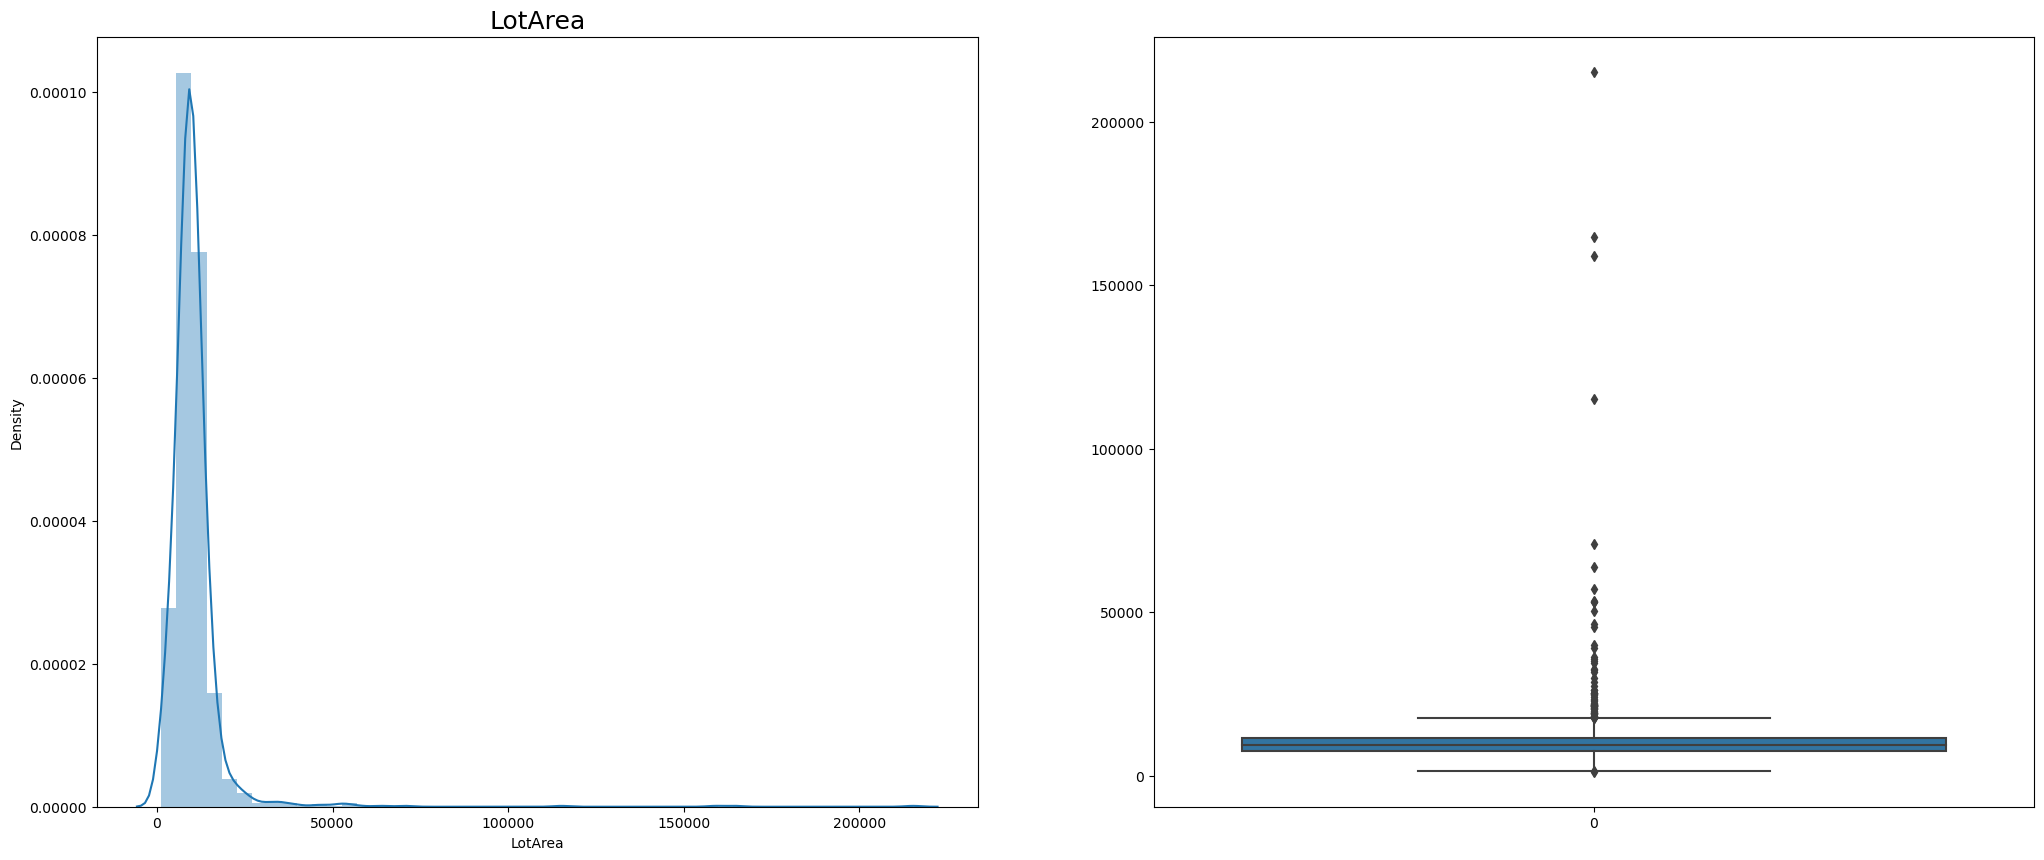

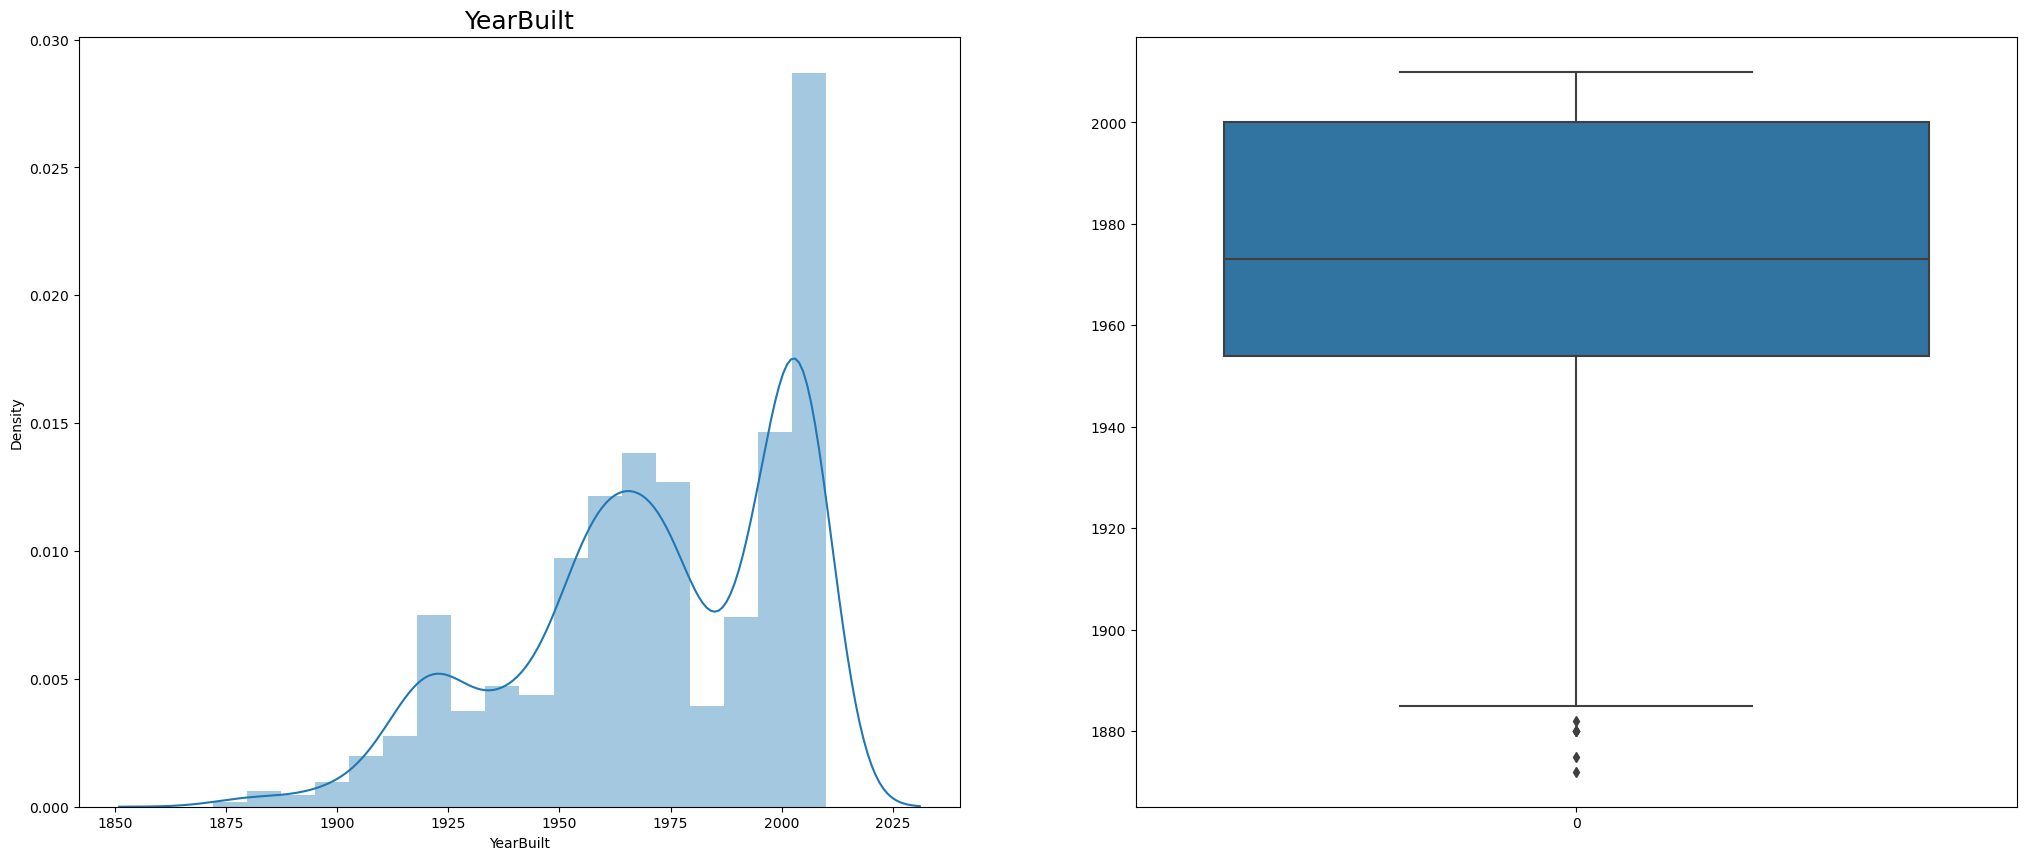

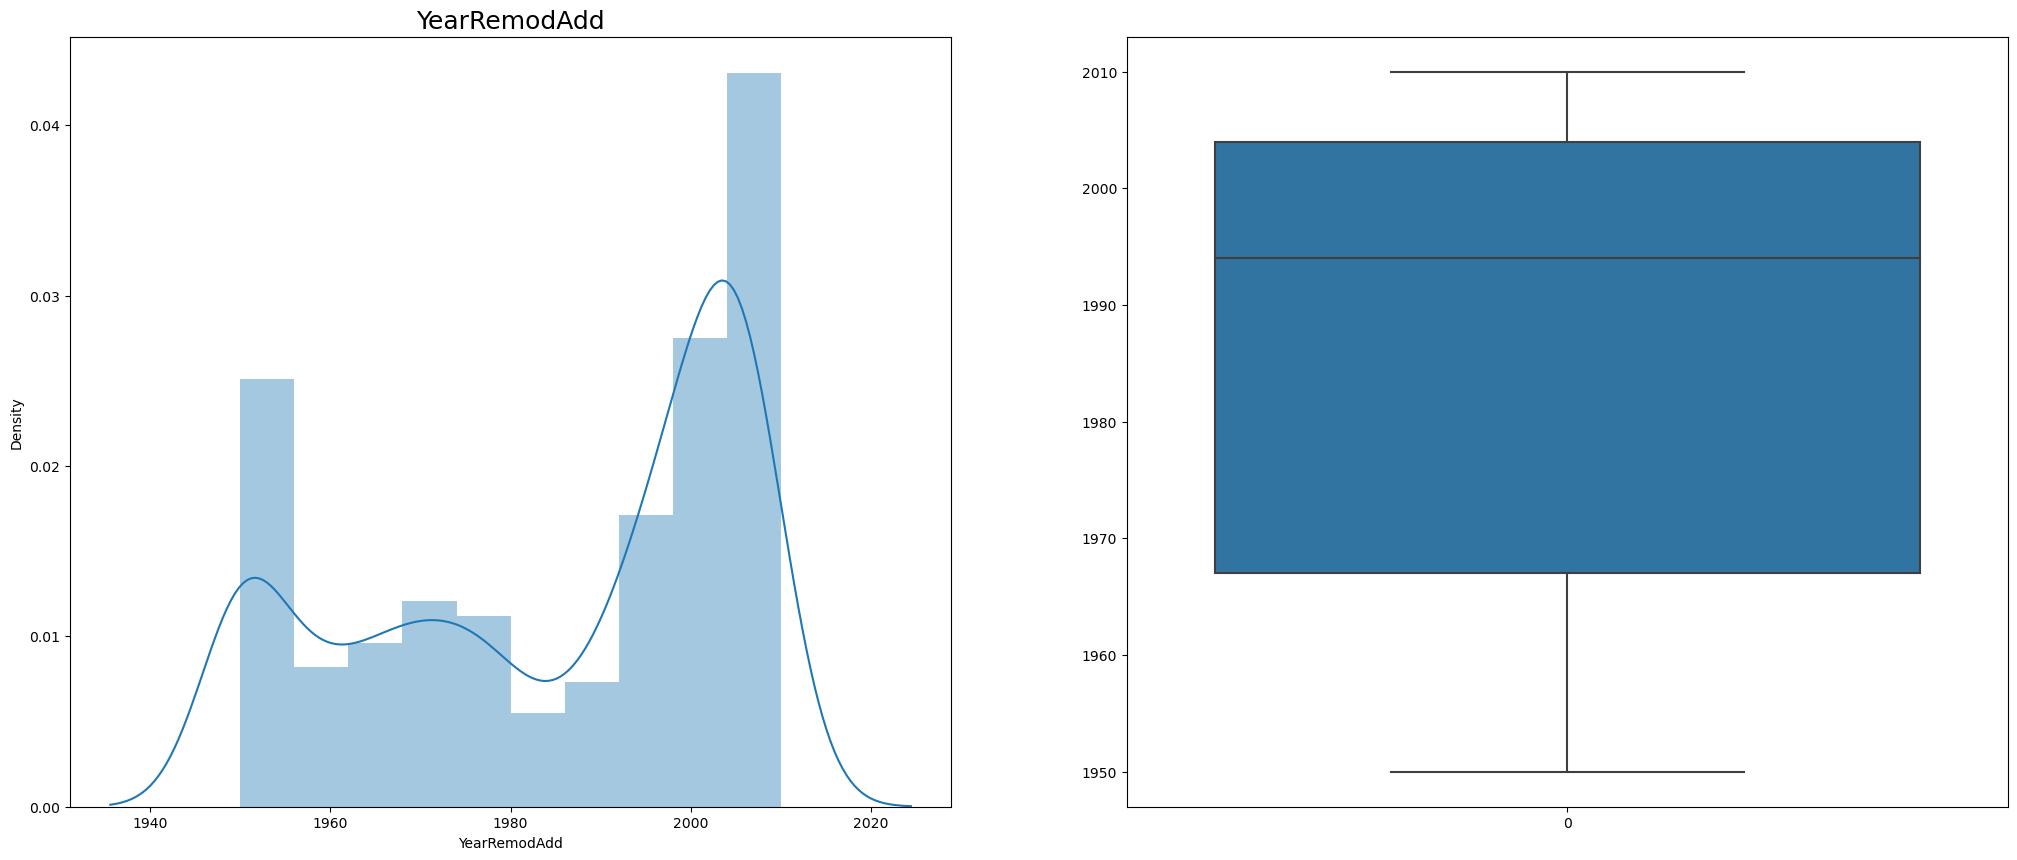

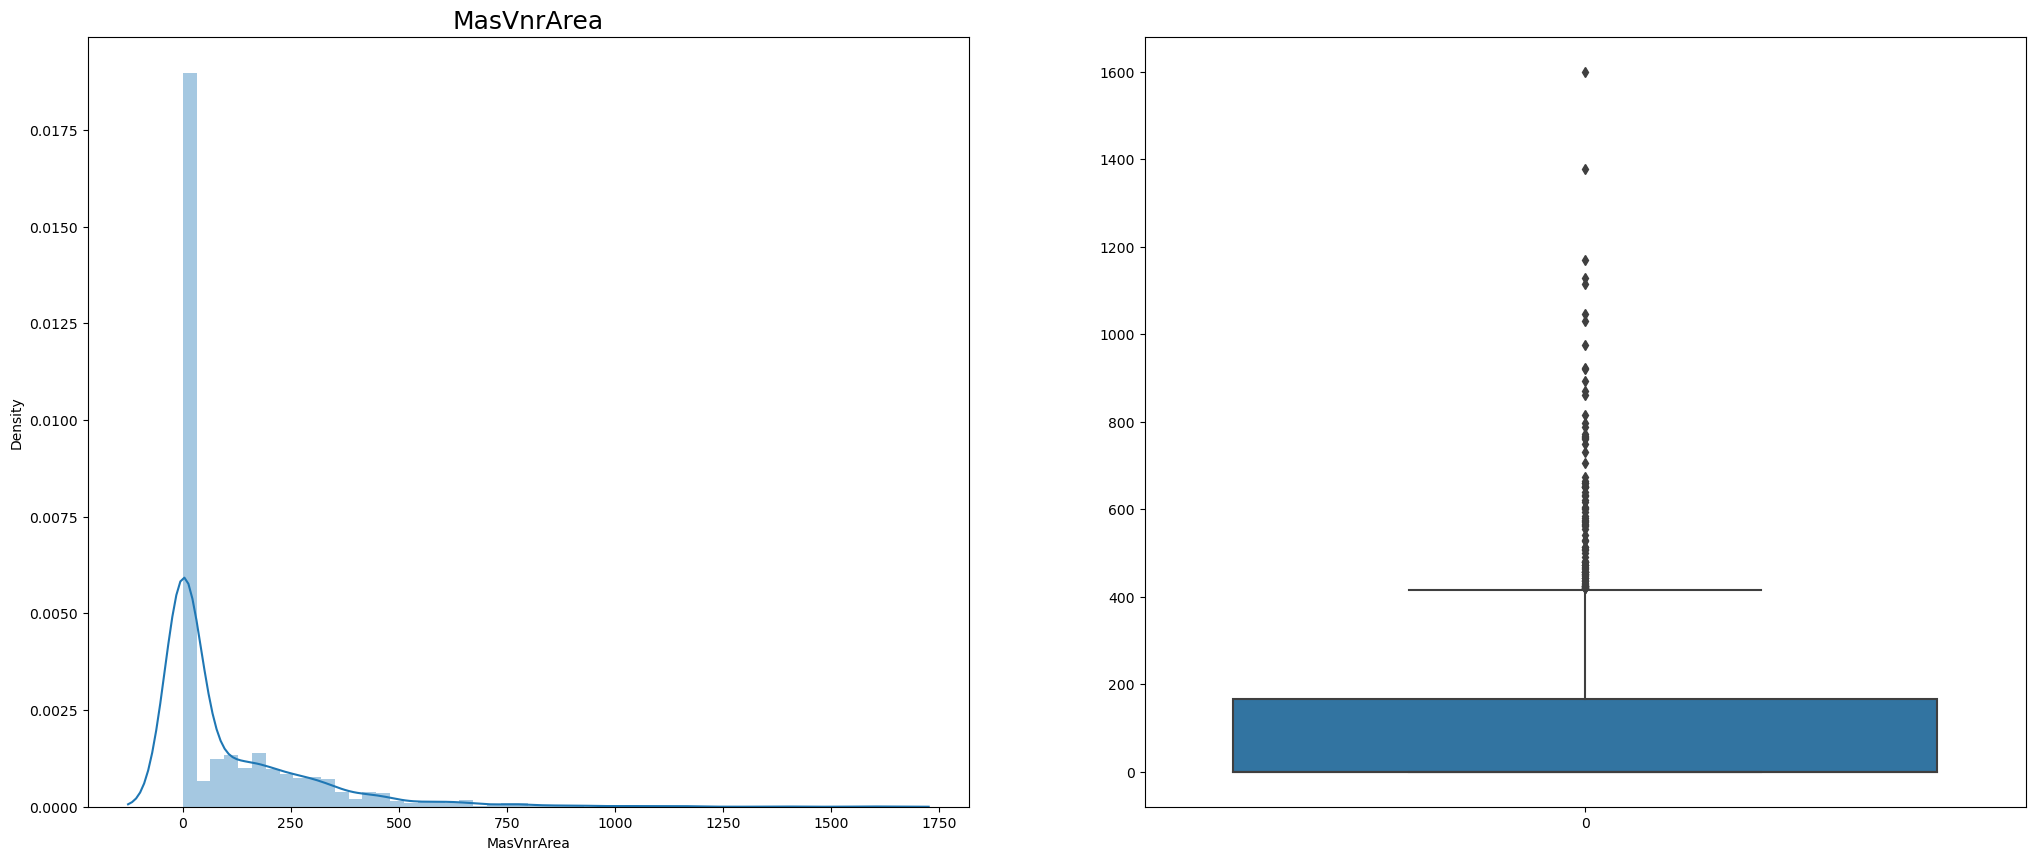

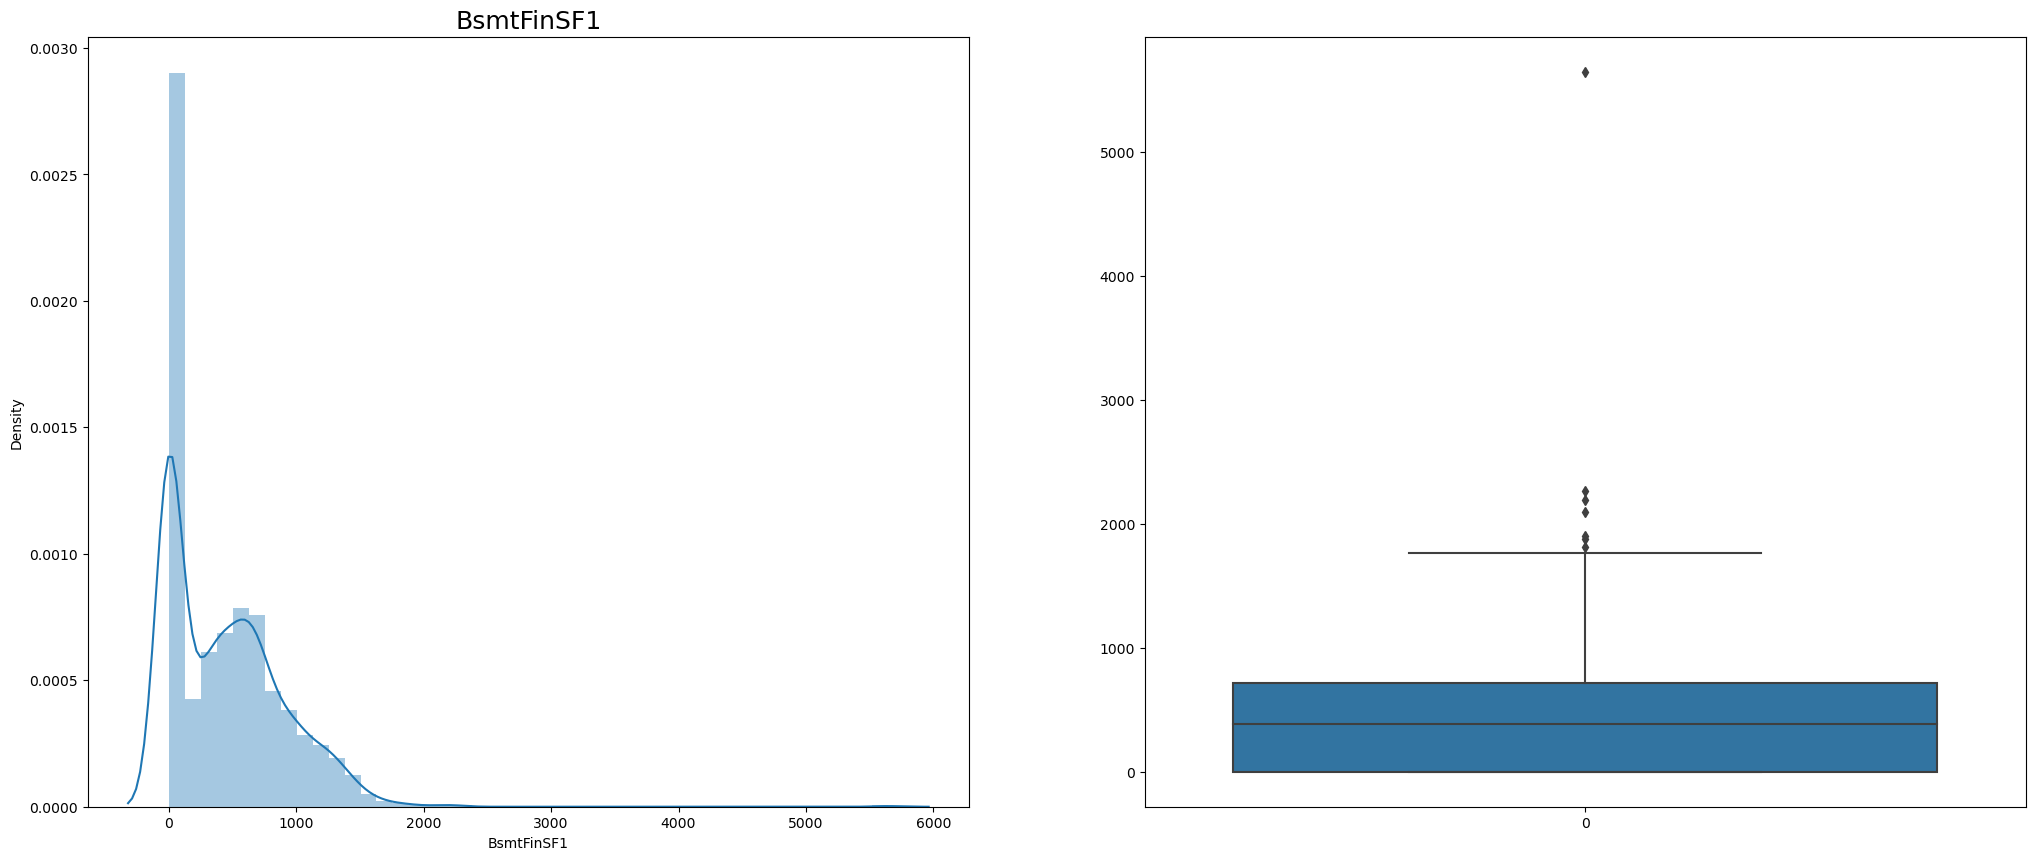

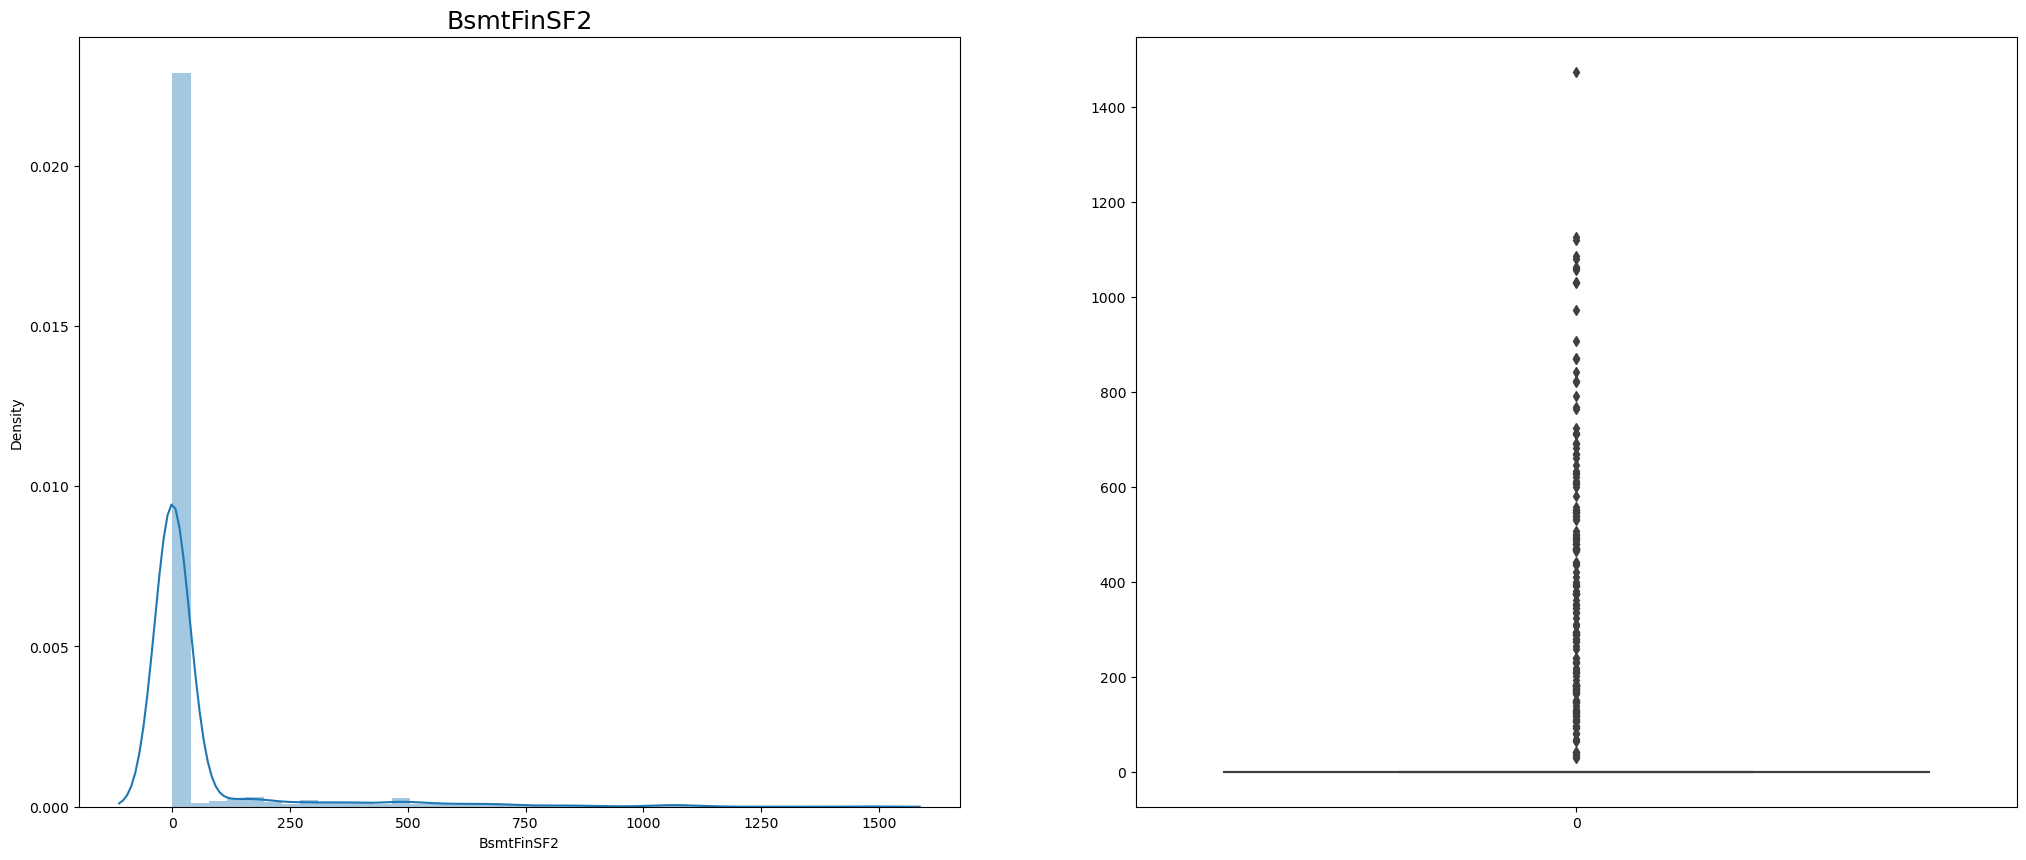

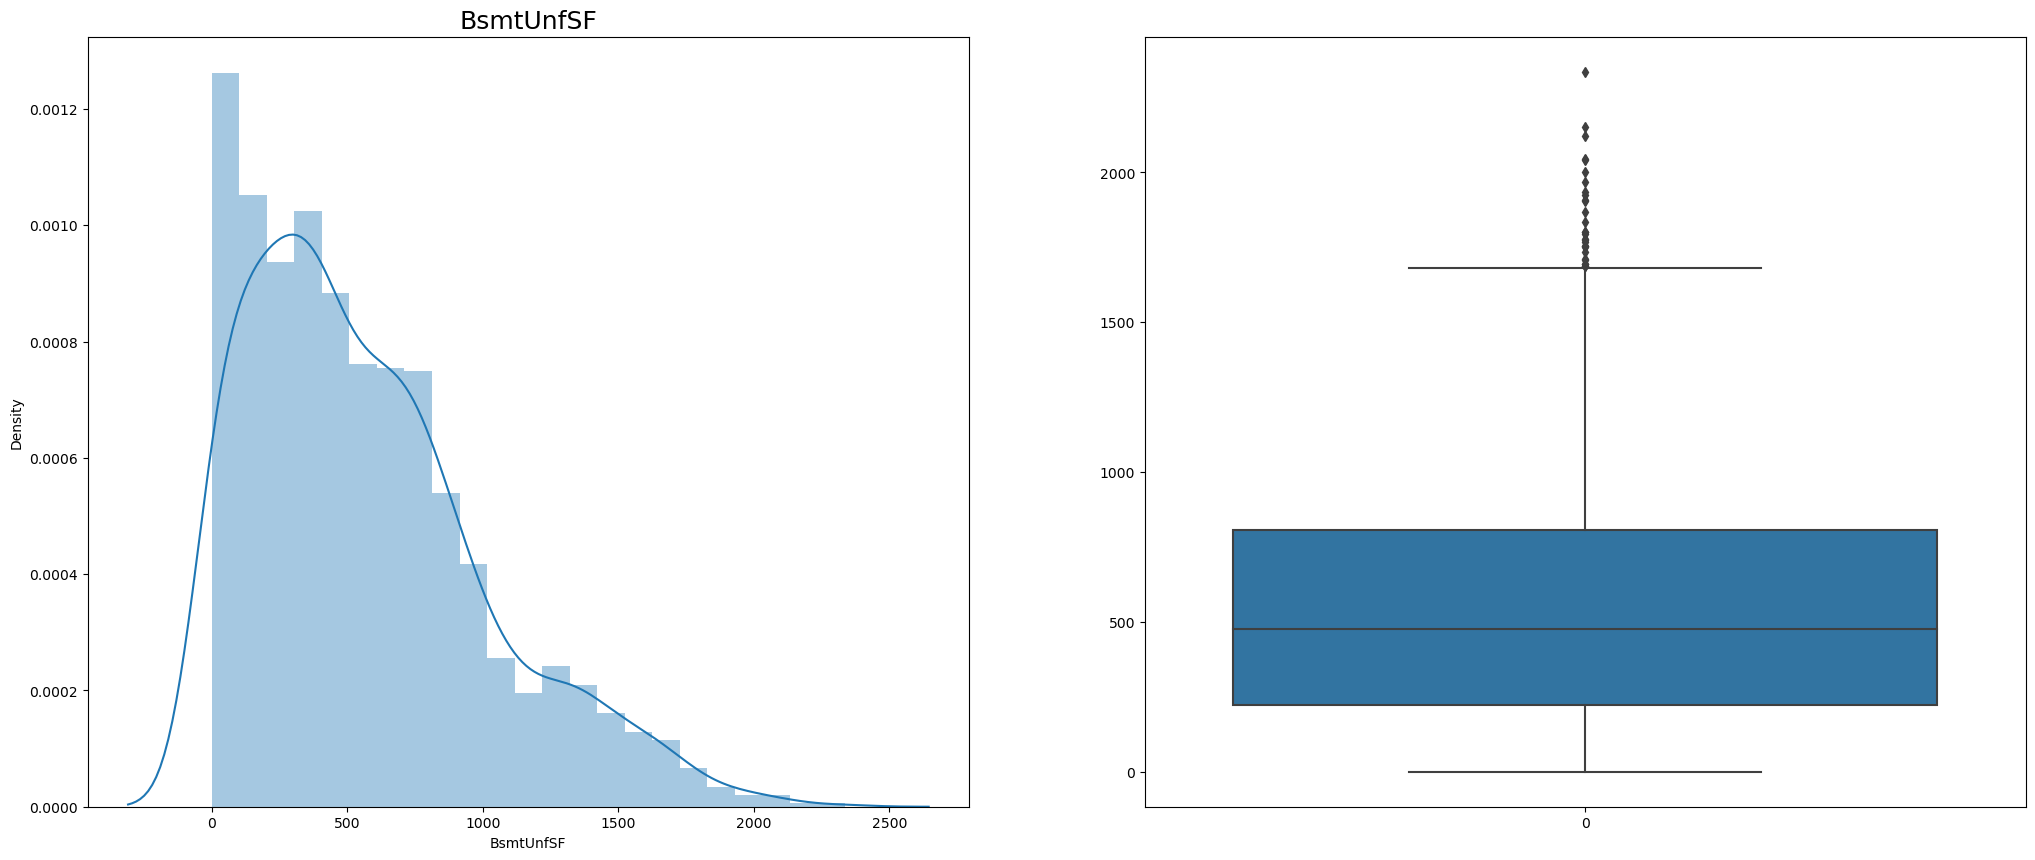

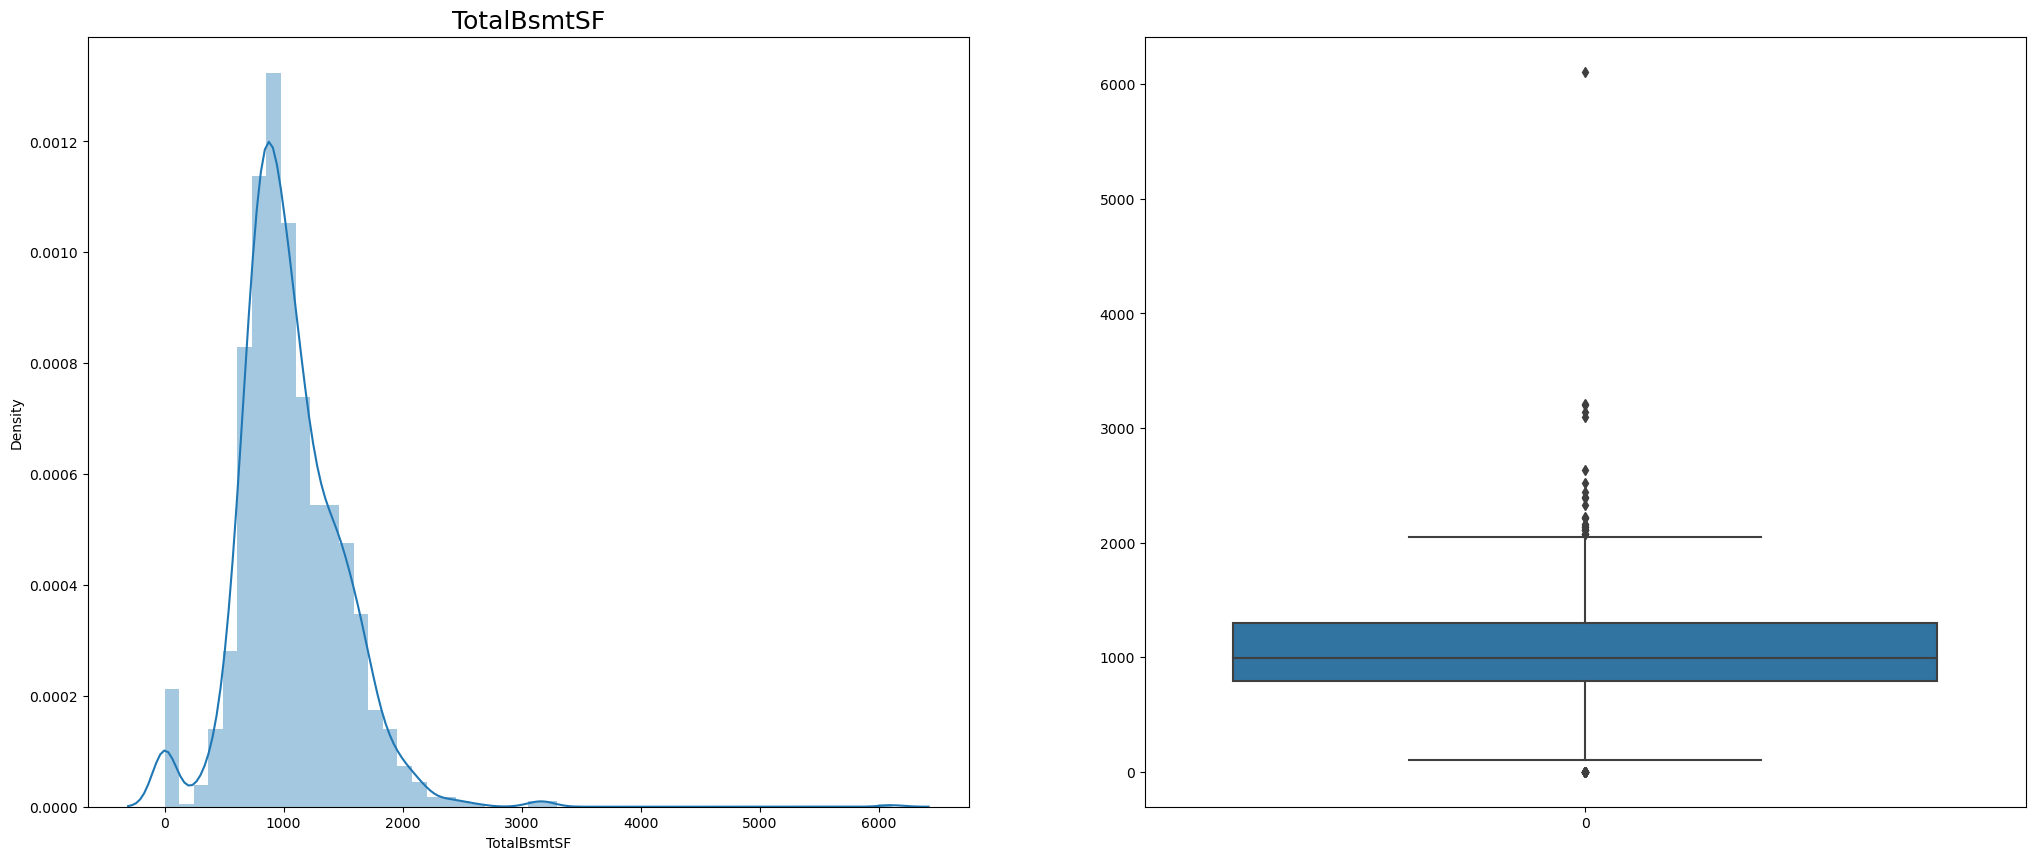

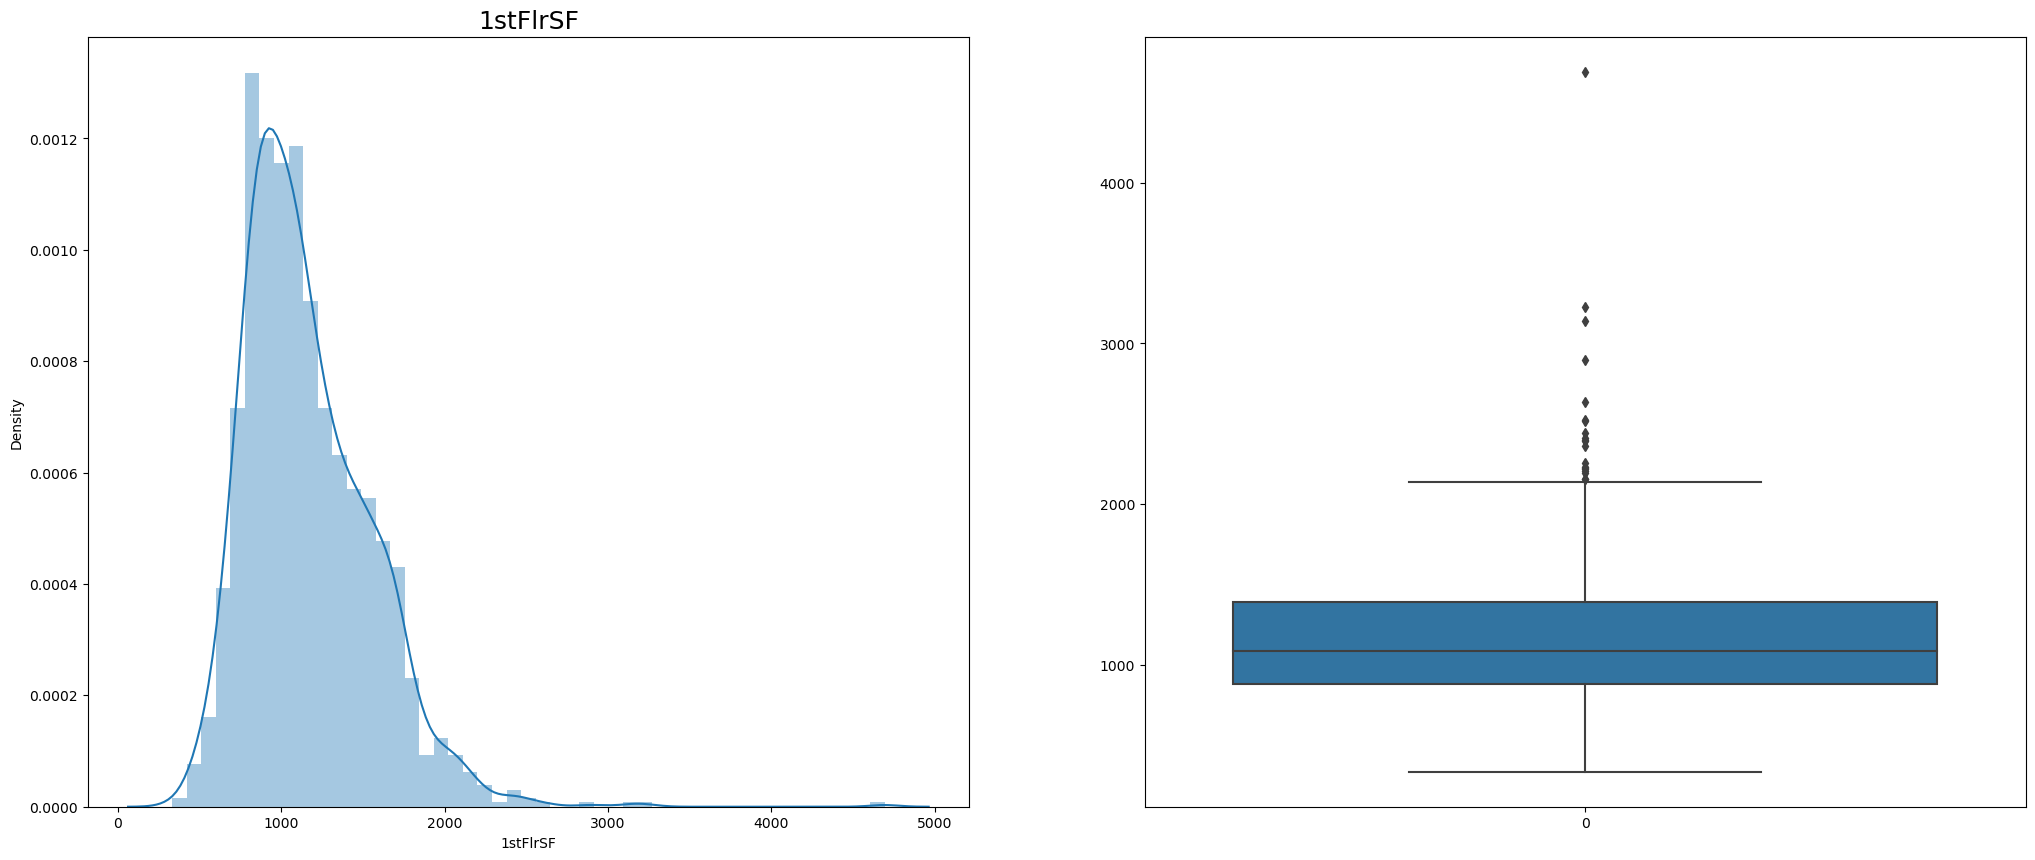

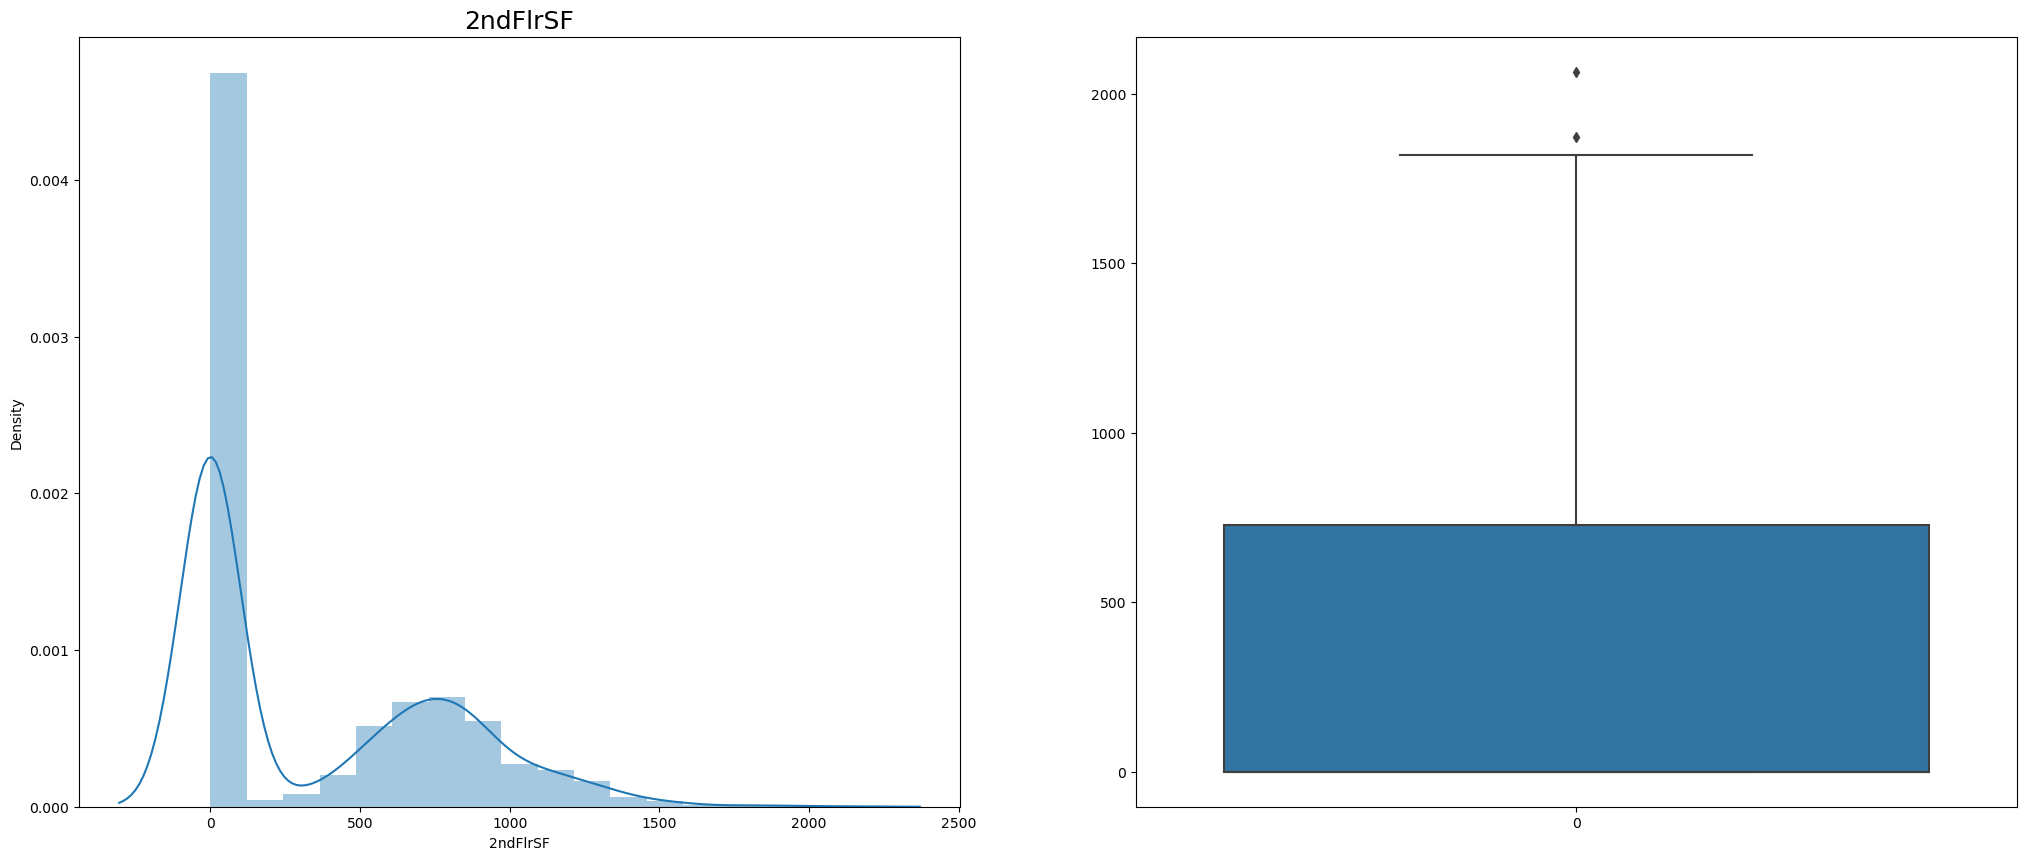

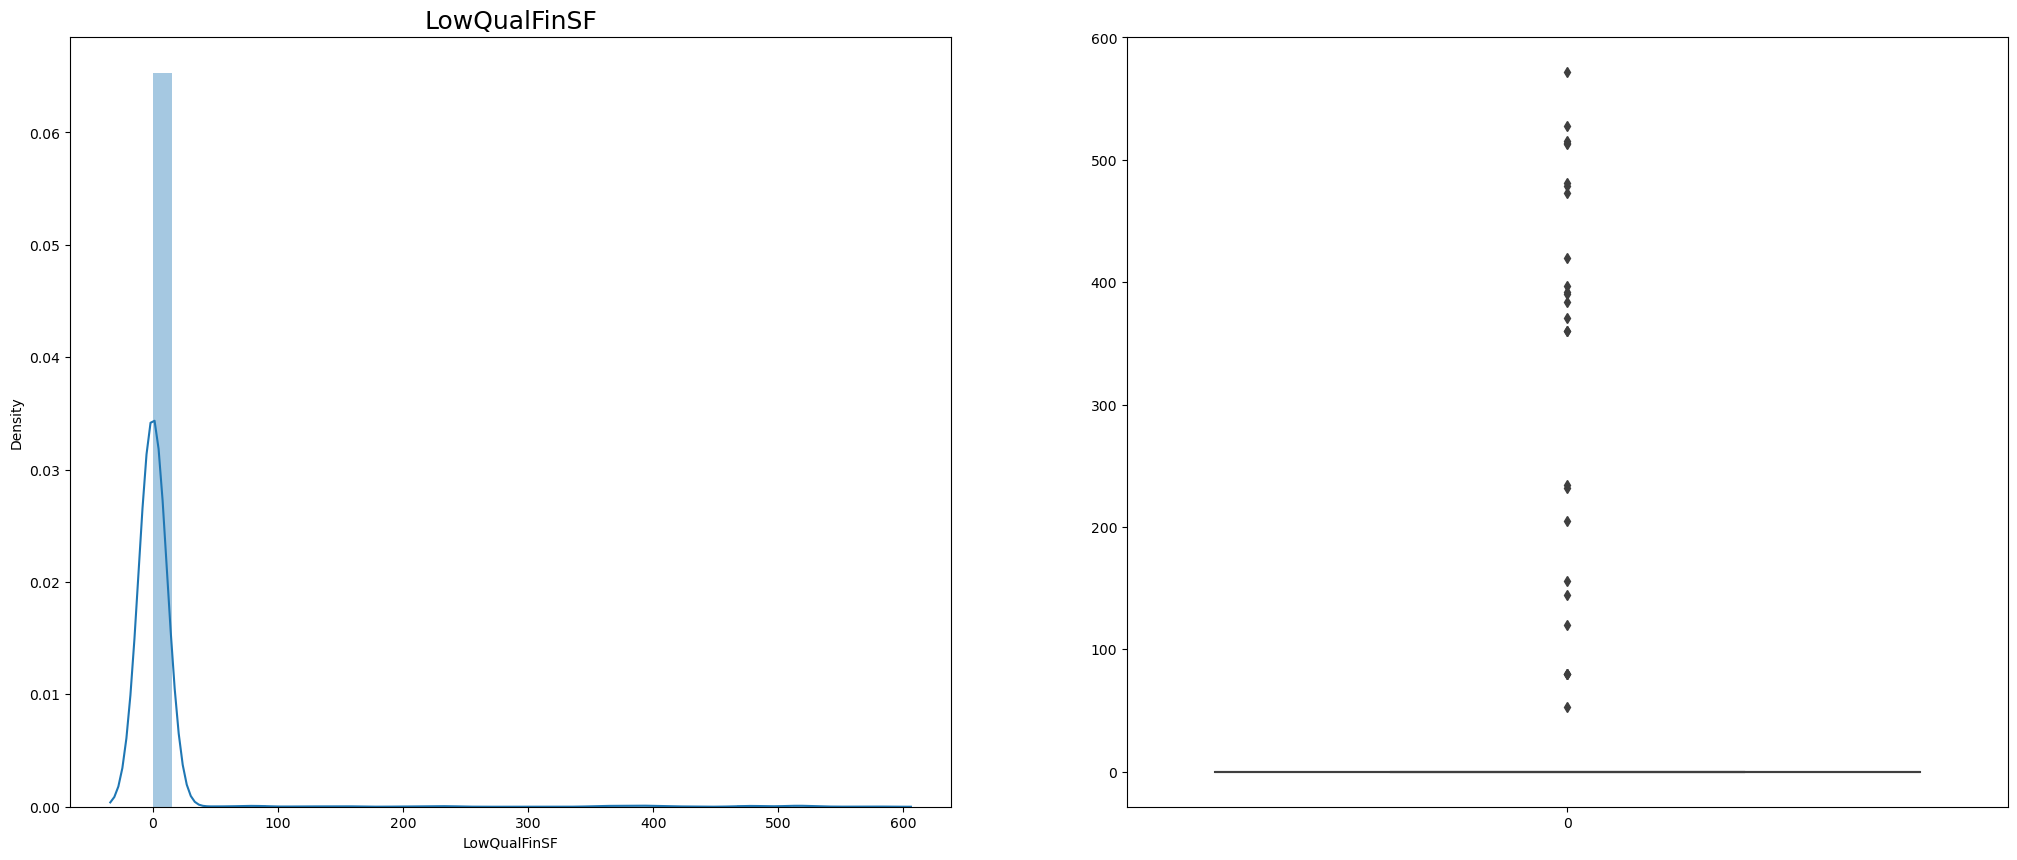

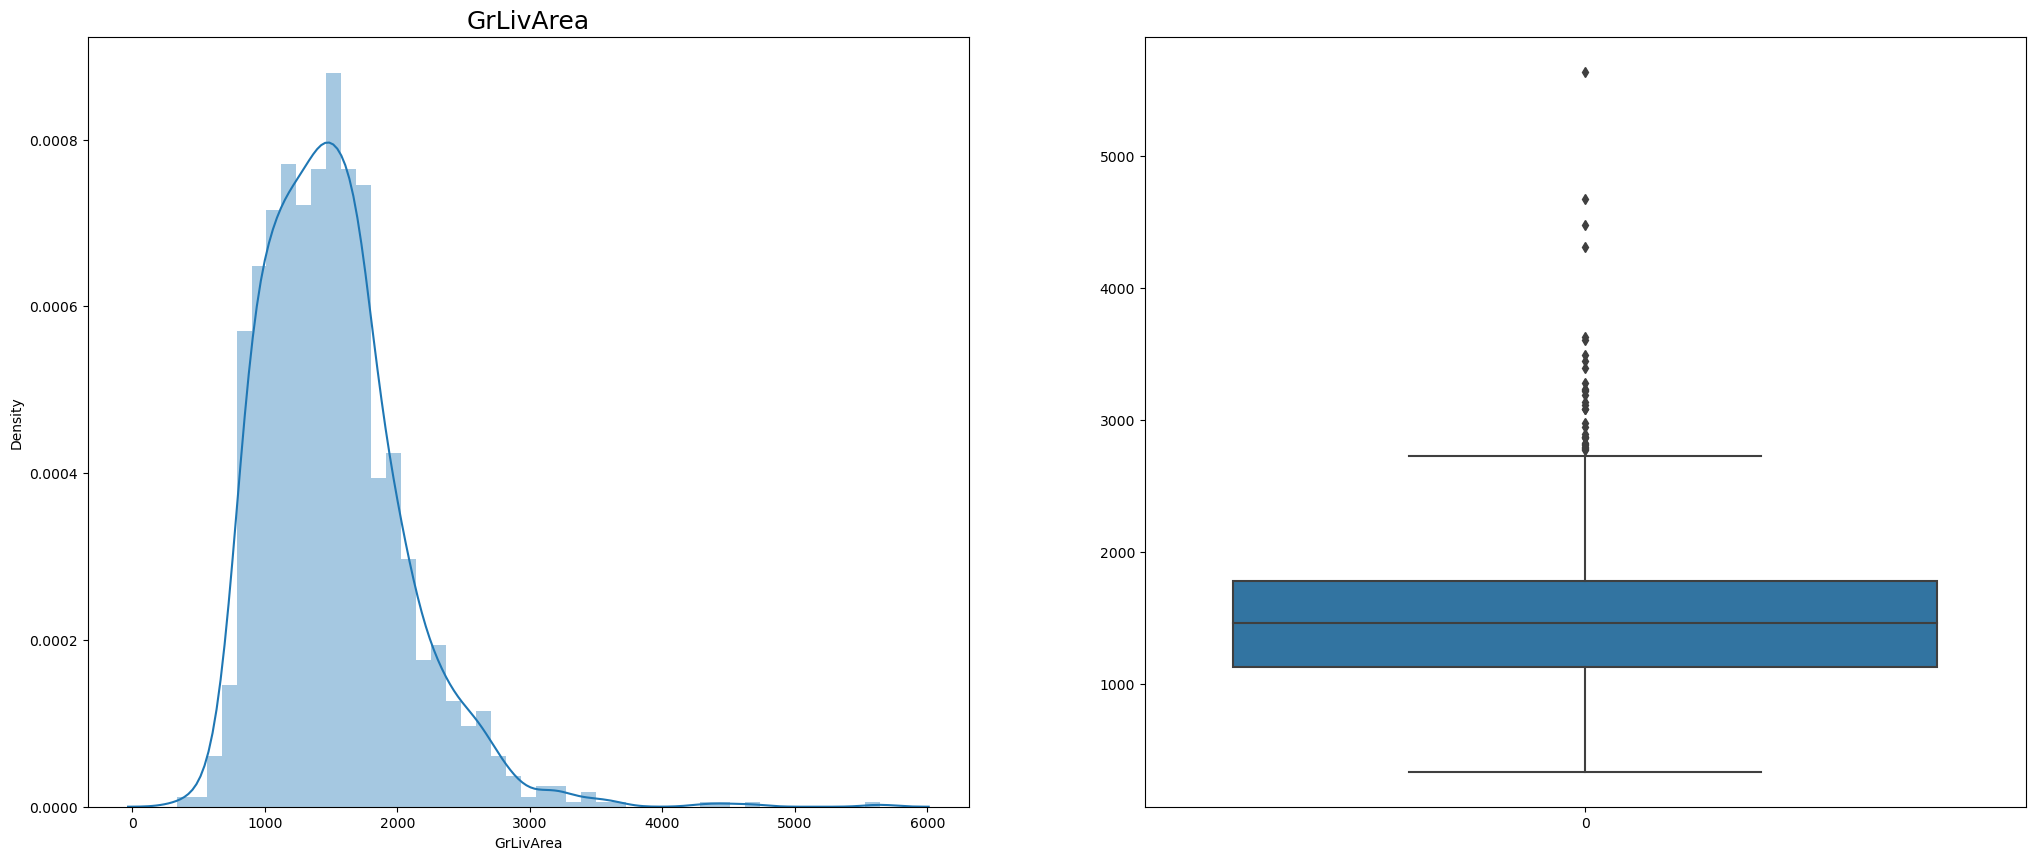

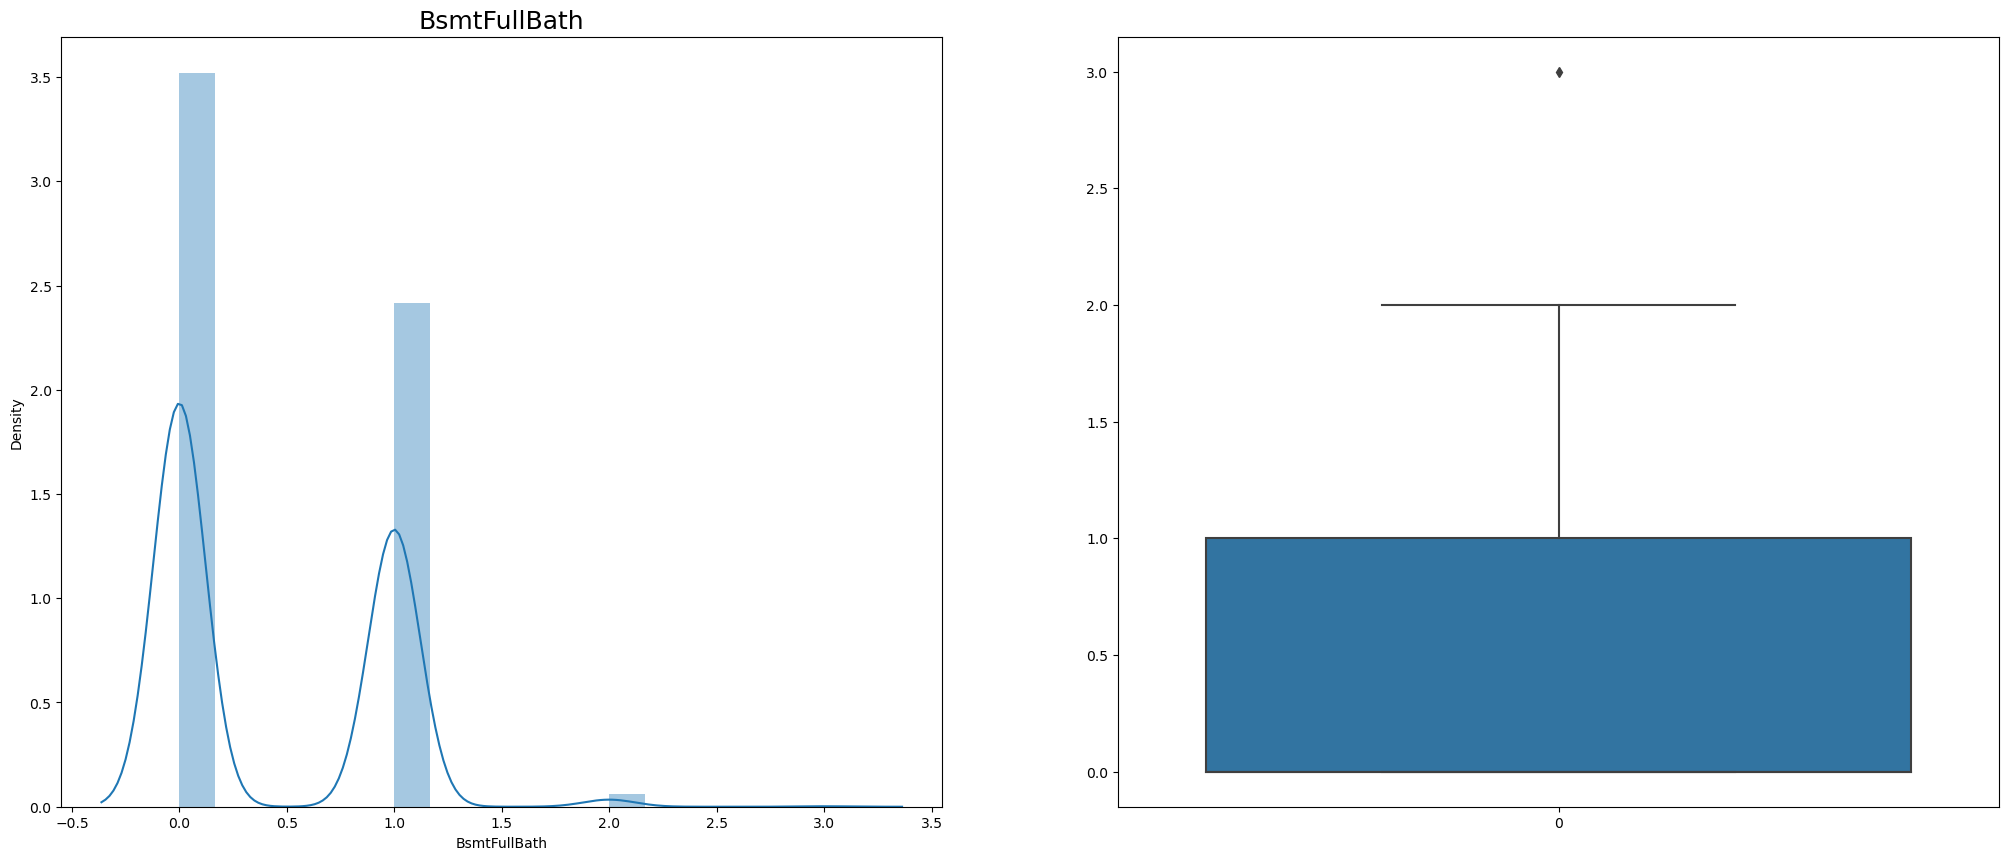

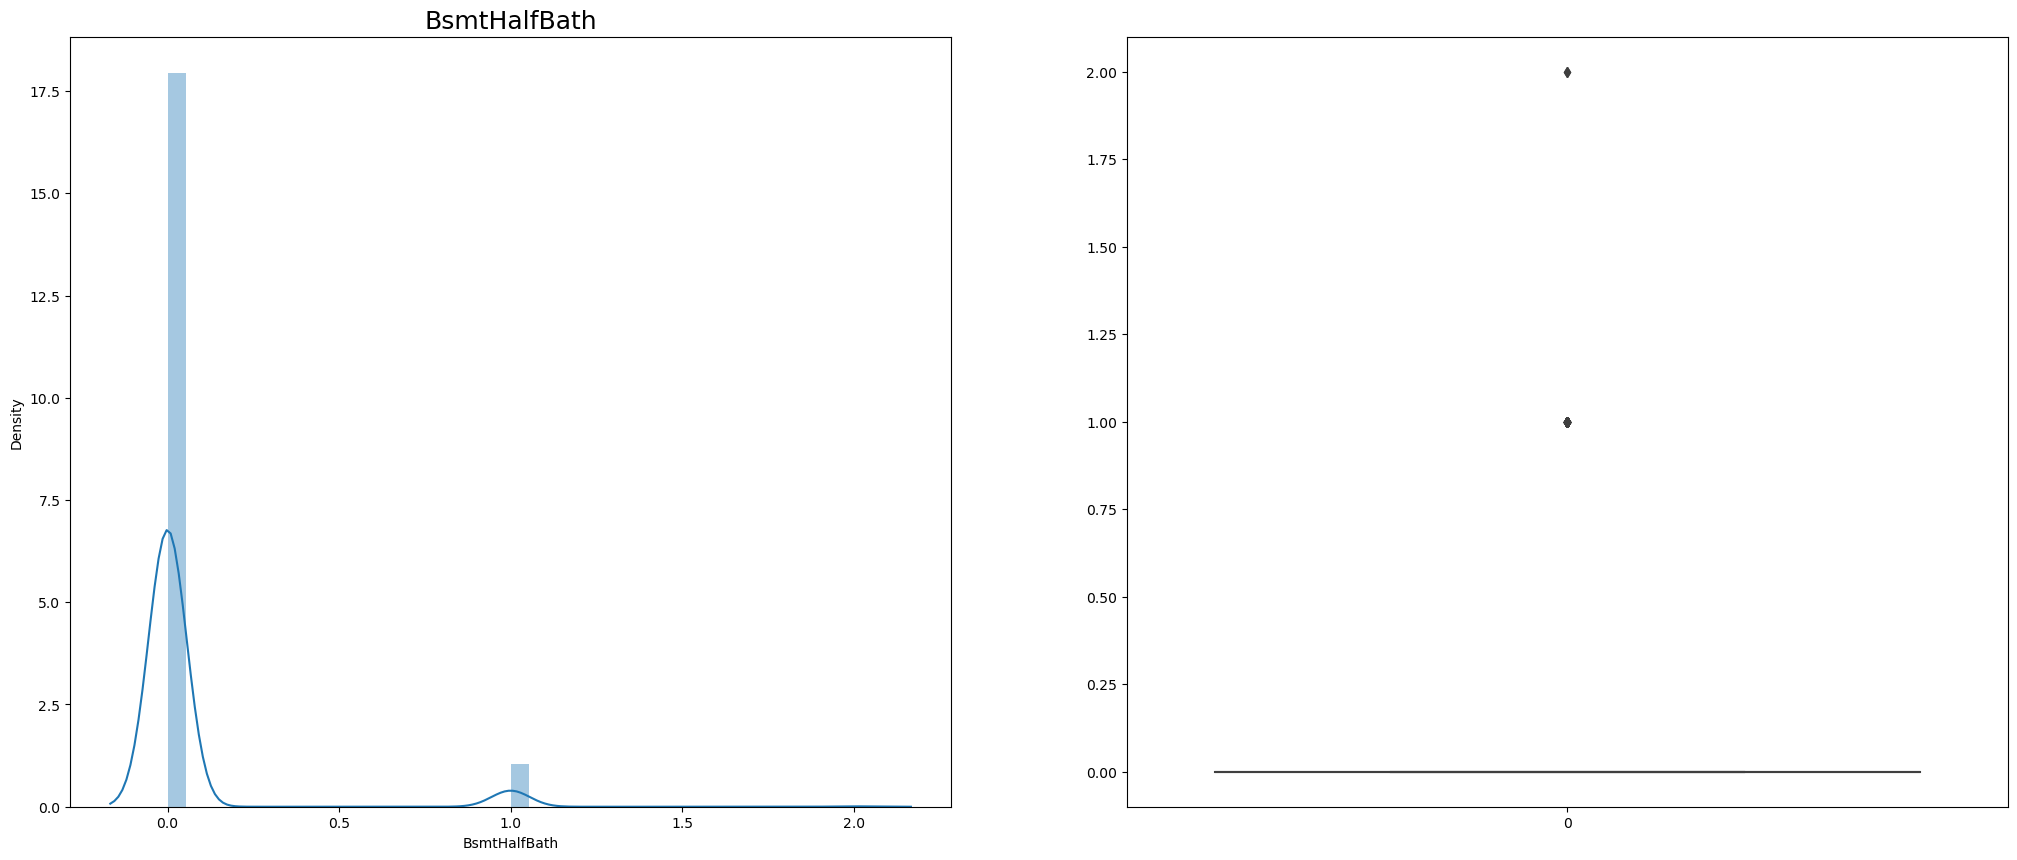

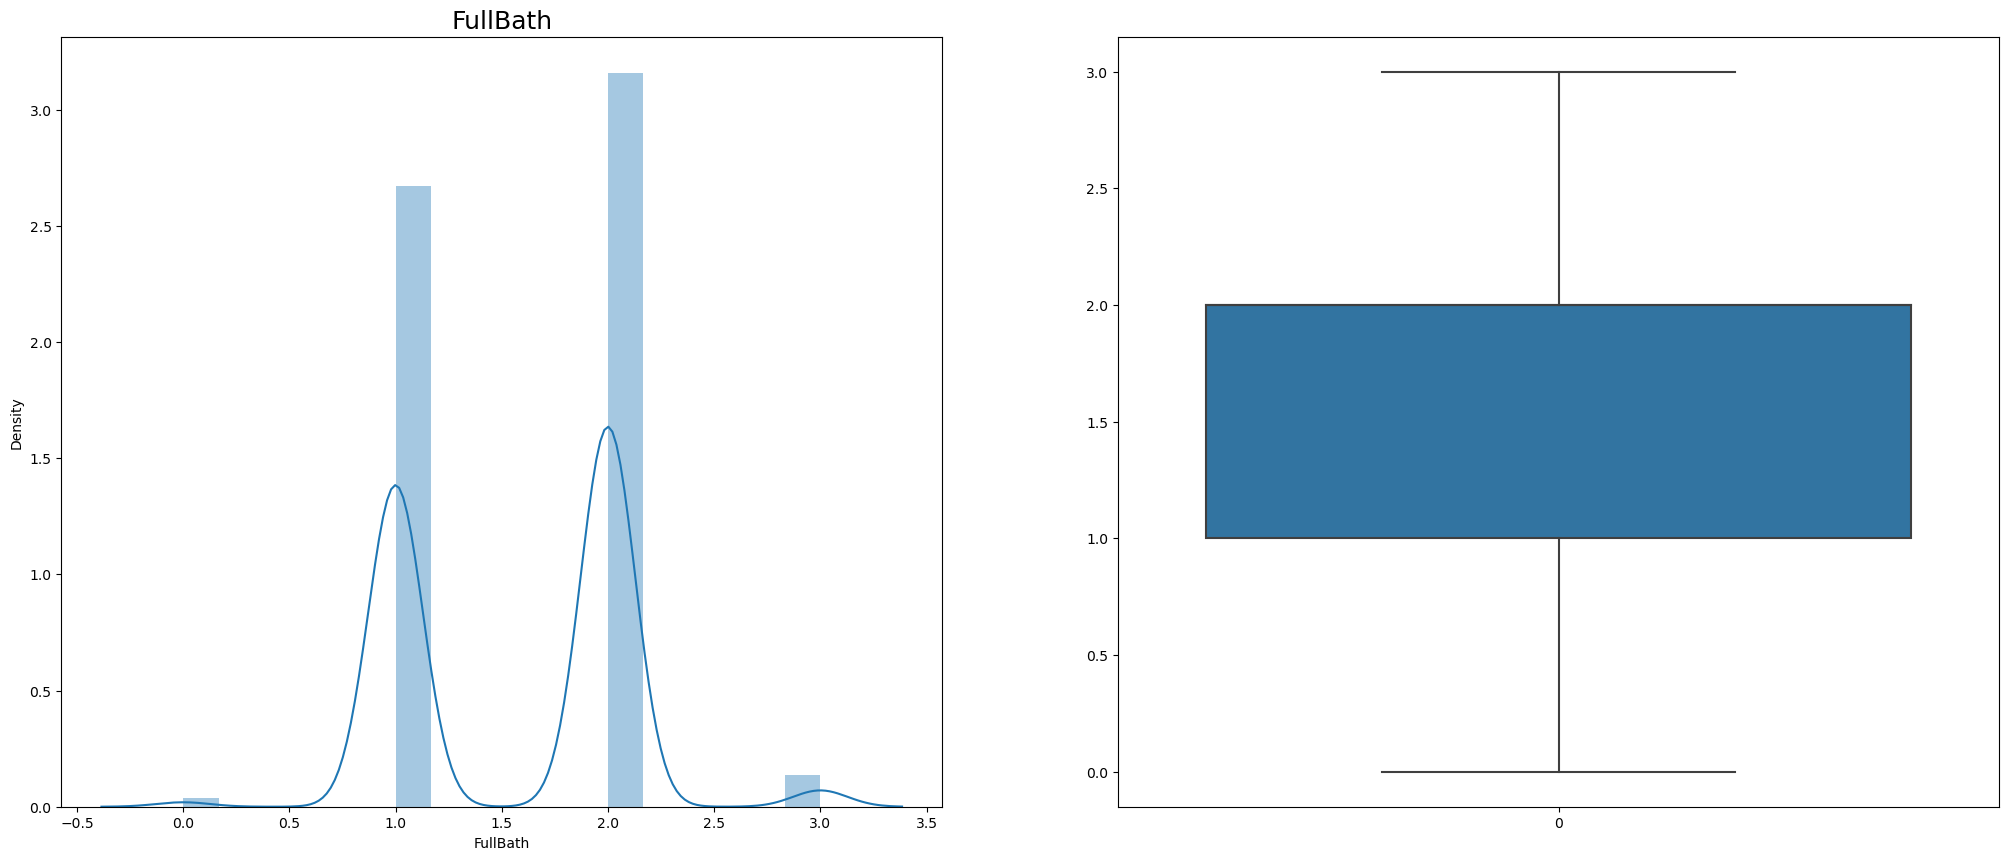

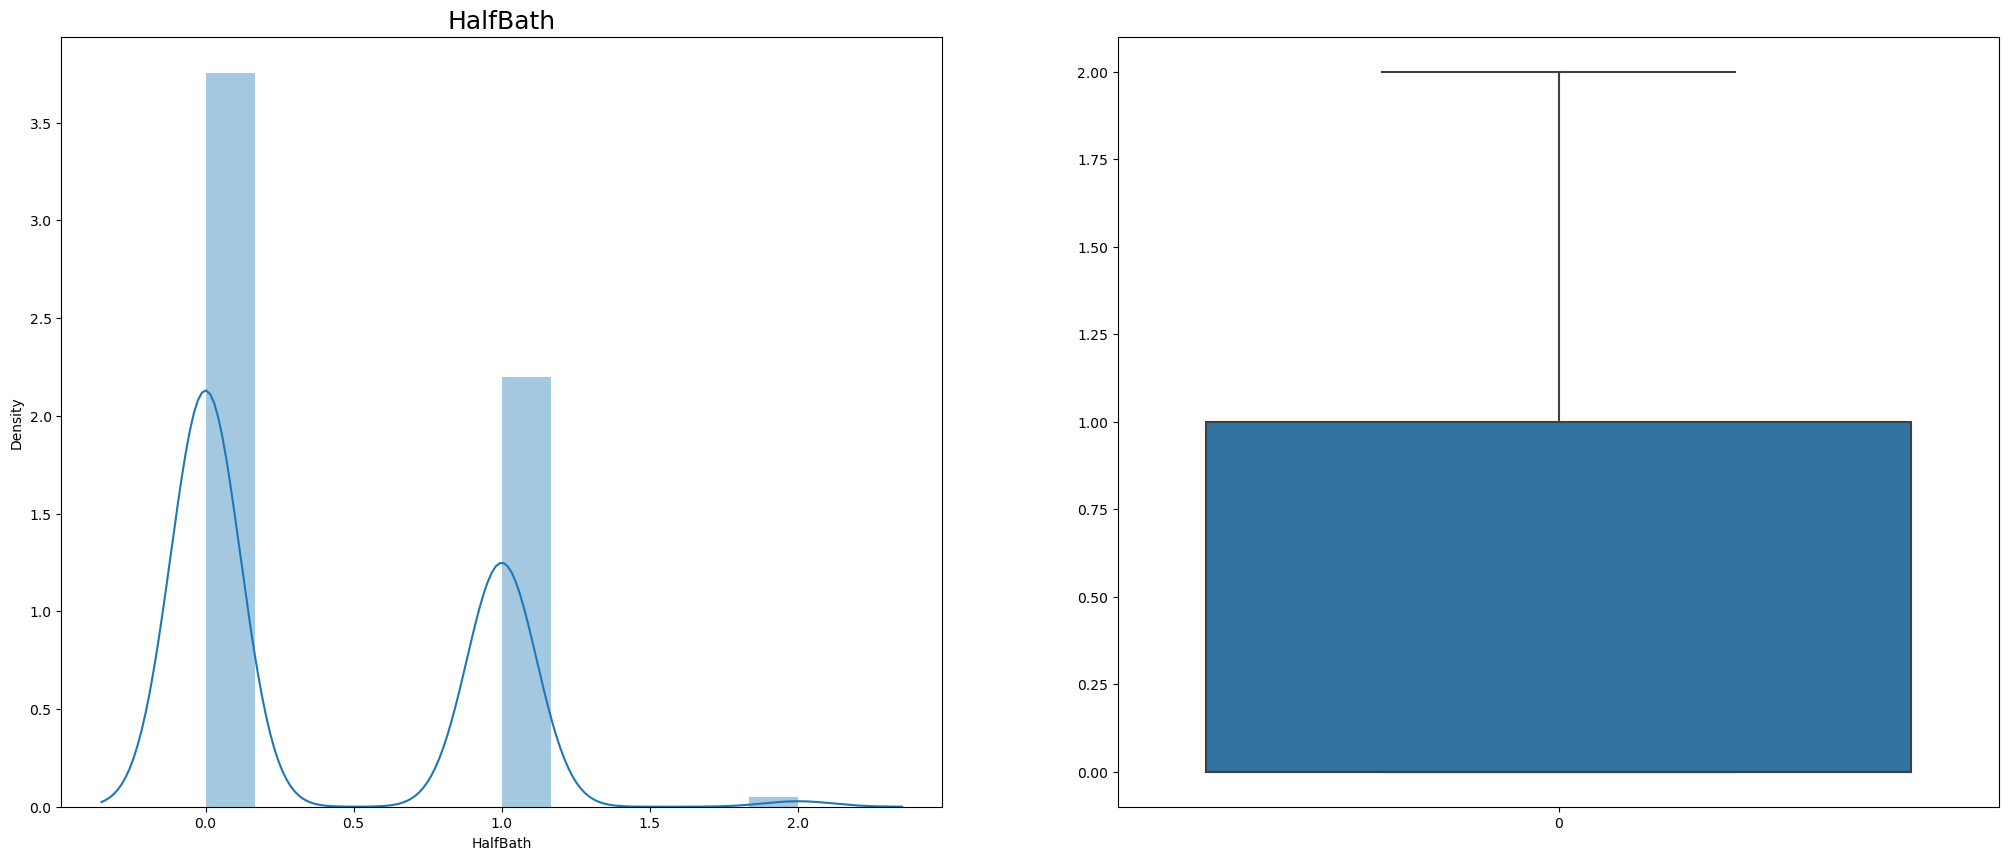

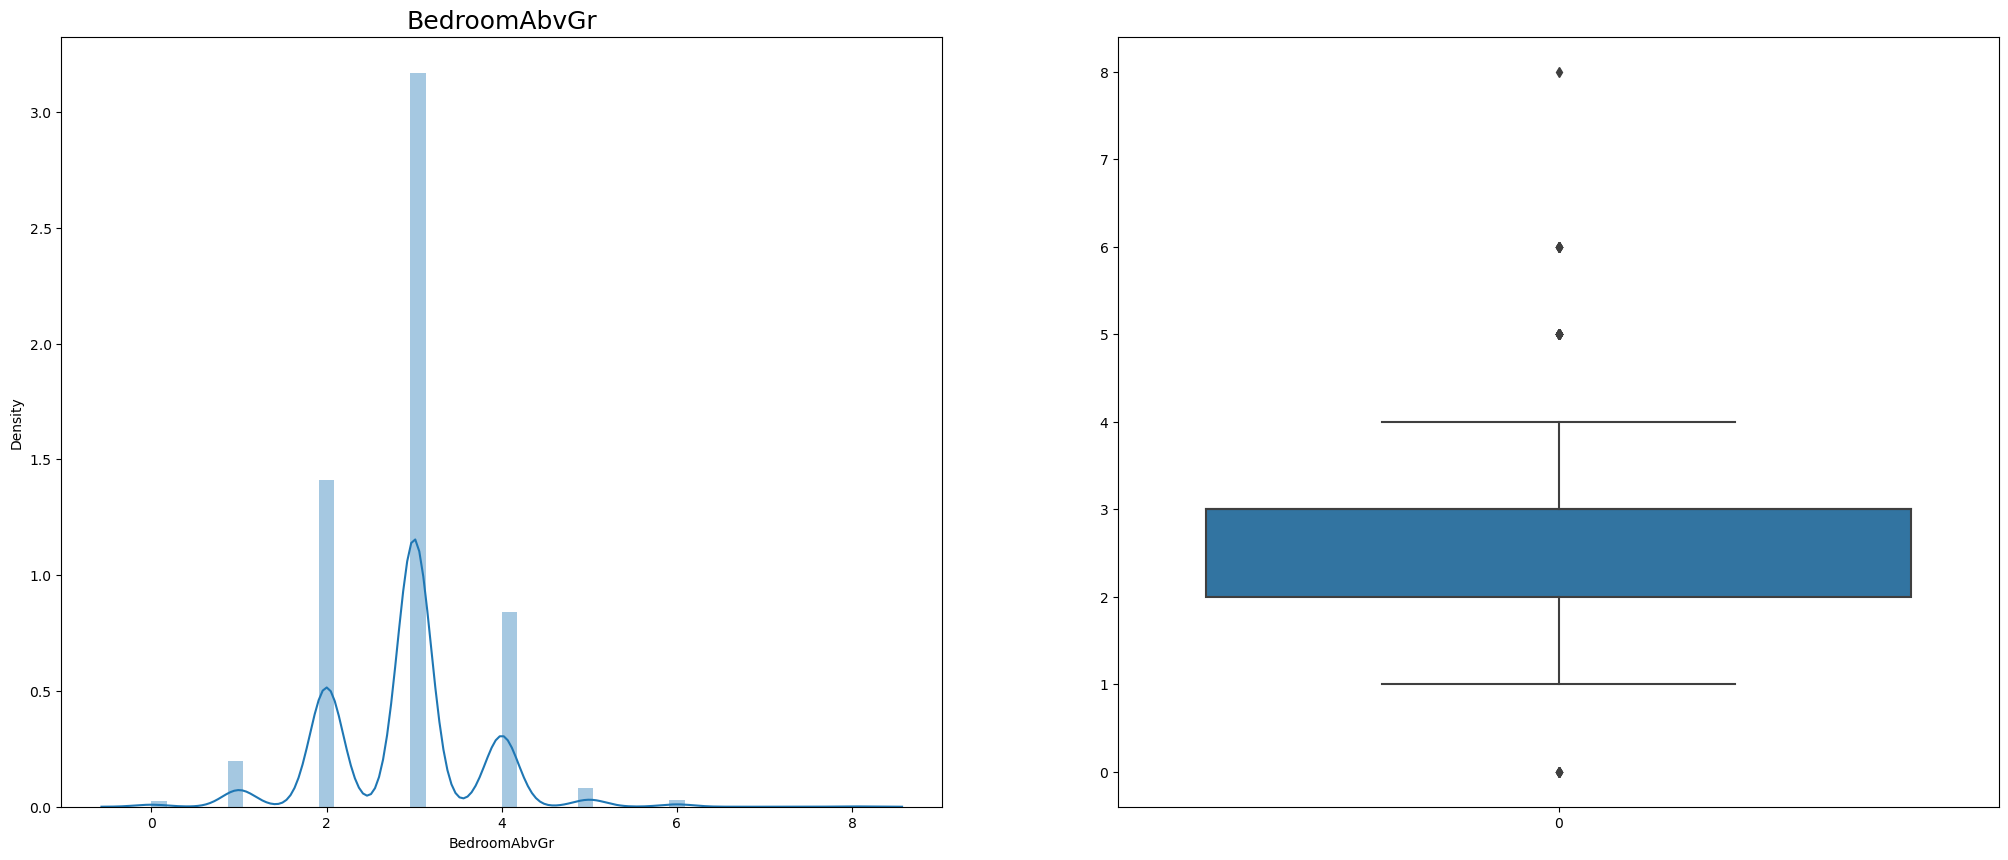

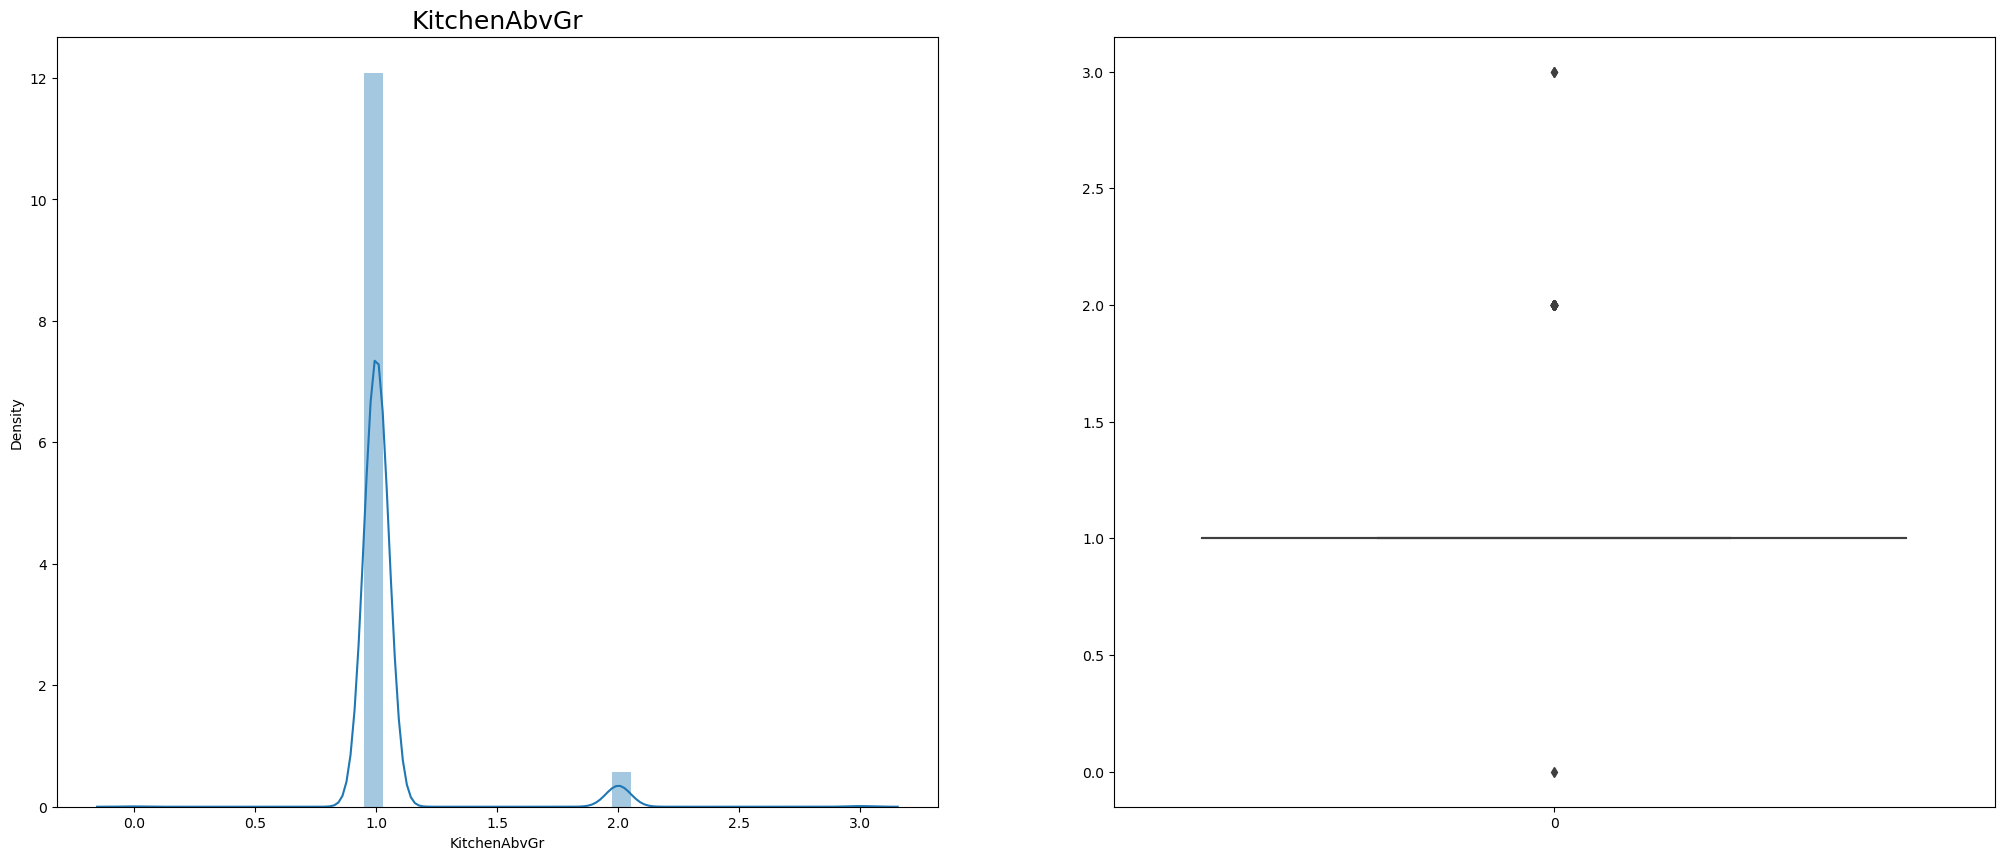

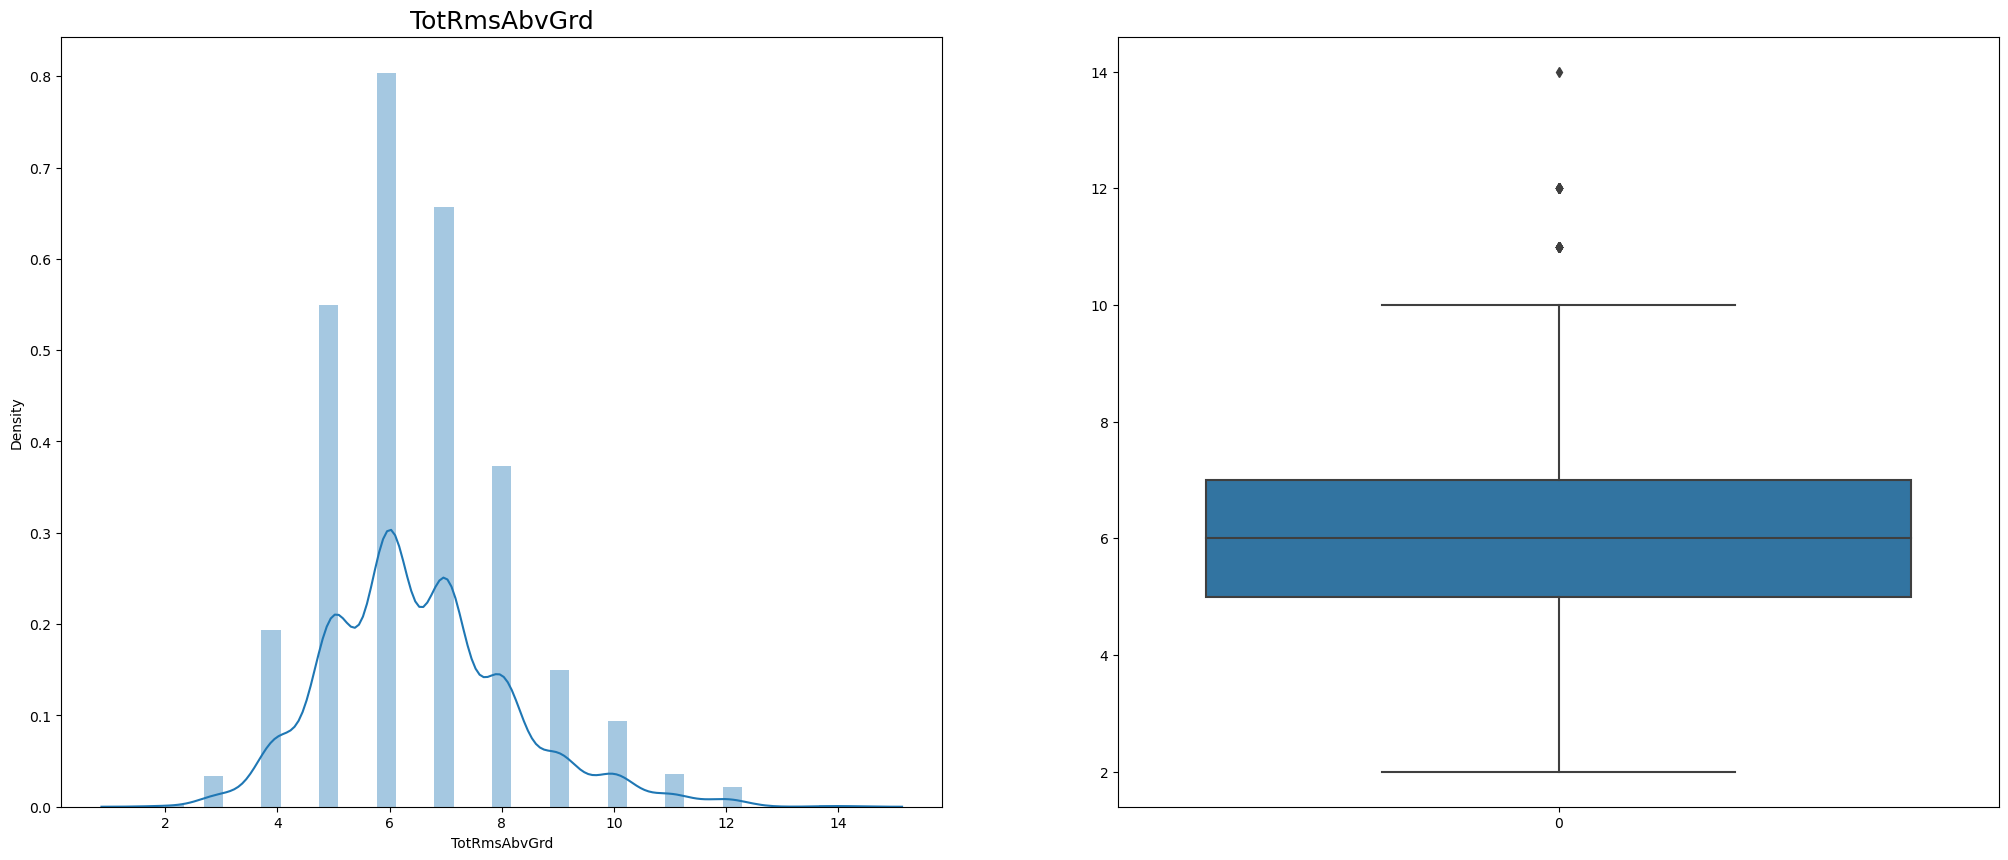

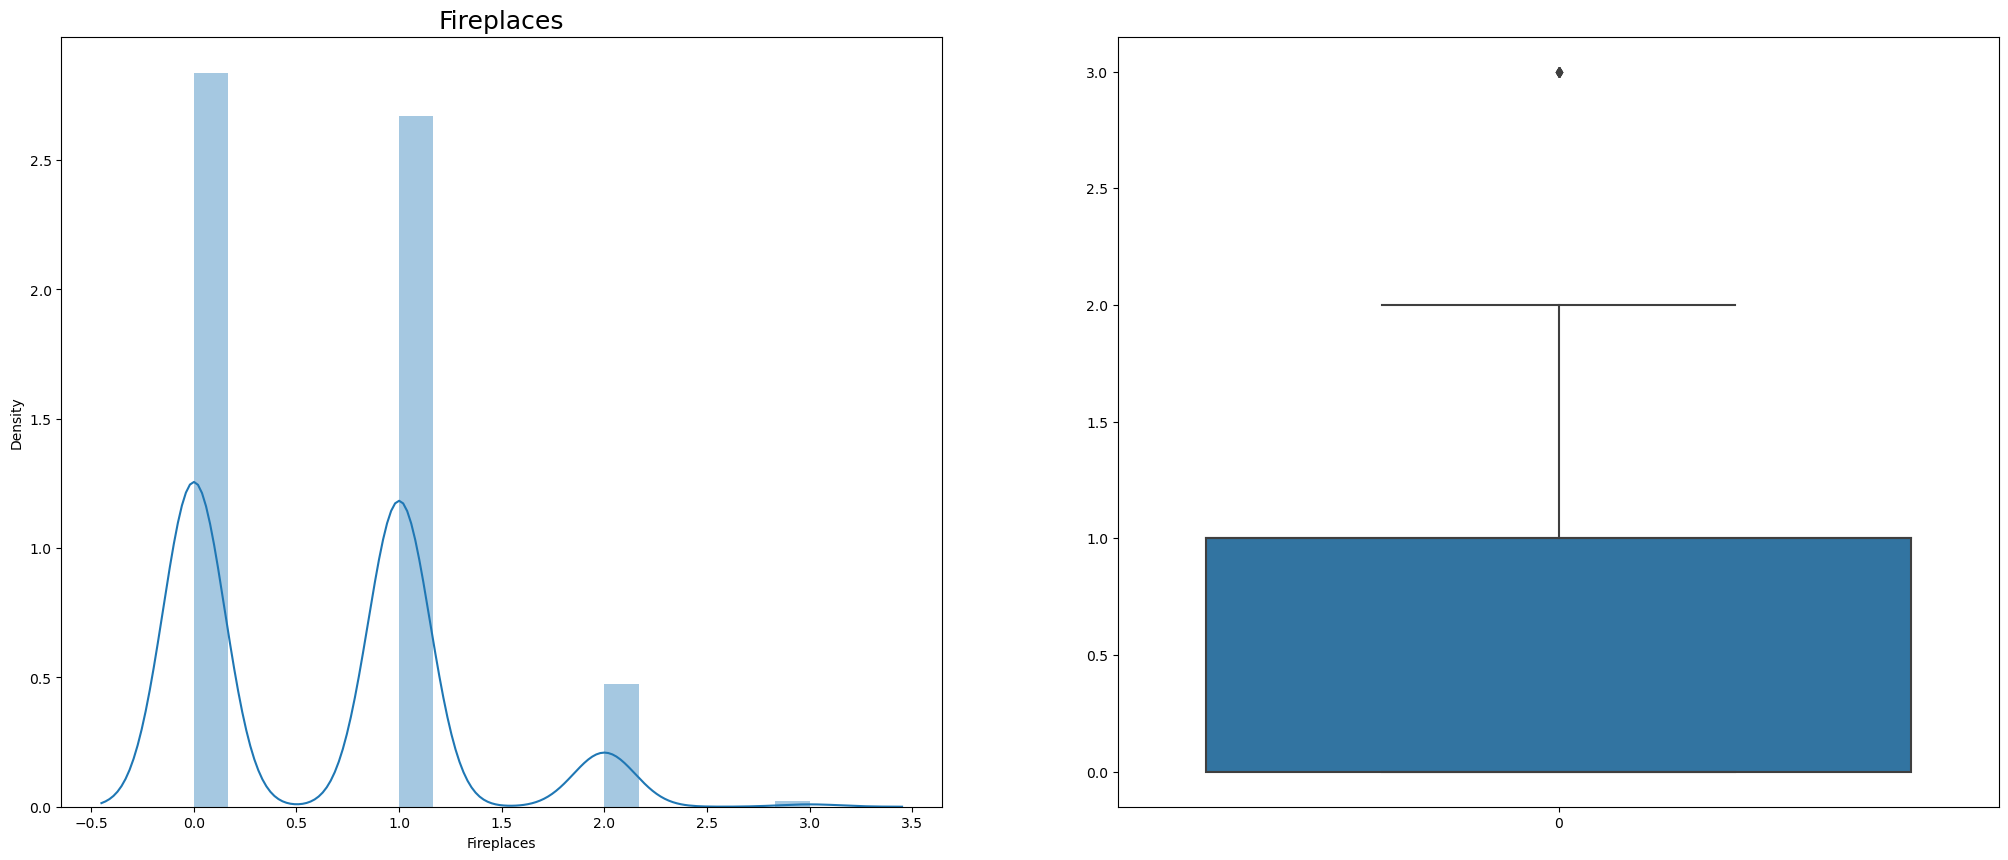

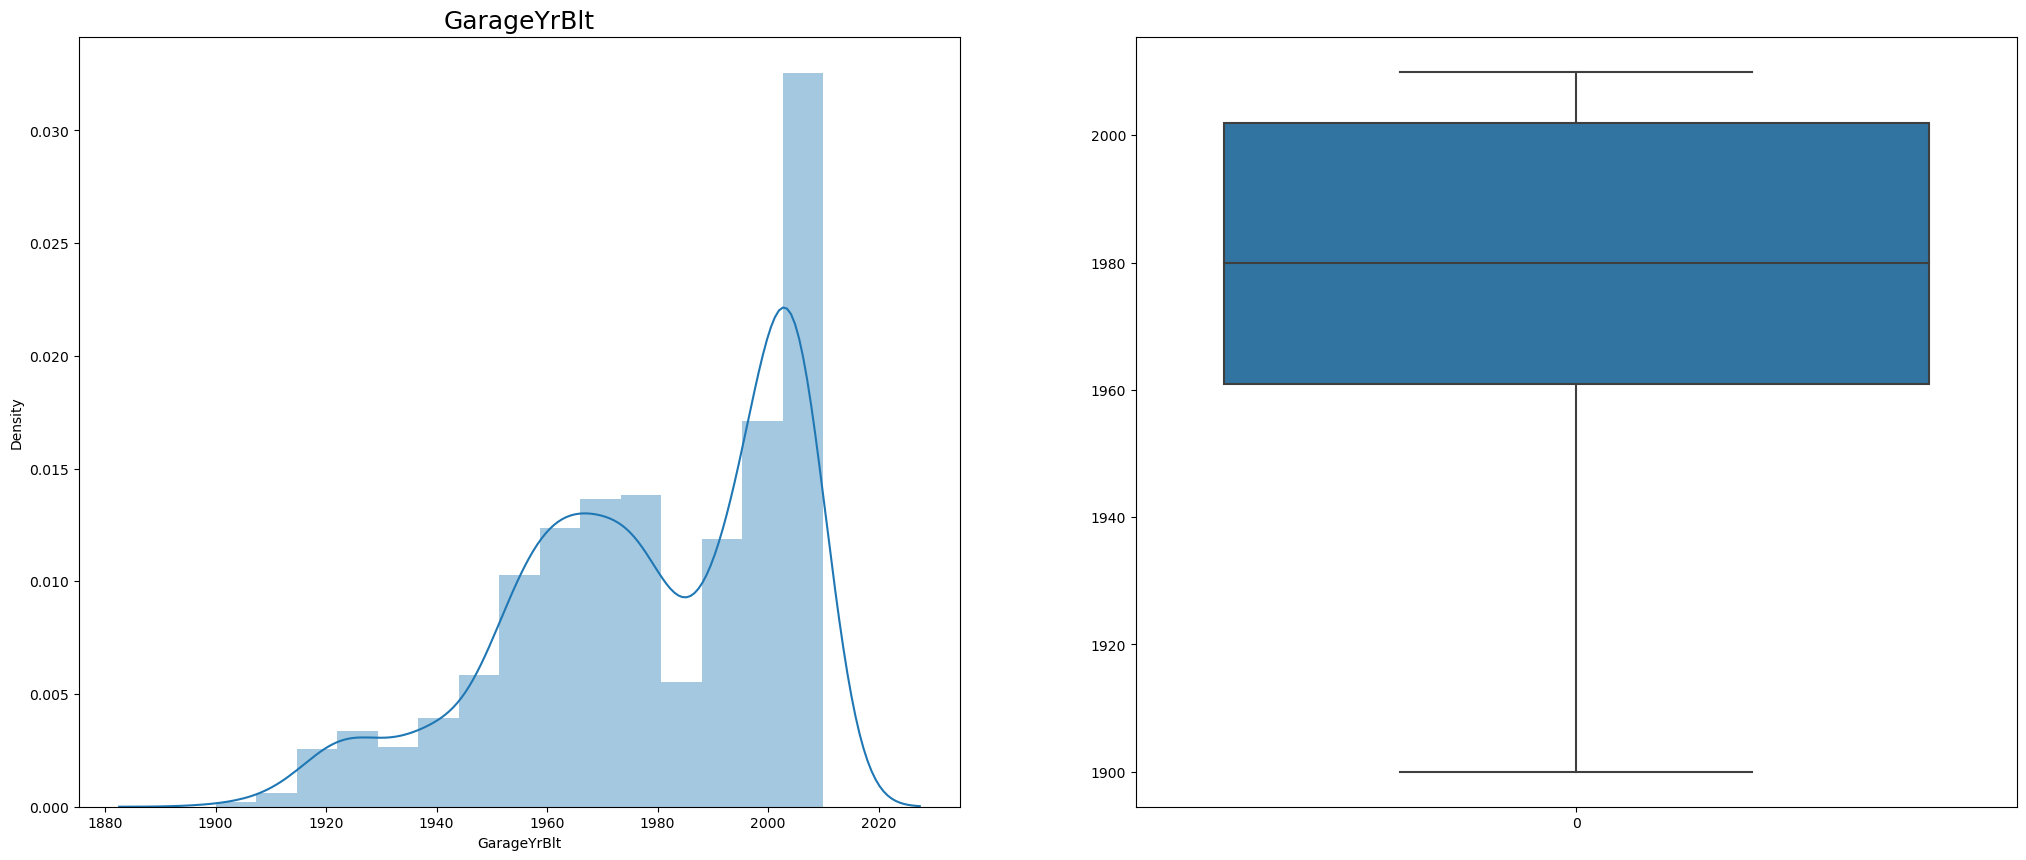

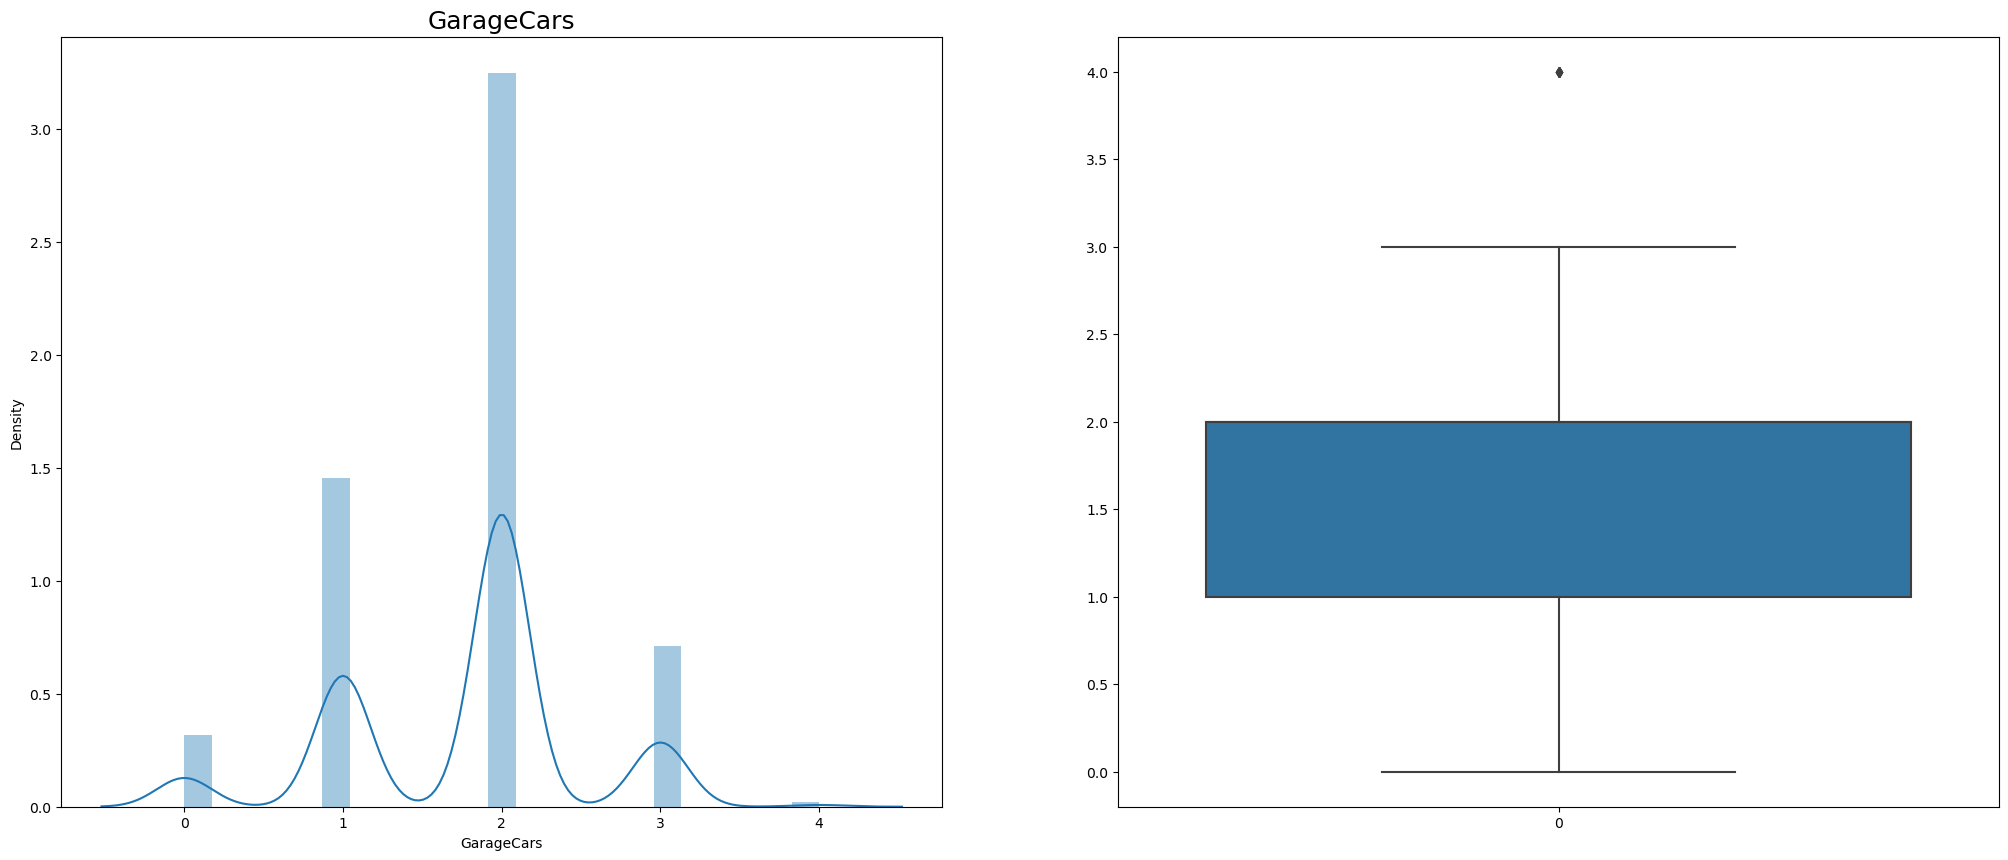

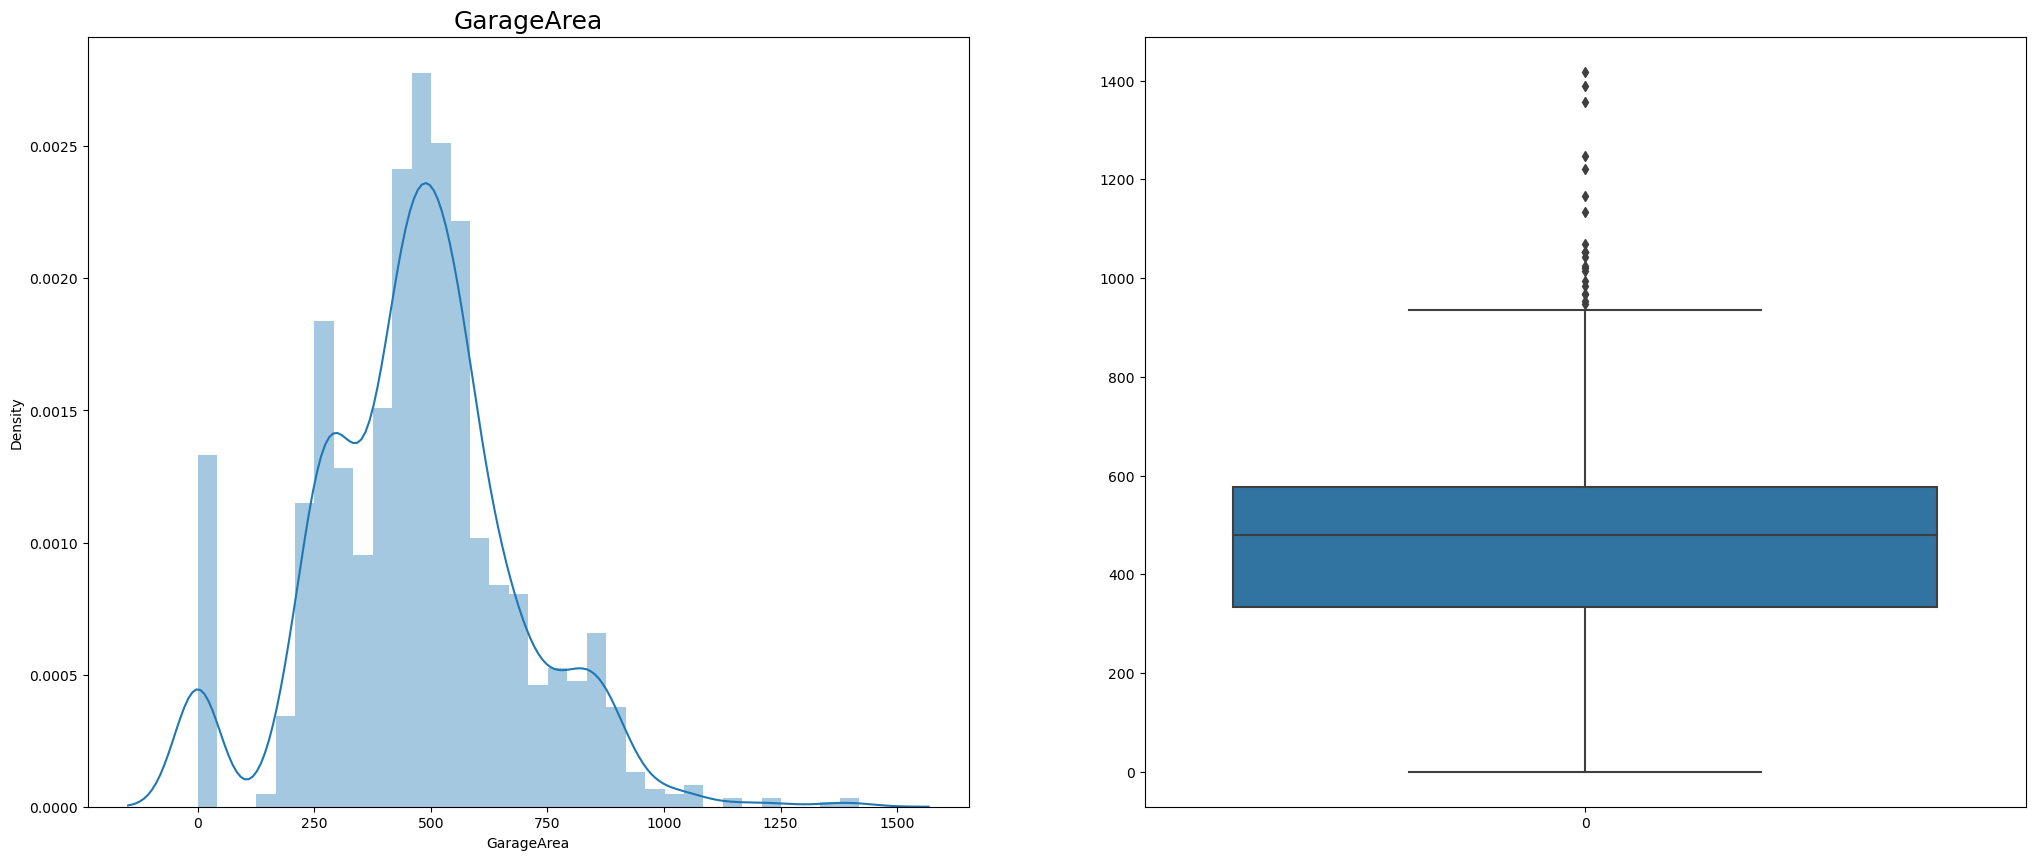

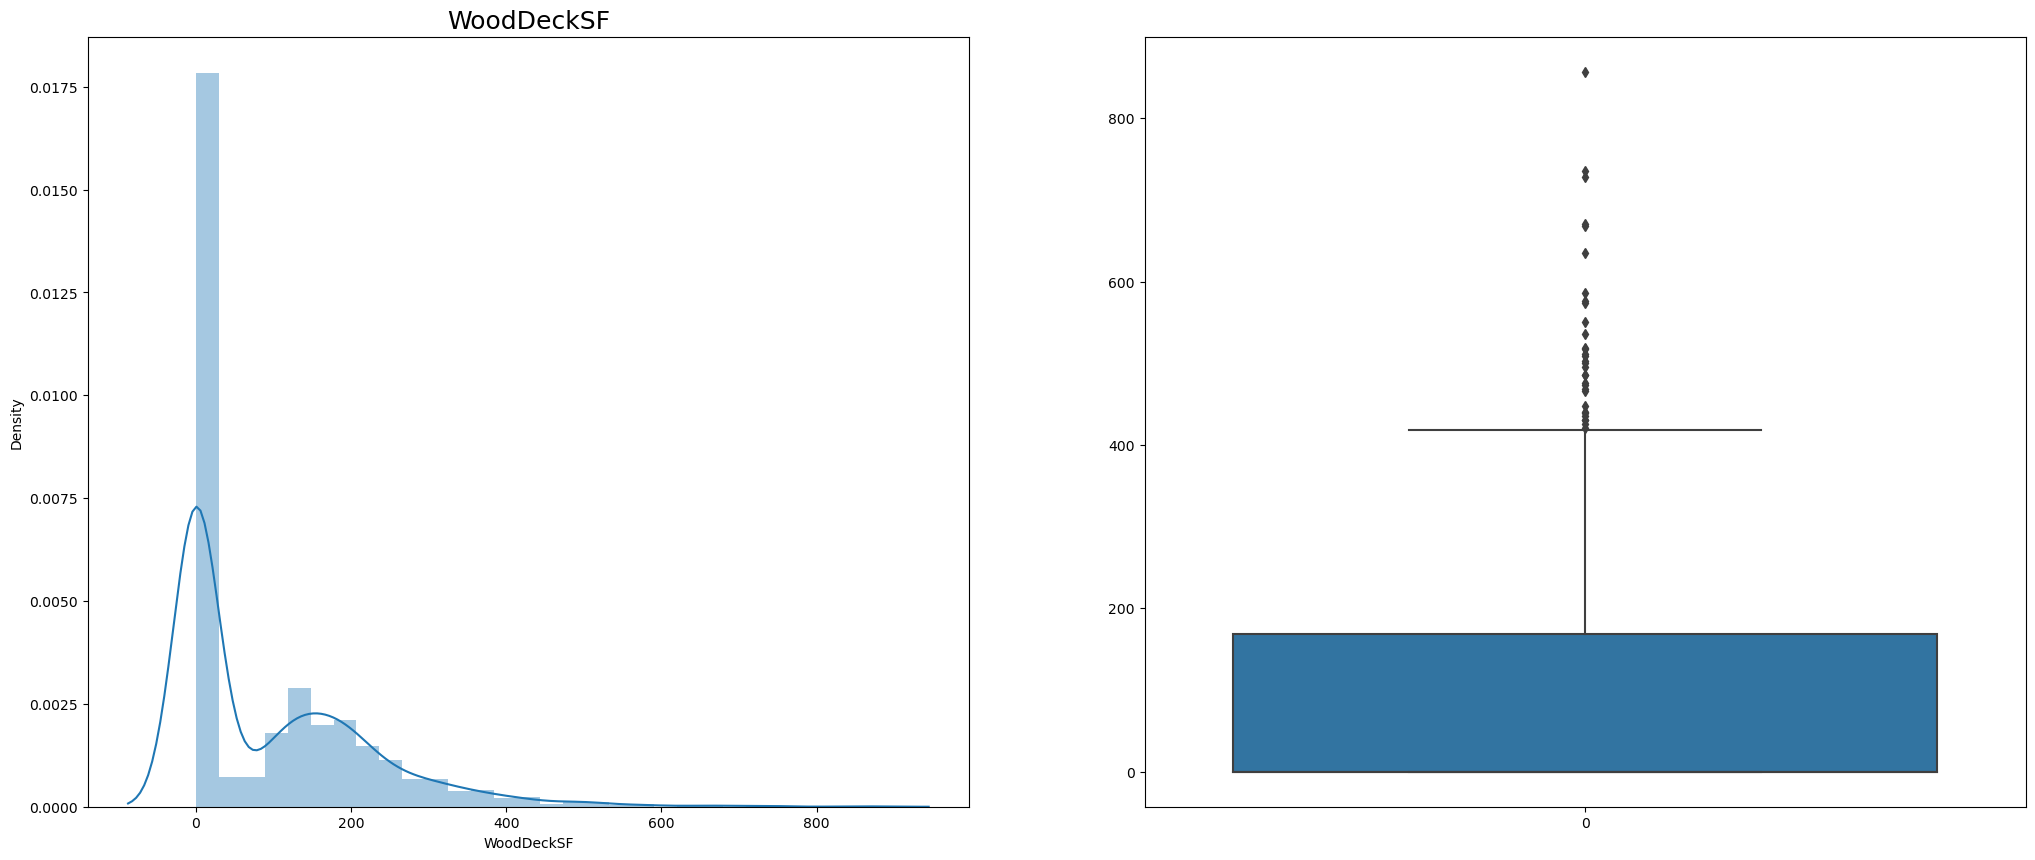

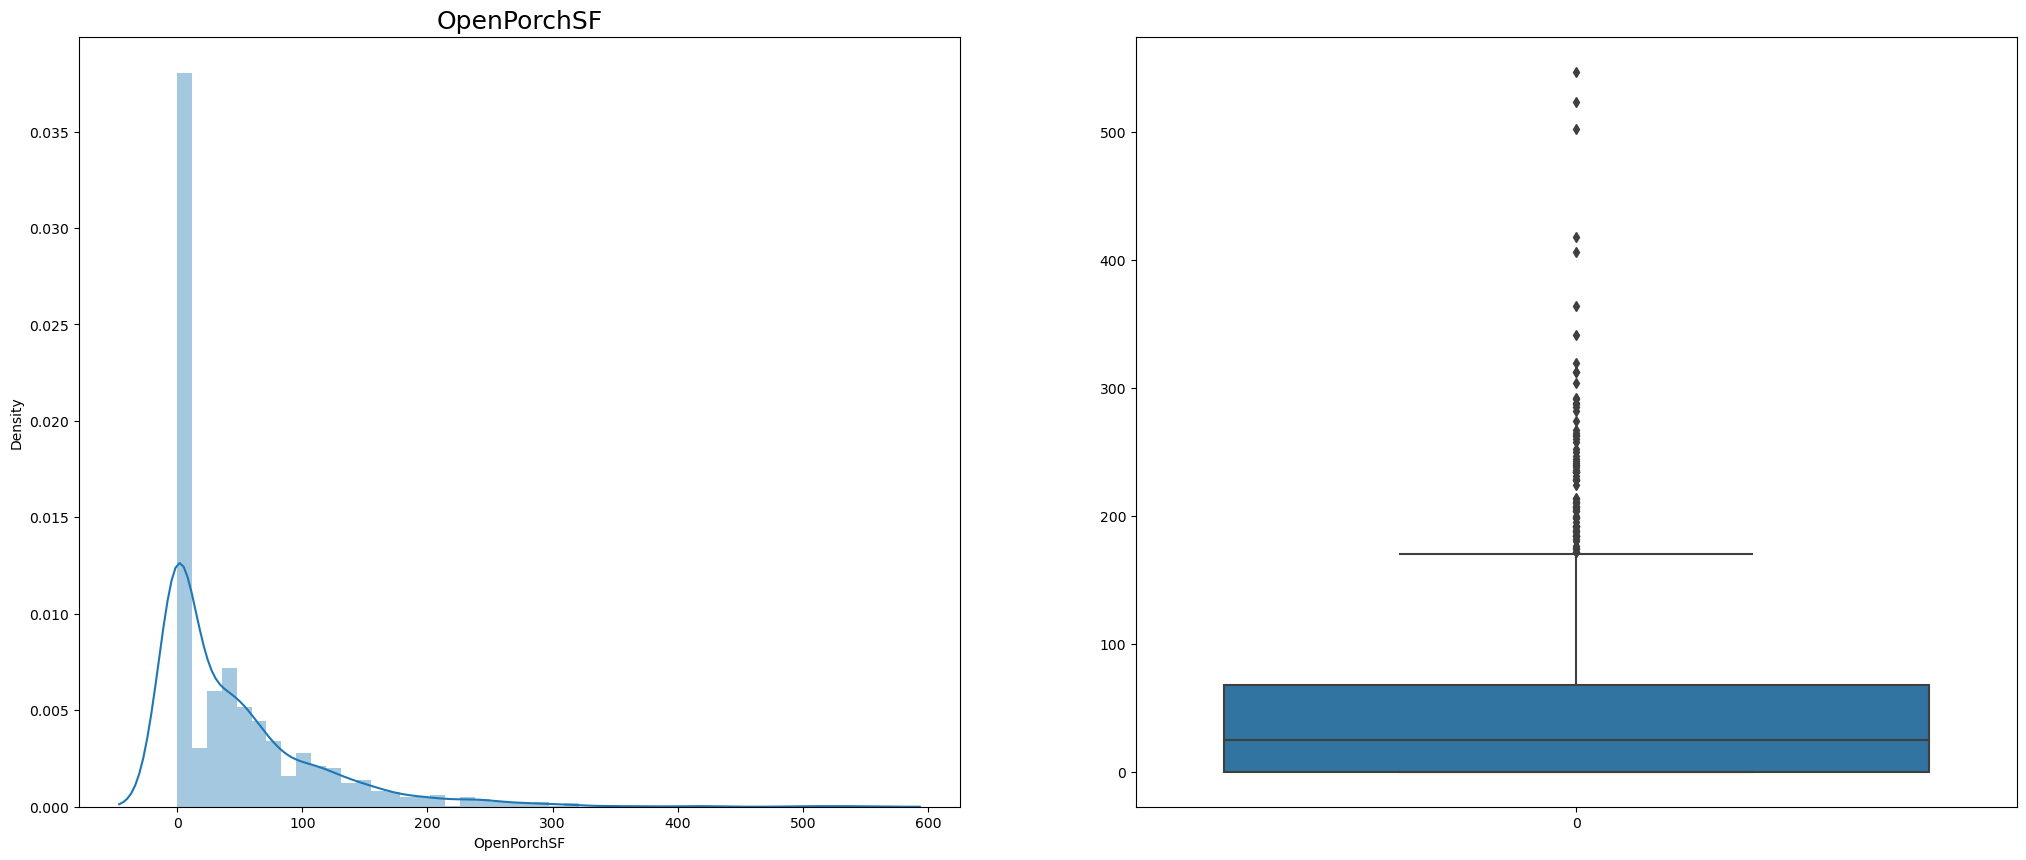

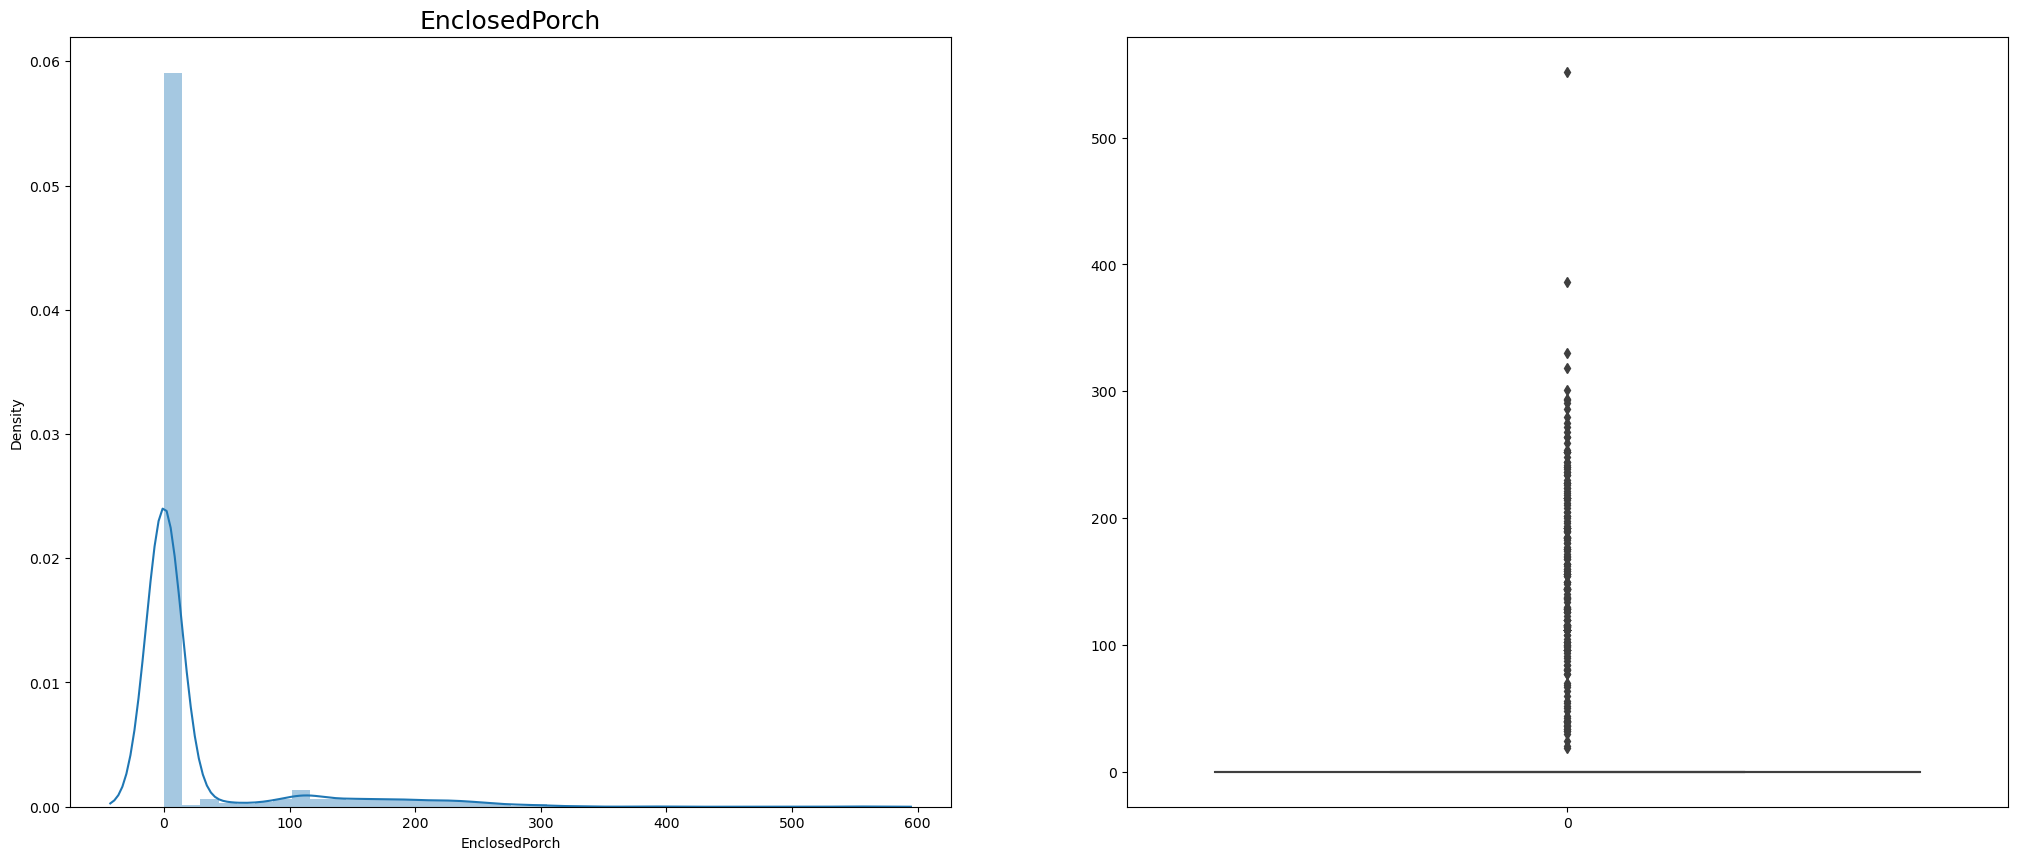

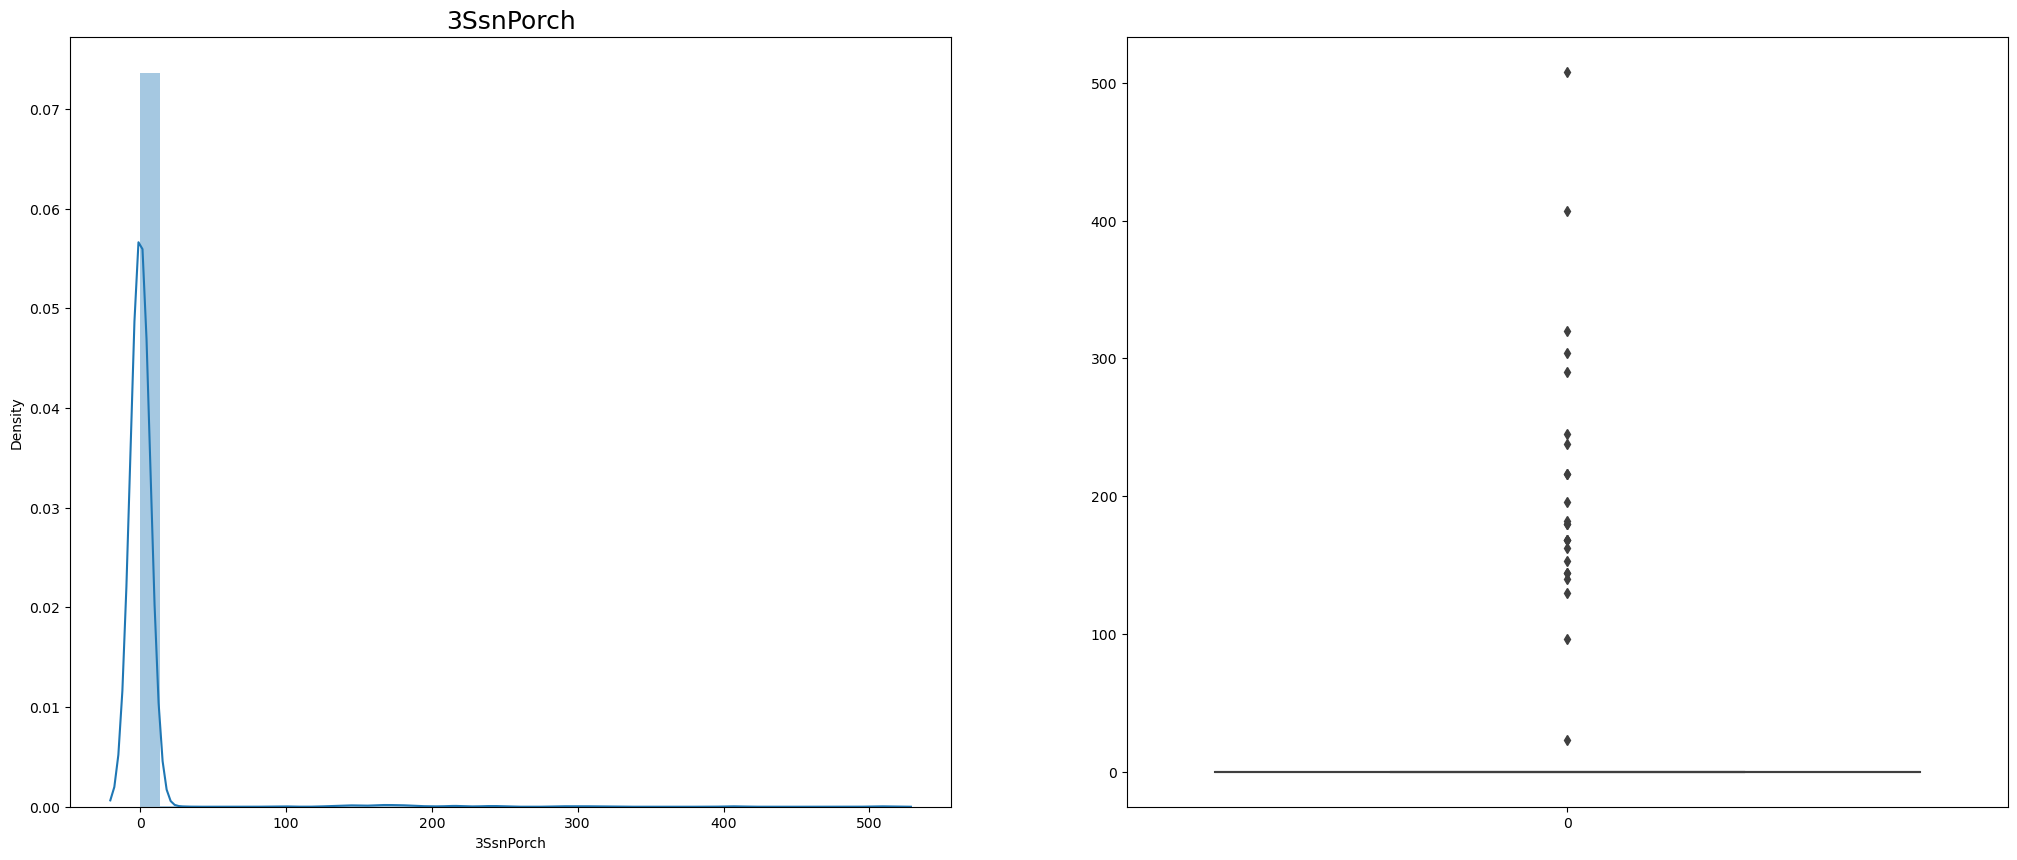

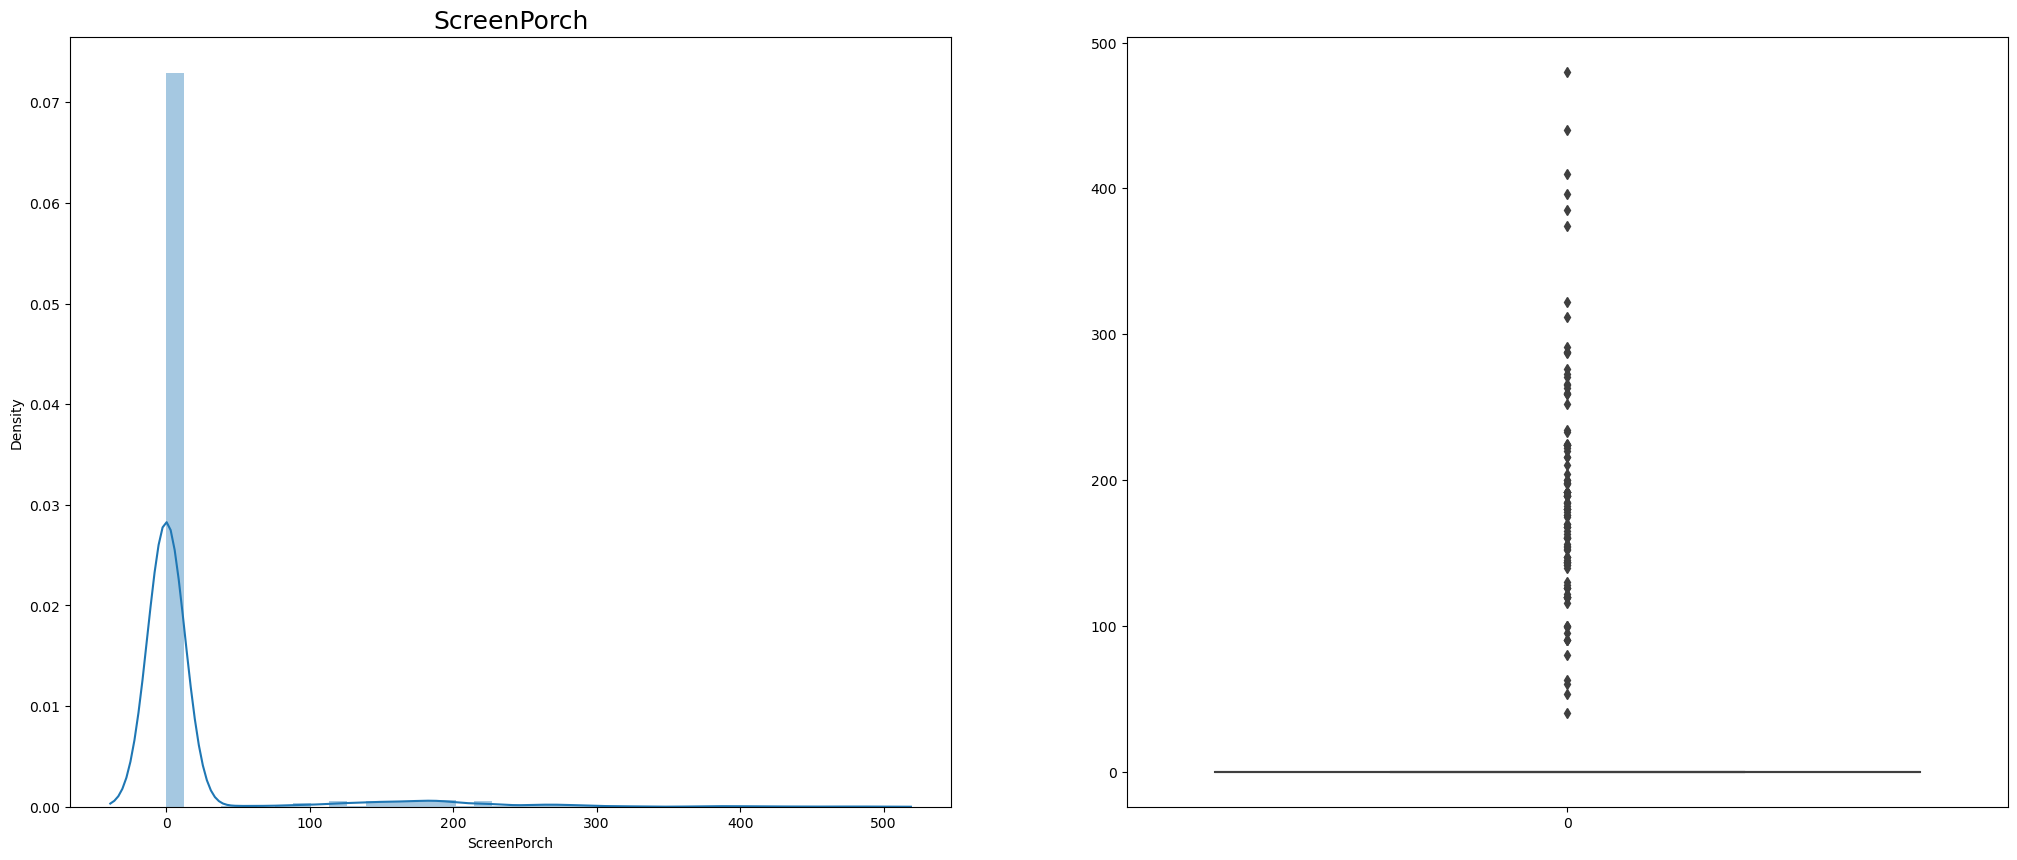

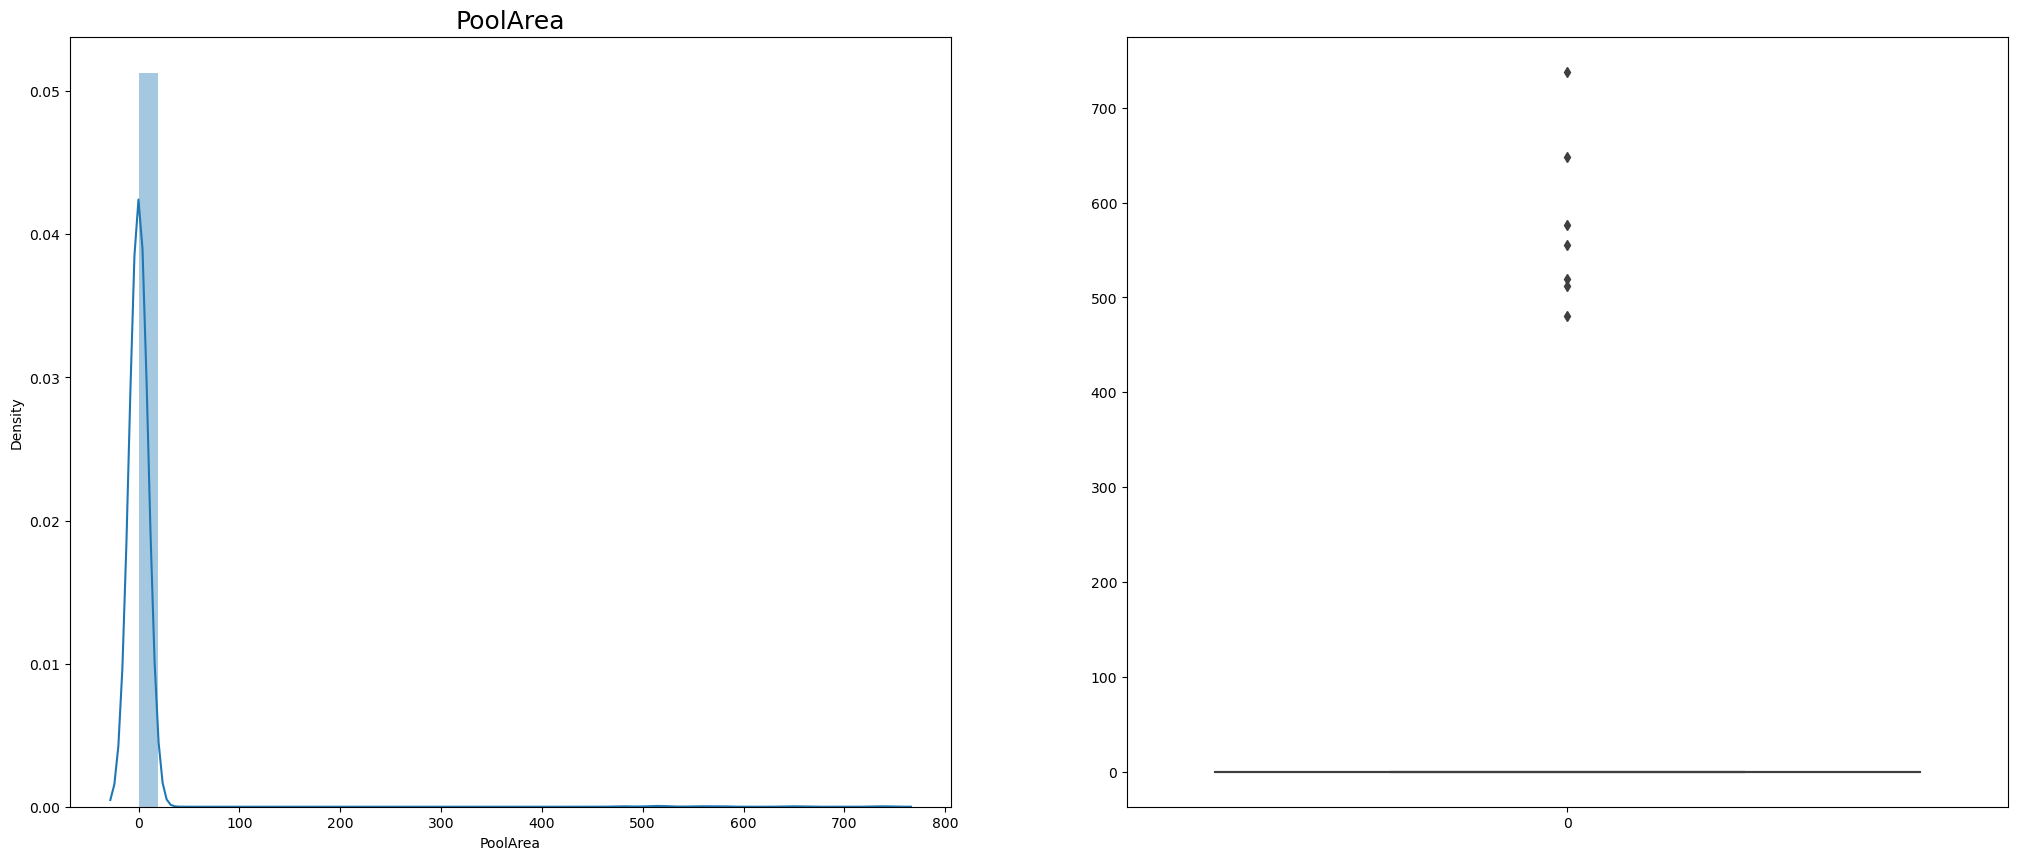

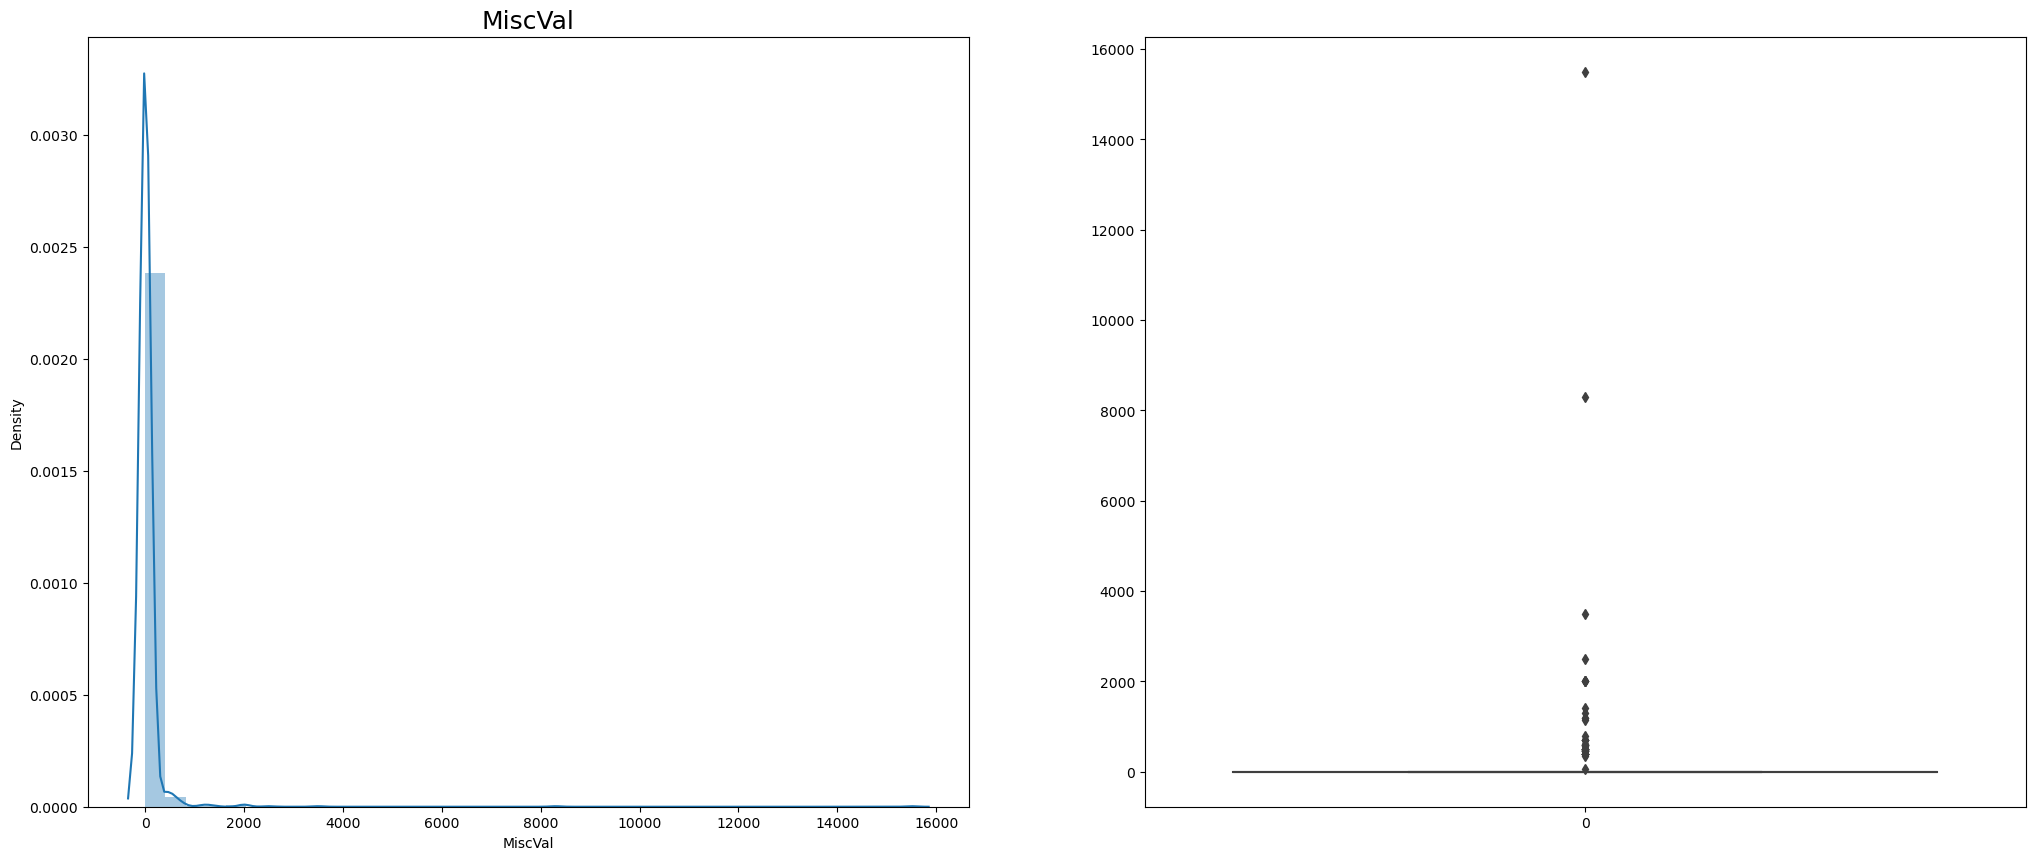

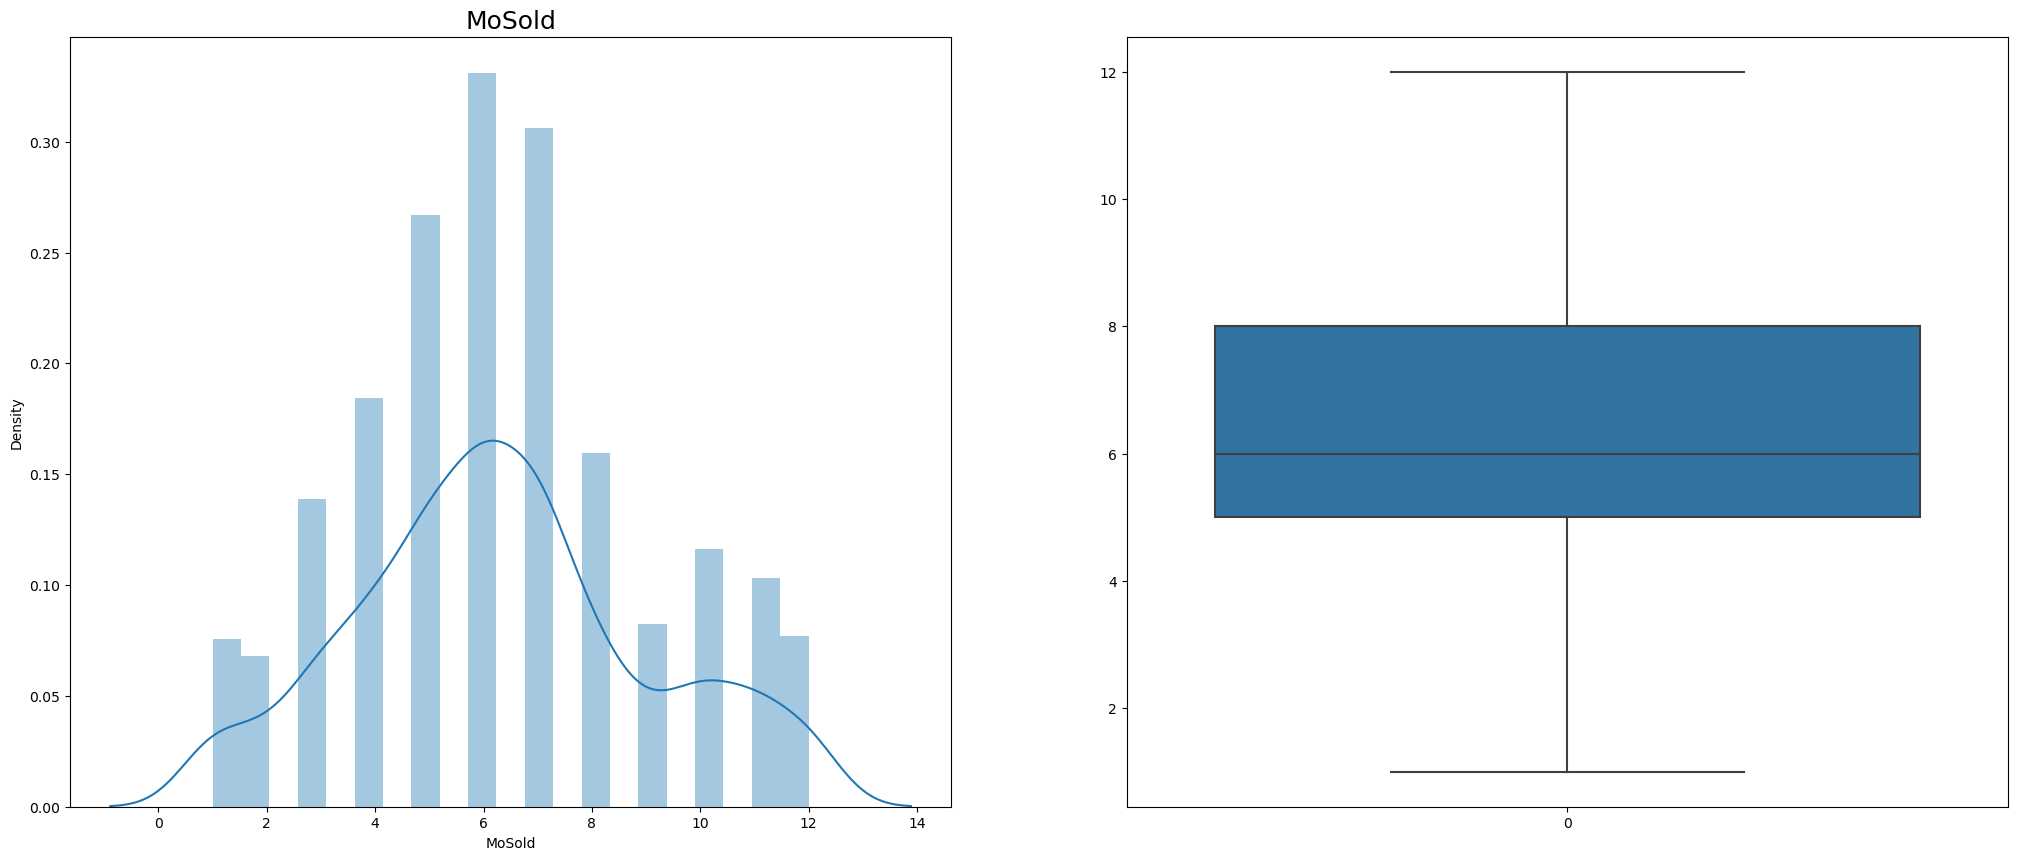

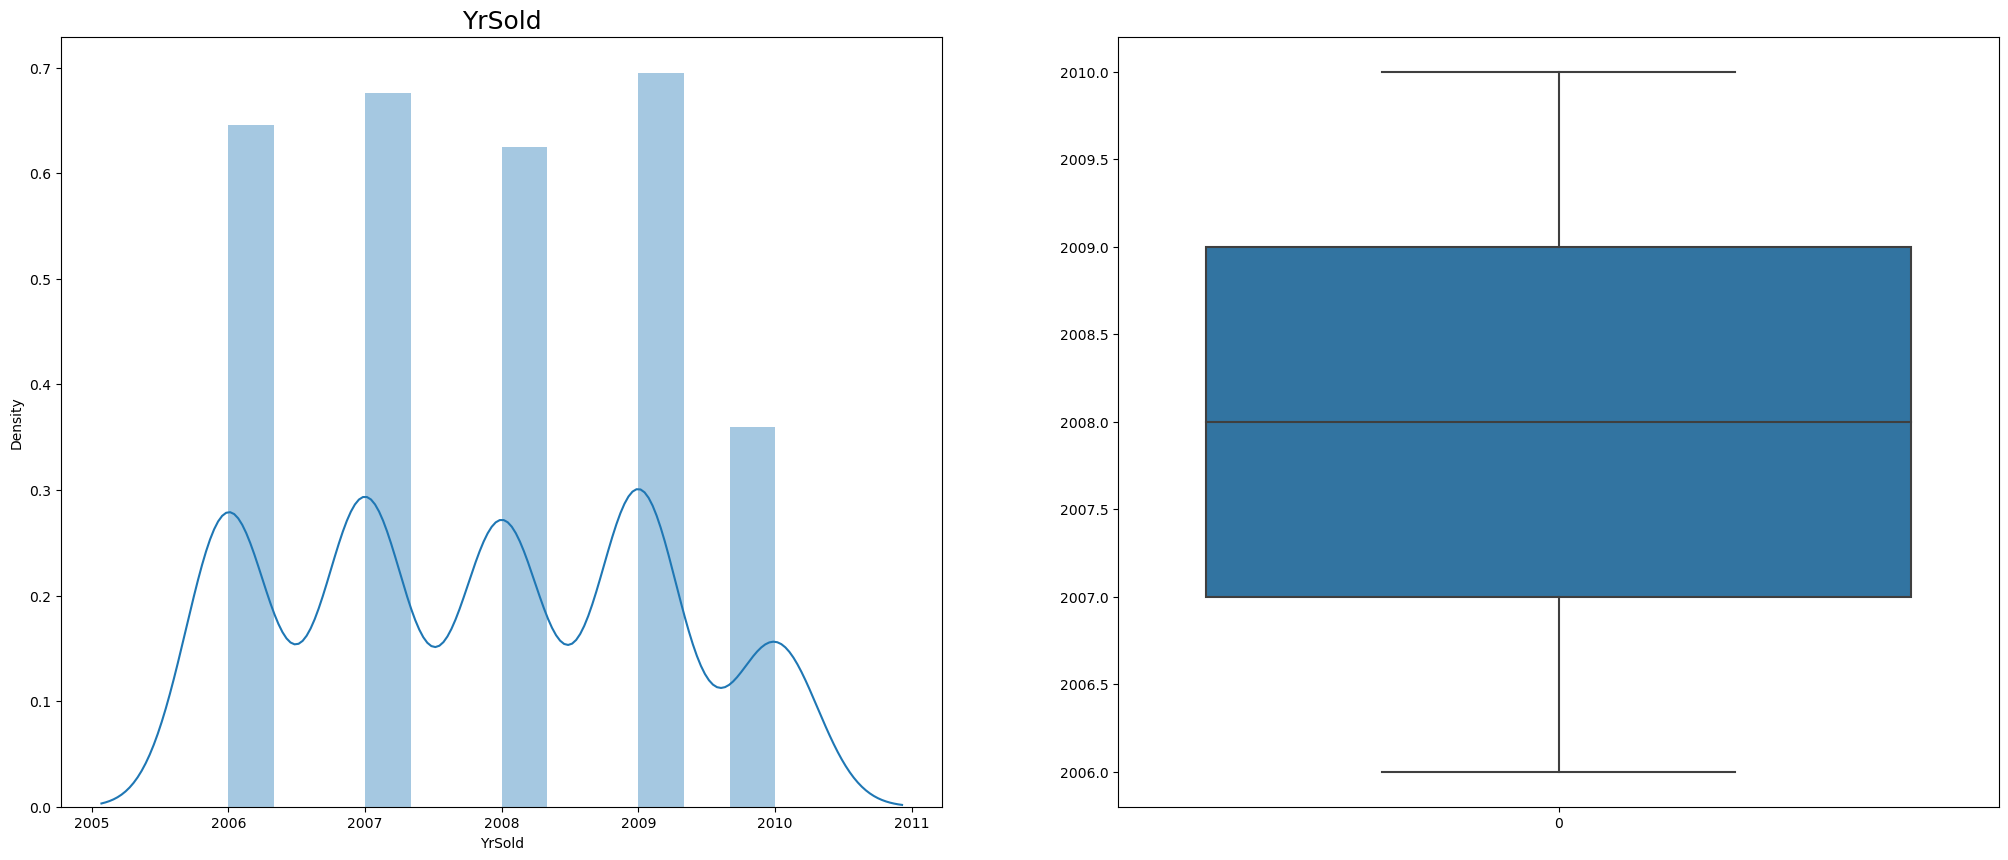

In [344]:
for col in df_numeric.columns:
    plt.figure(figsize=(25,10))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(df_numeric[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_numeric[col])
    plt.show()

<Figure size 1000x500 with 0 Axes>

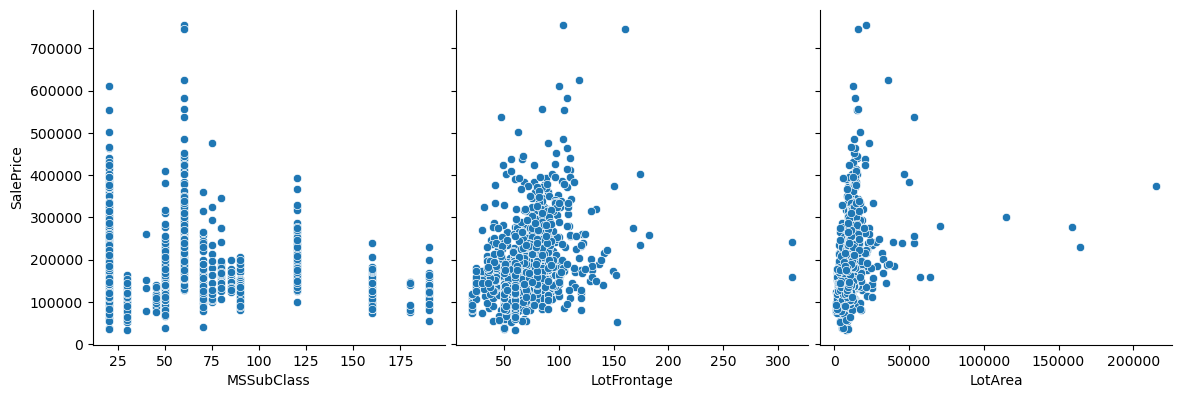

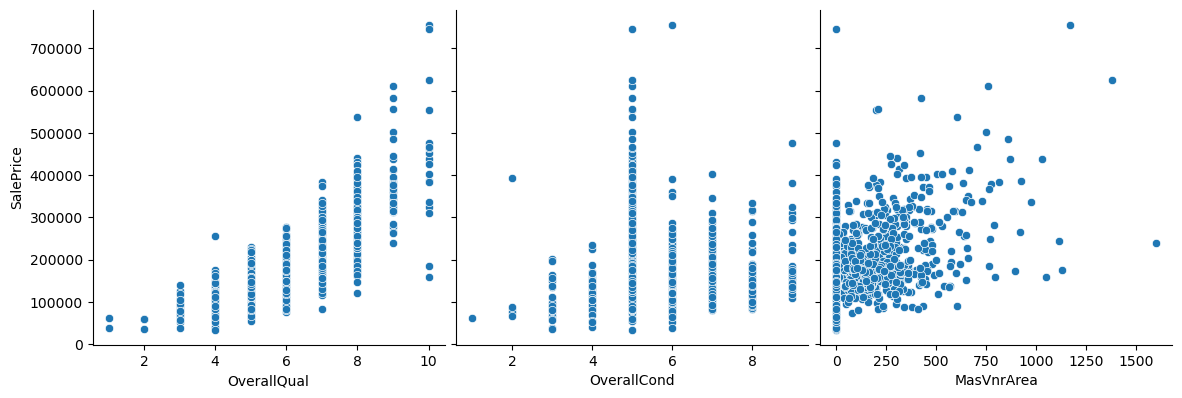

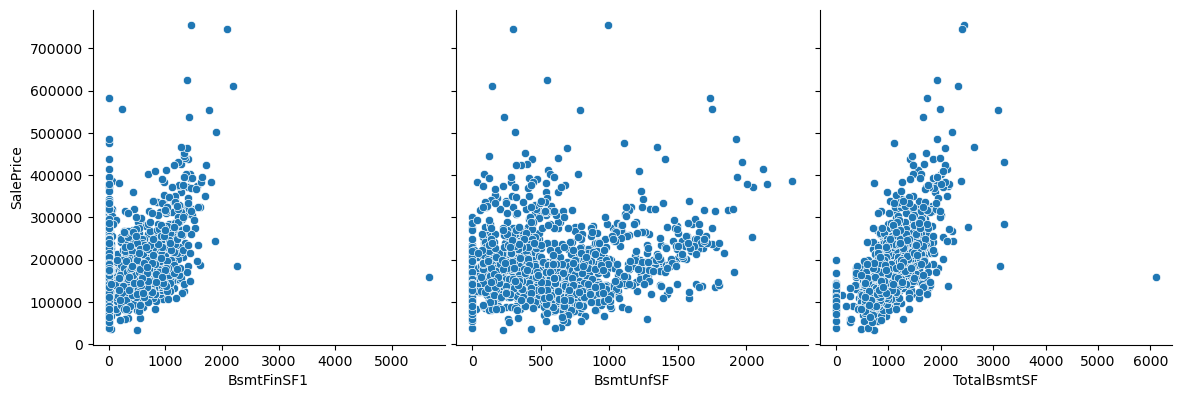

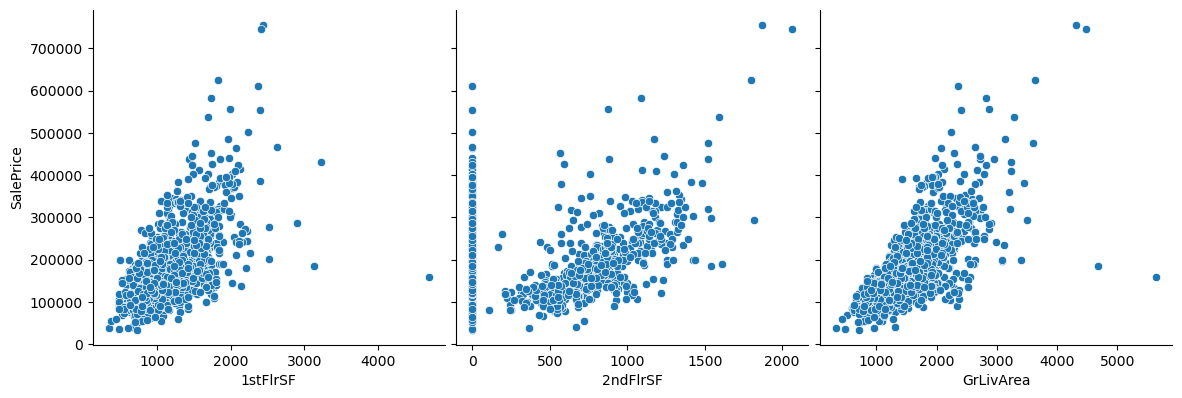

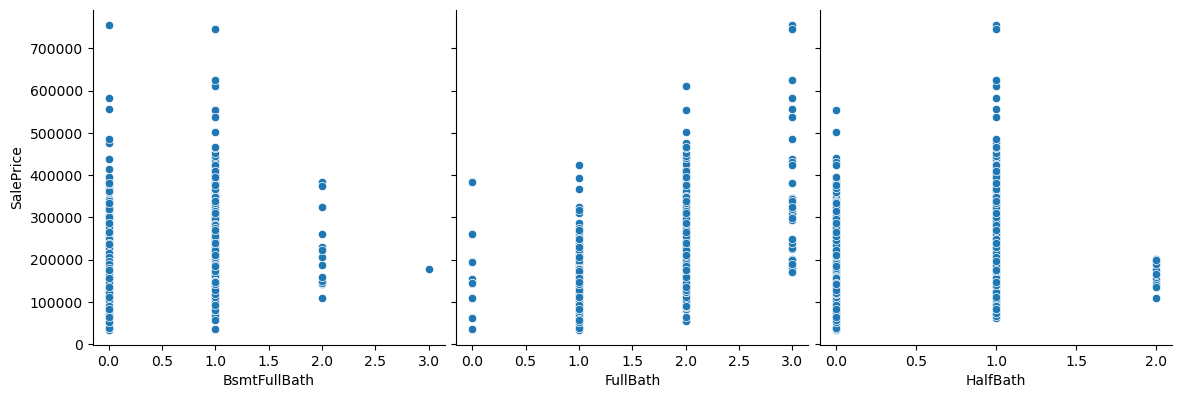

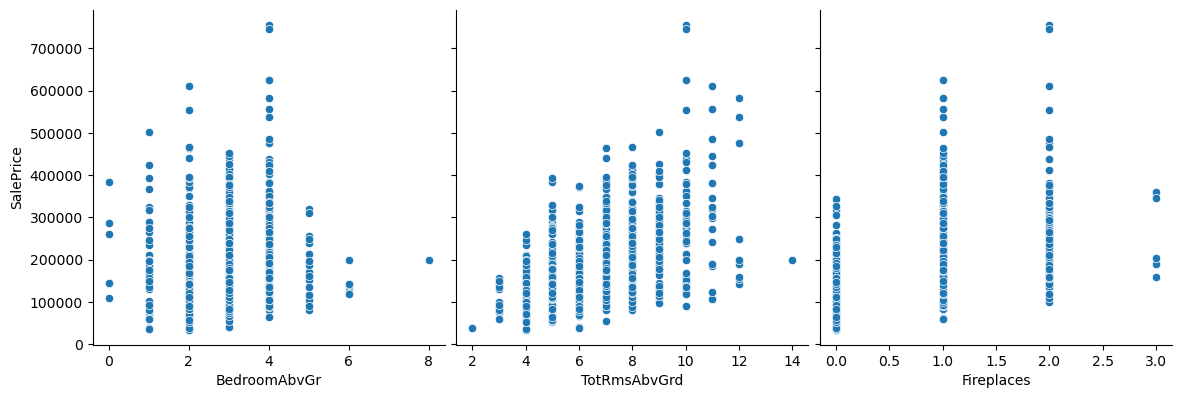

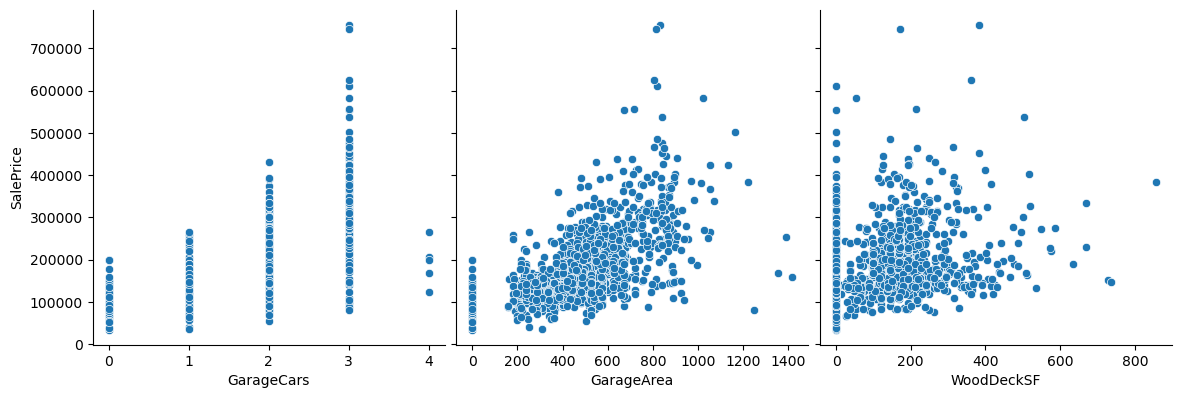

In [345]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

Here we can see that, 1stFlrSF, GrLivArea is showing correlation towards right rest variables are scattered a lot

In [346]:
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique())
    print()

MSSubClass
[60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']

Street
['Pave' 'Grvl']

Alley
[nan 'Grvl' 'Pave']

LotShape
['Reg' 'IR1' 'IR2' 'IR3']

LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

Utilities
['AllPub' 'NoSeWa']

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope
['Gtl' 'Mod' 'Sev']

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

OverallQual
[7 6 8 5 9 4 10 3 1 2]

OverallCond
[5 8 6 7 4 2 3 9 1]

RoofStyle
['Gable' 'Hip' 'Gambrel'

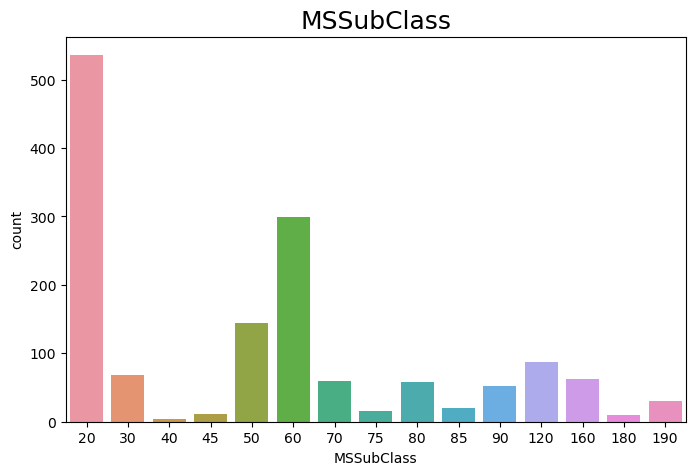

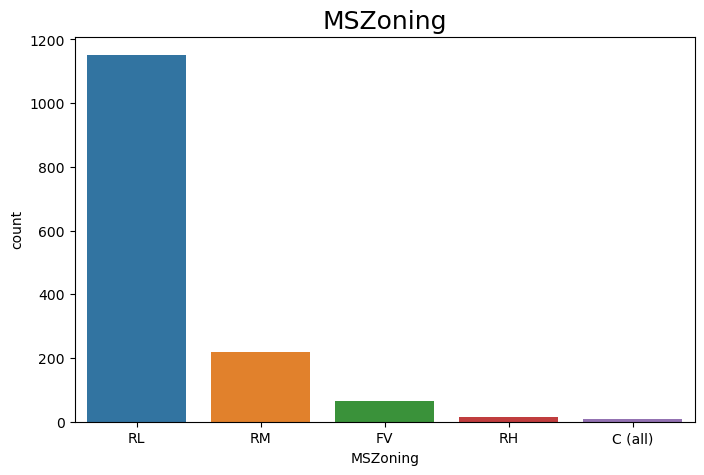

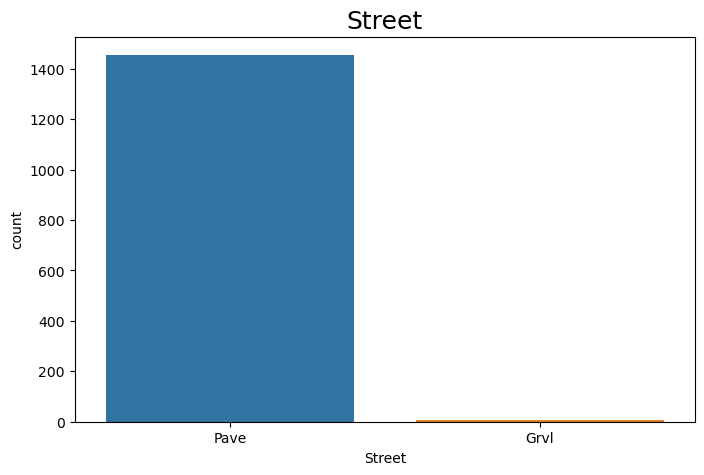

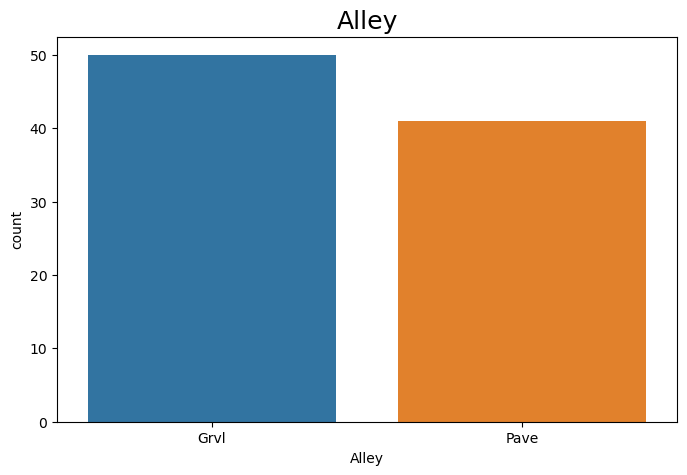

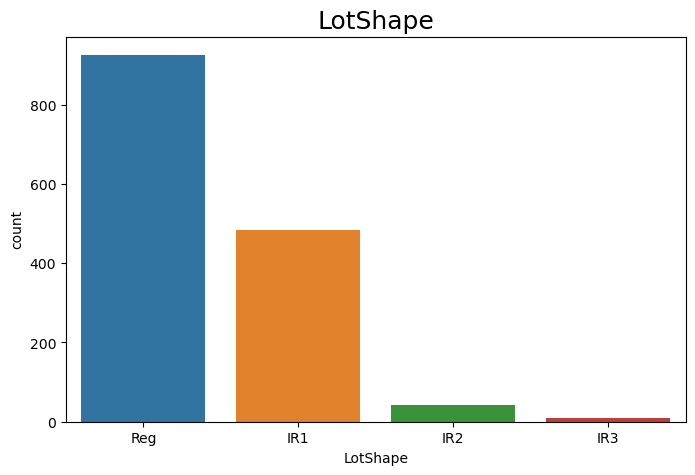

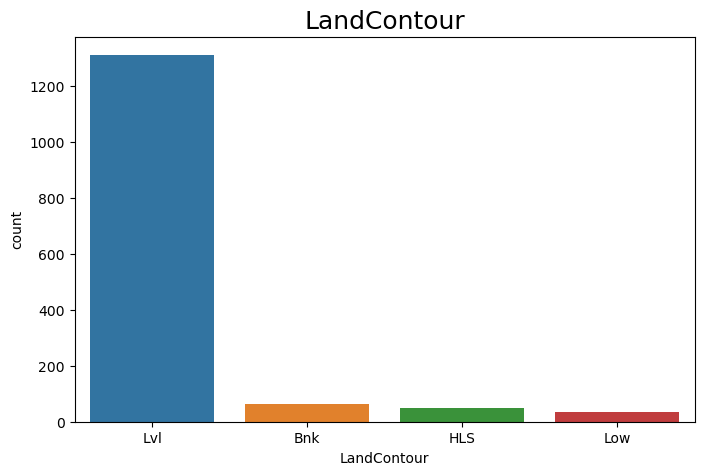

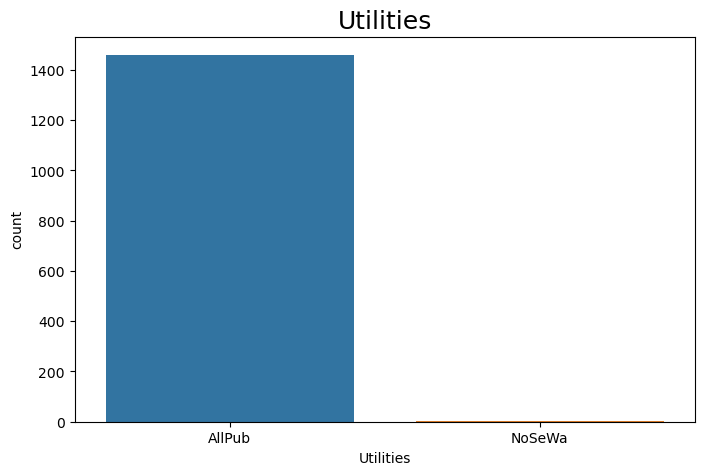

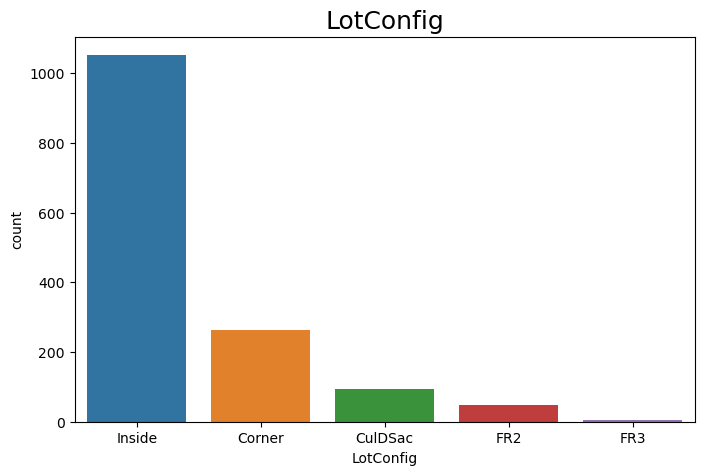

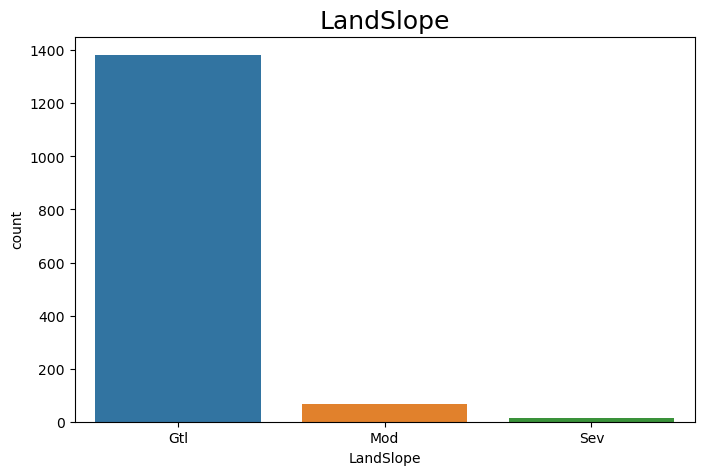

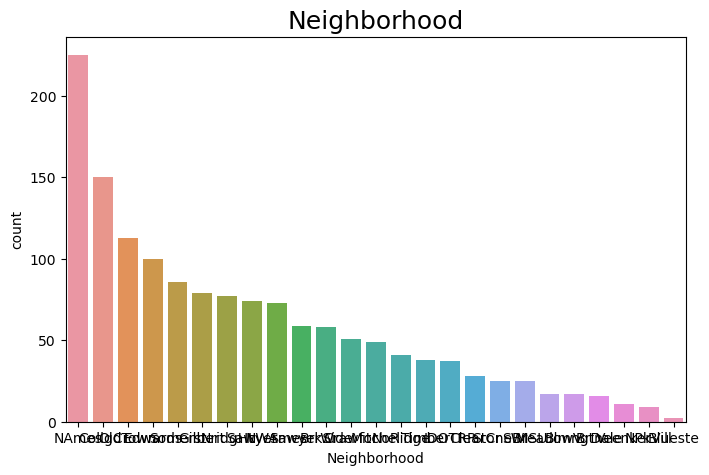

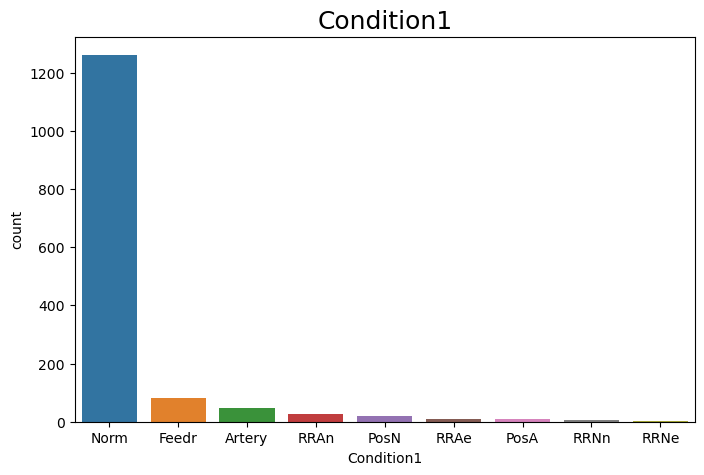

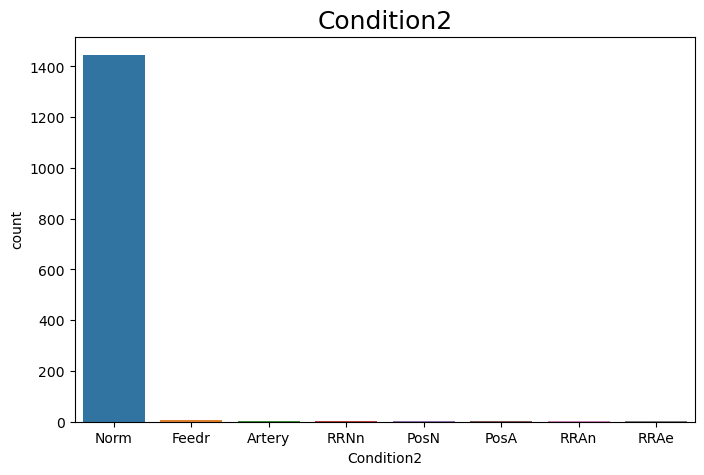

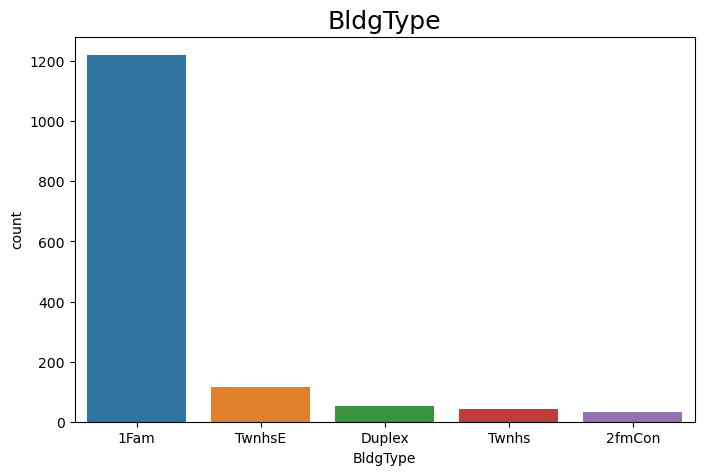

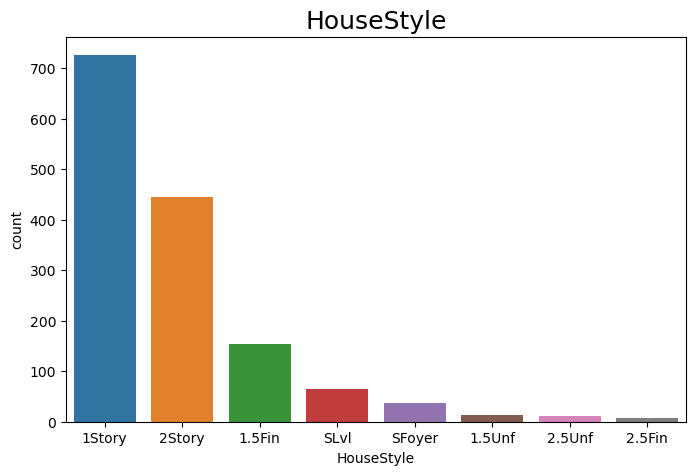

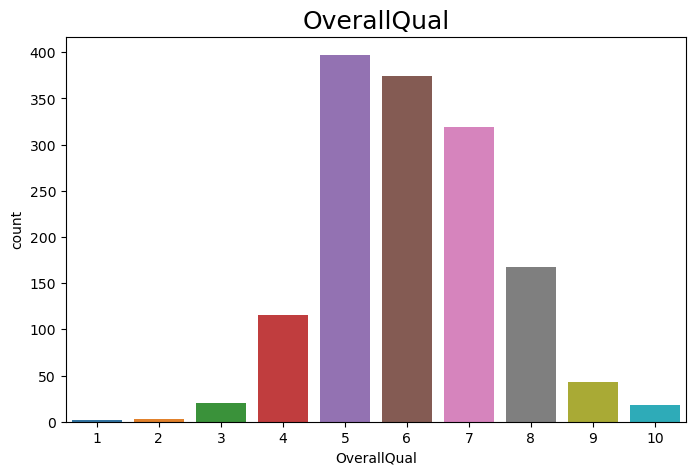

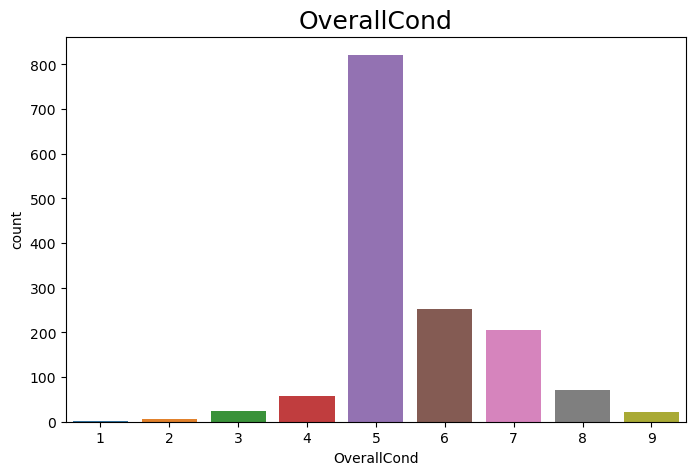

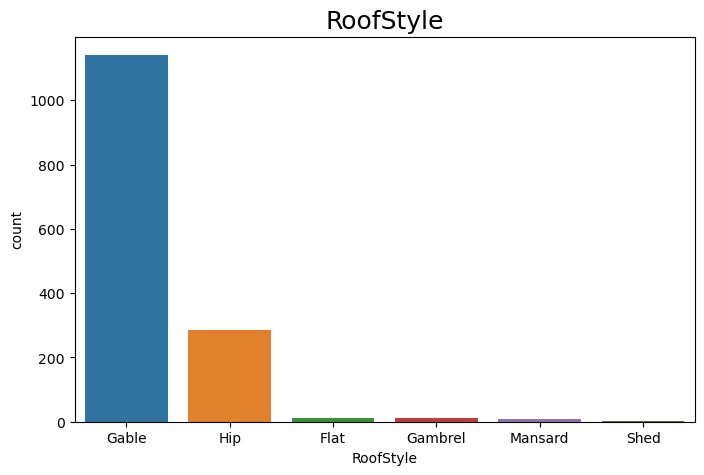

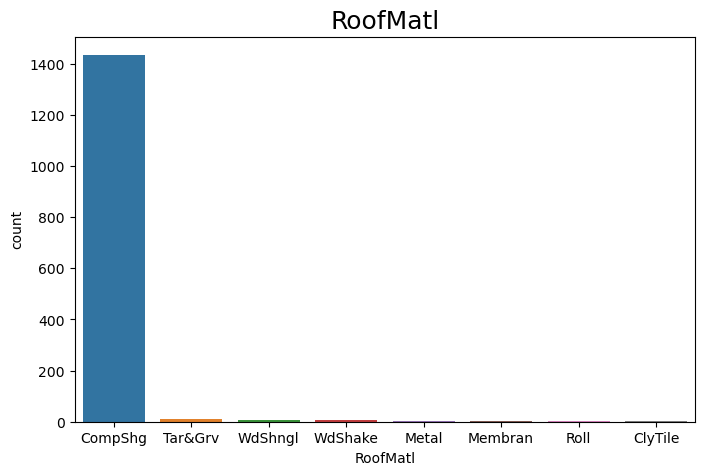

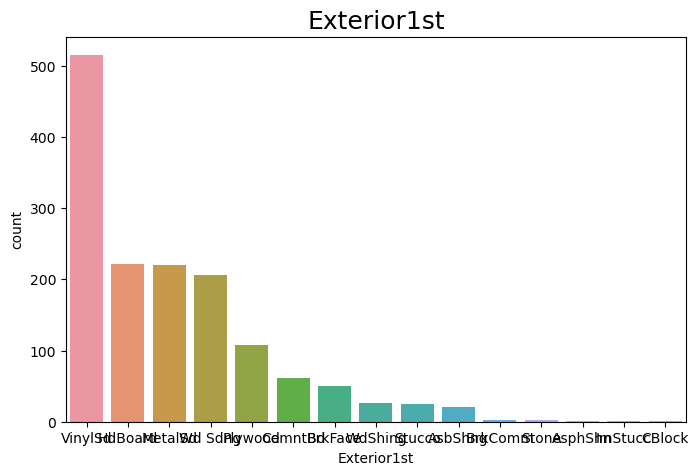

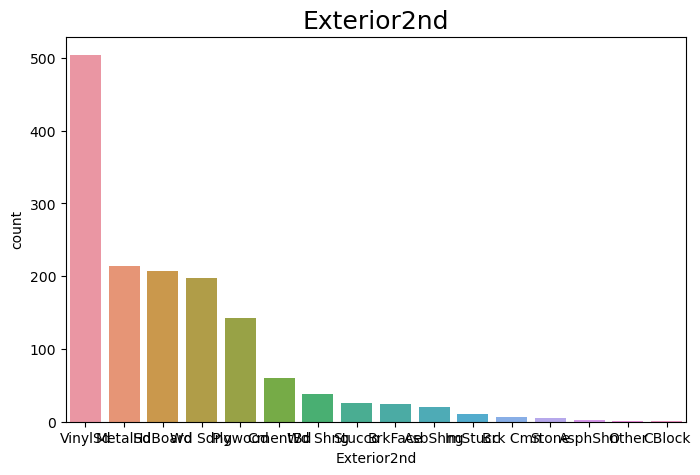

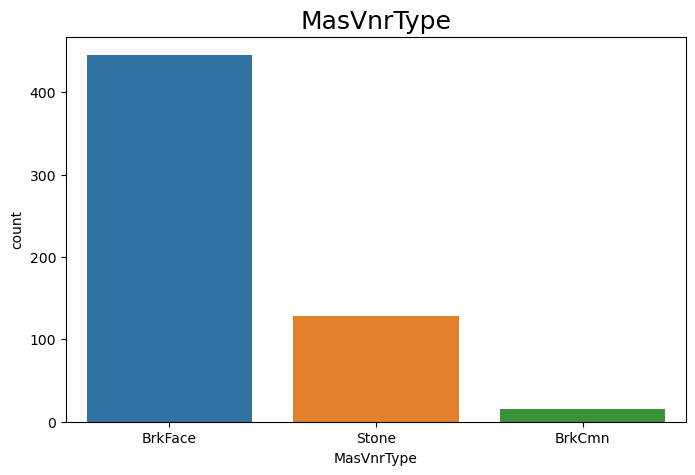

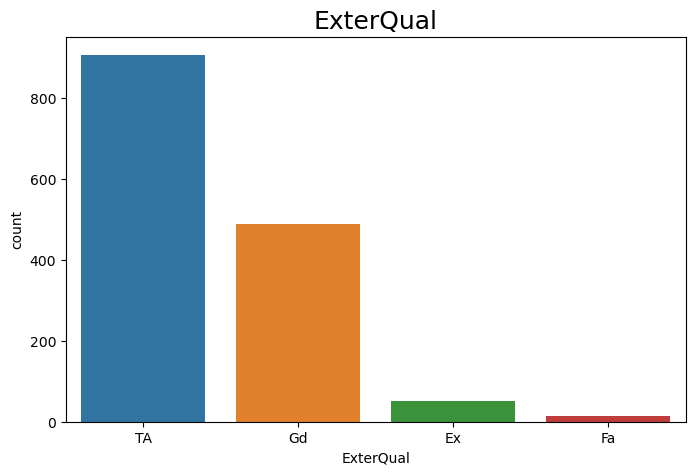

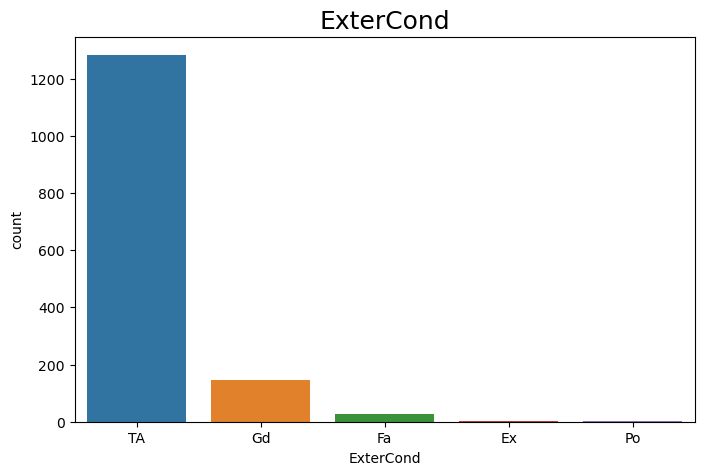

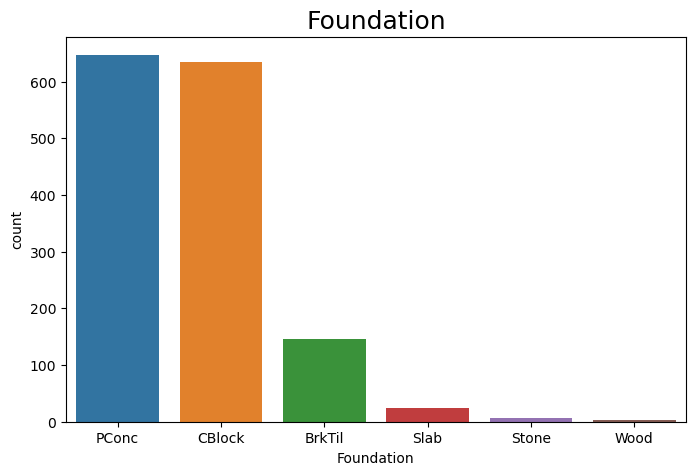

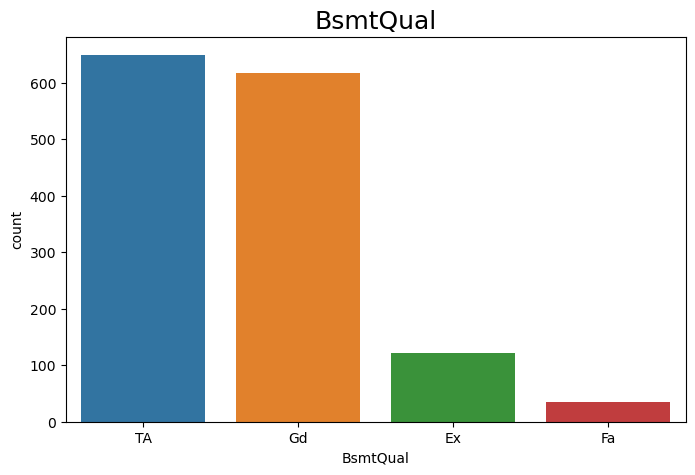

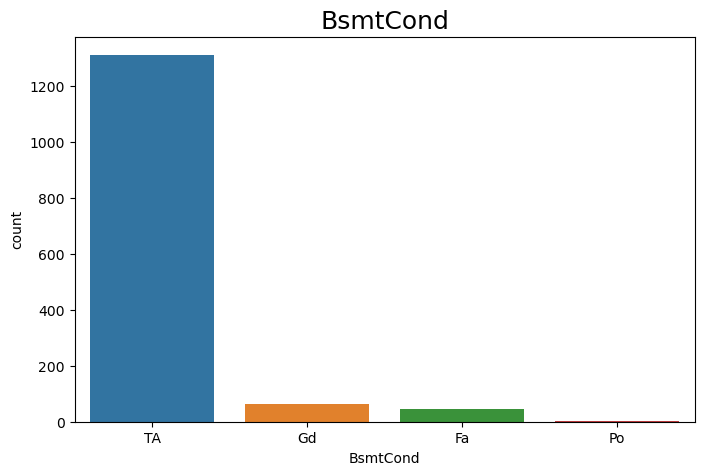

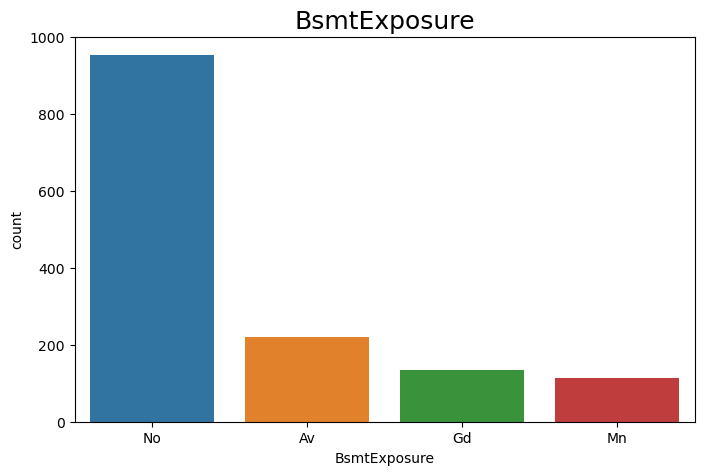

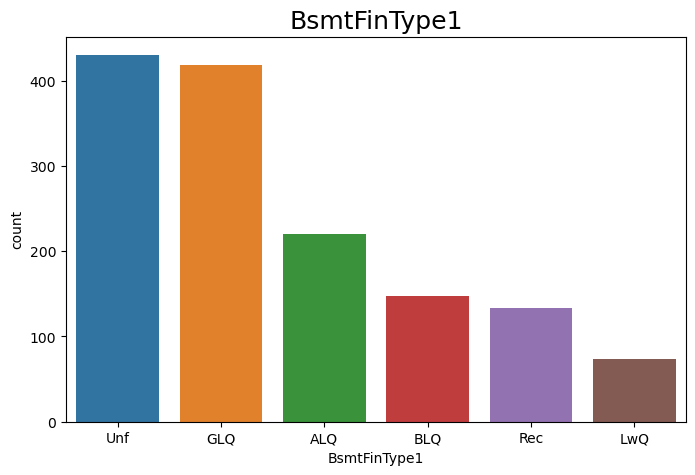

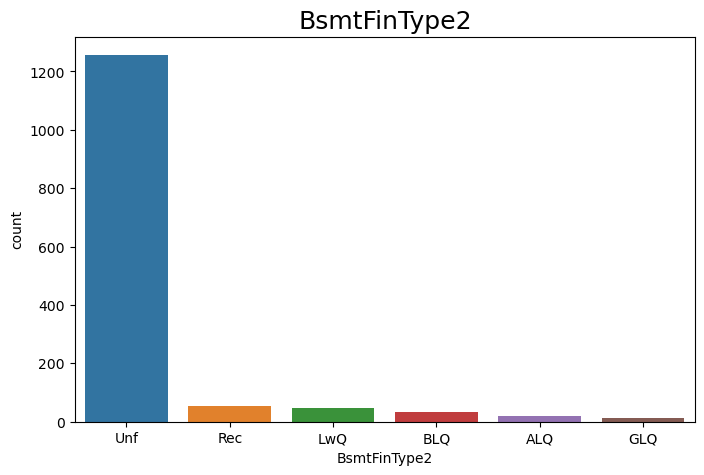

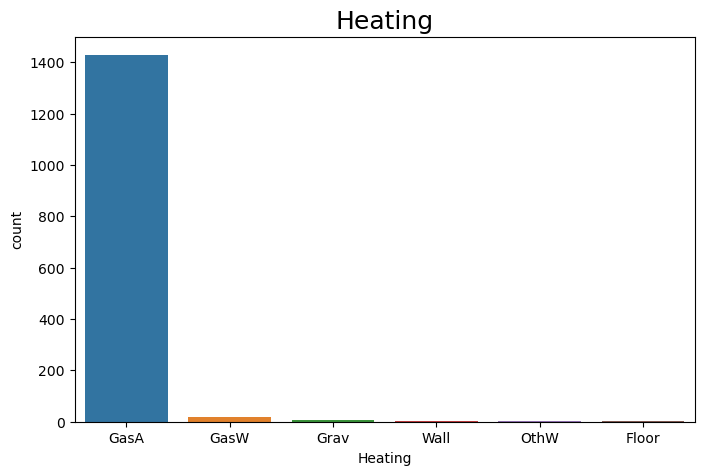

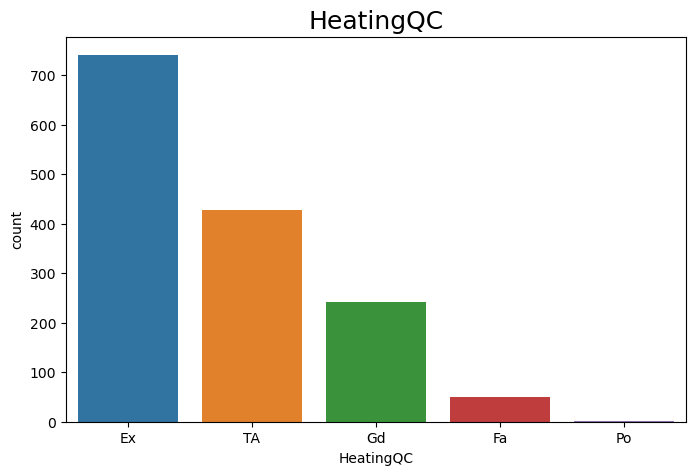

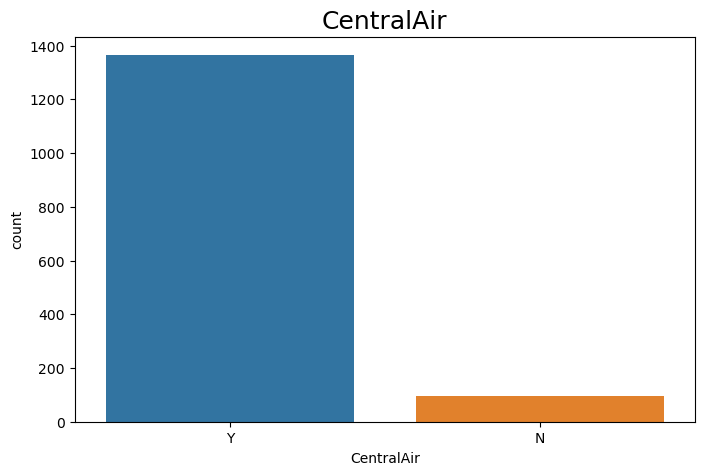

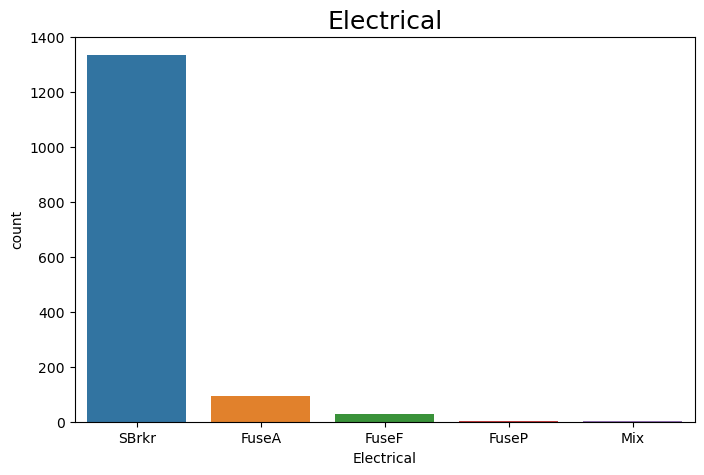

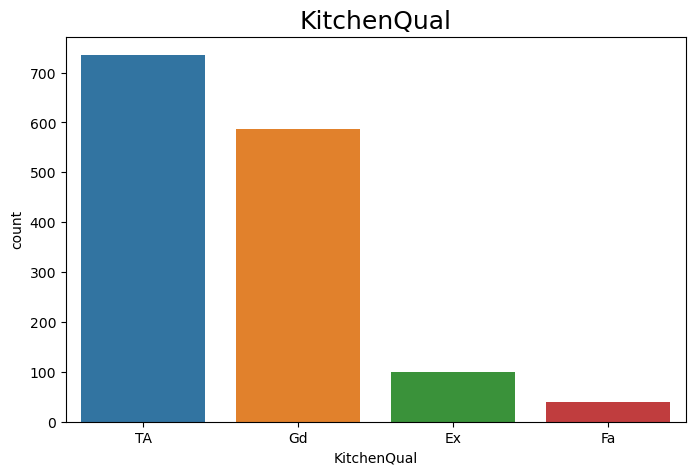

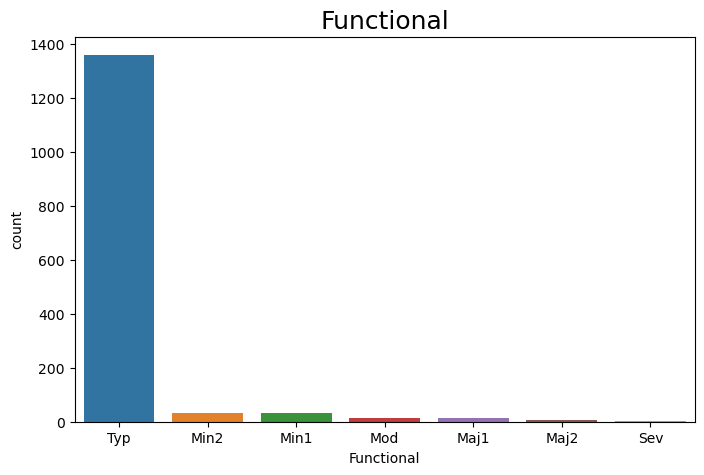

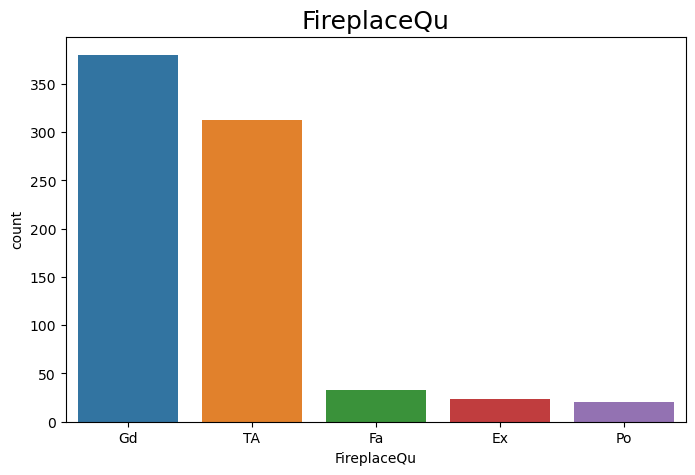

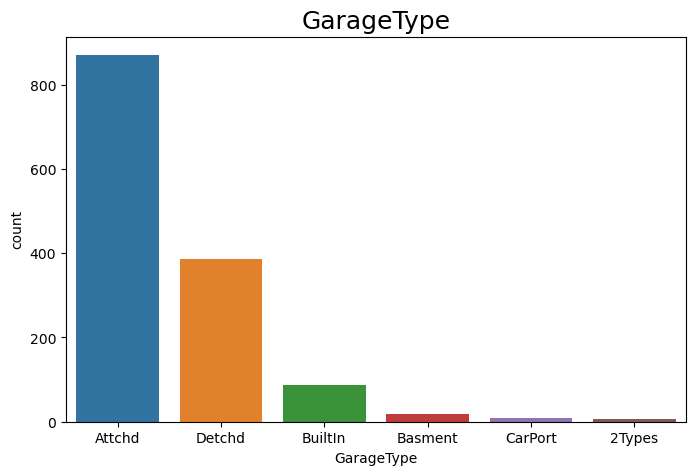

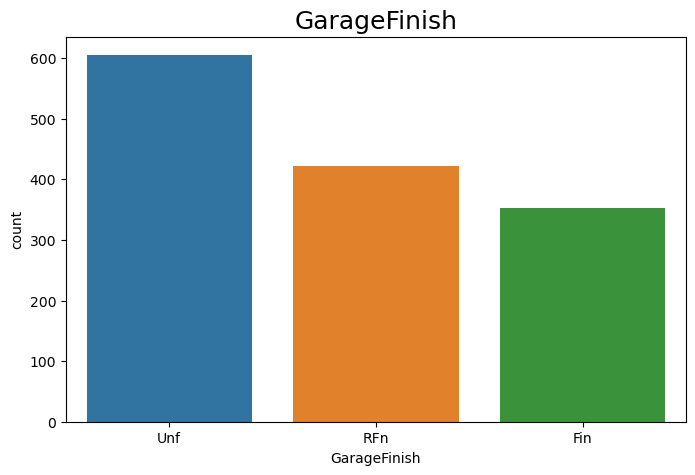

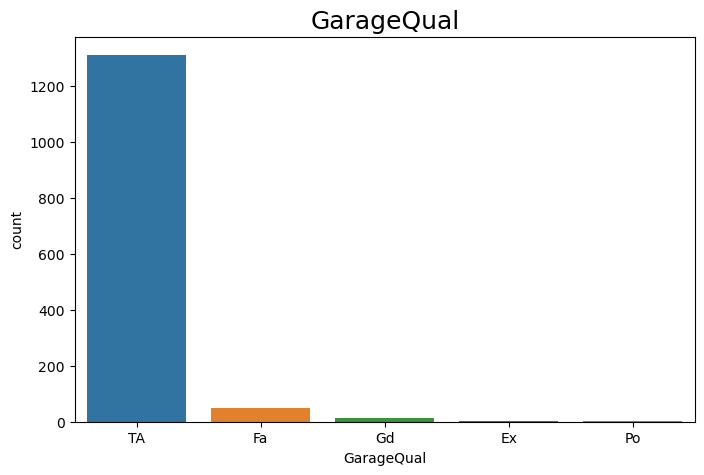

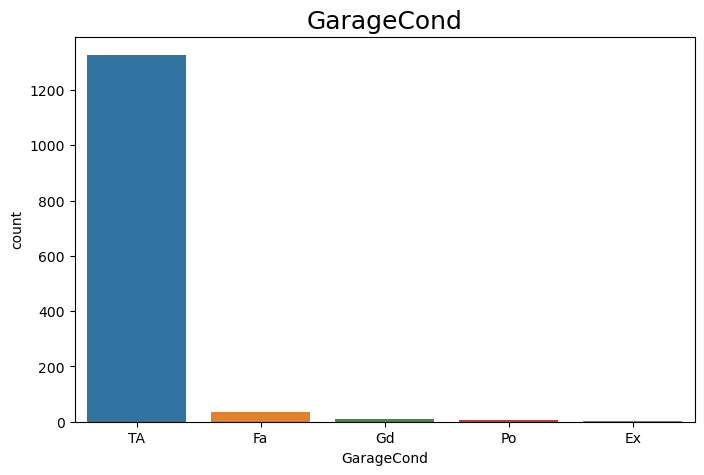

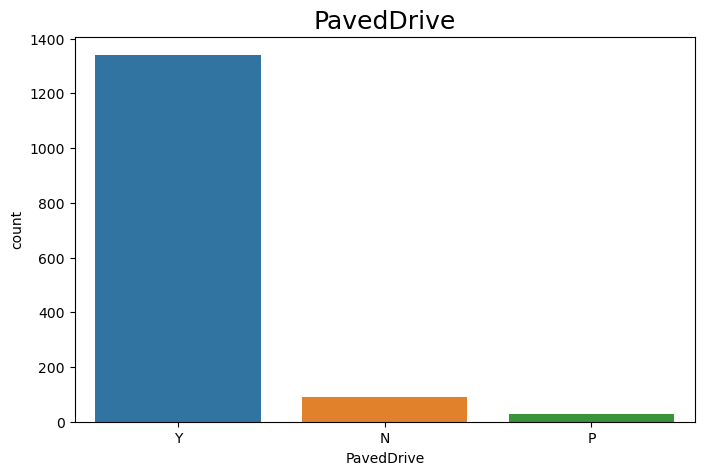

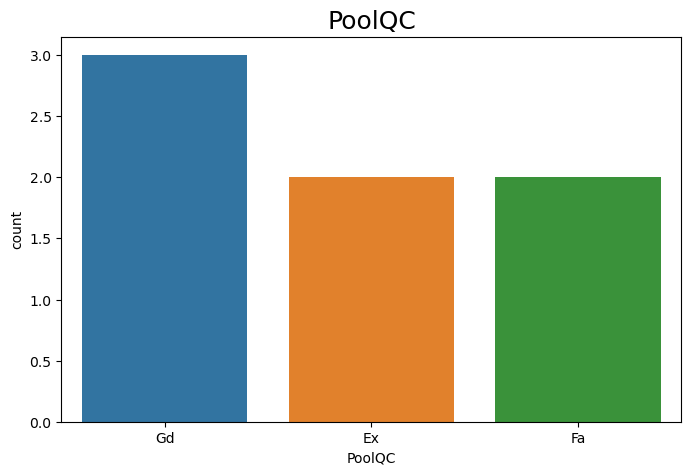

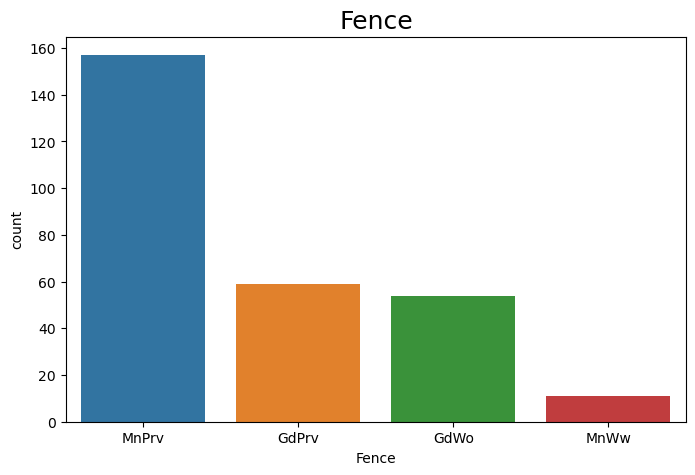

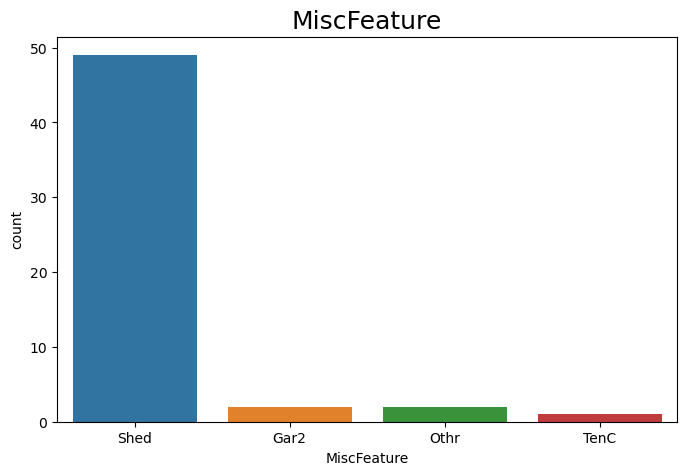

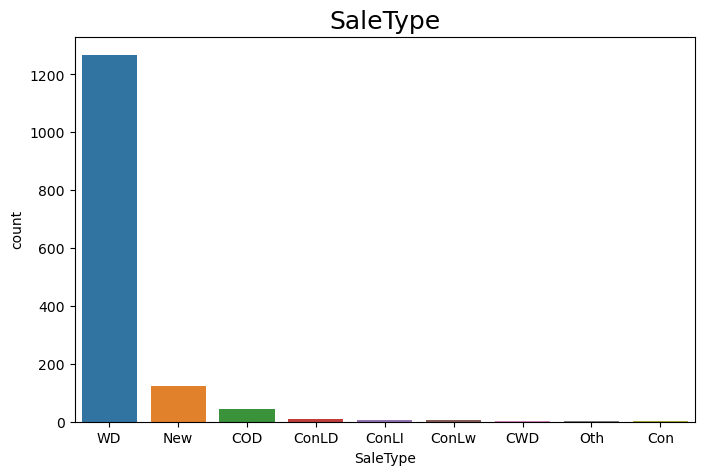

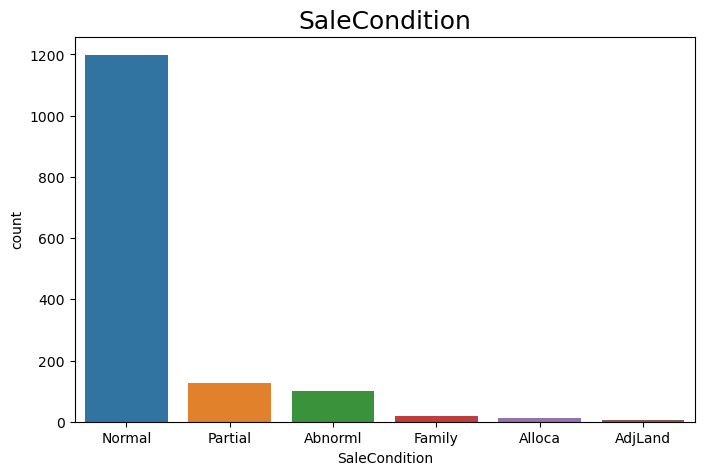

In [347]:
## Visualizing the categorical columns using bar plots
for col in df_categorical.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(x = df_categorical[col].value_counts().index, y = df_categorical[col].value_counts())
    plt.show()

Here we can observe that most of the categories are biased

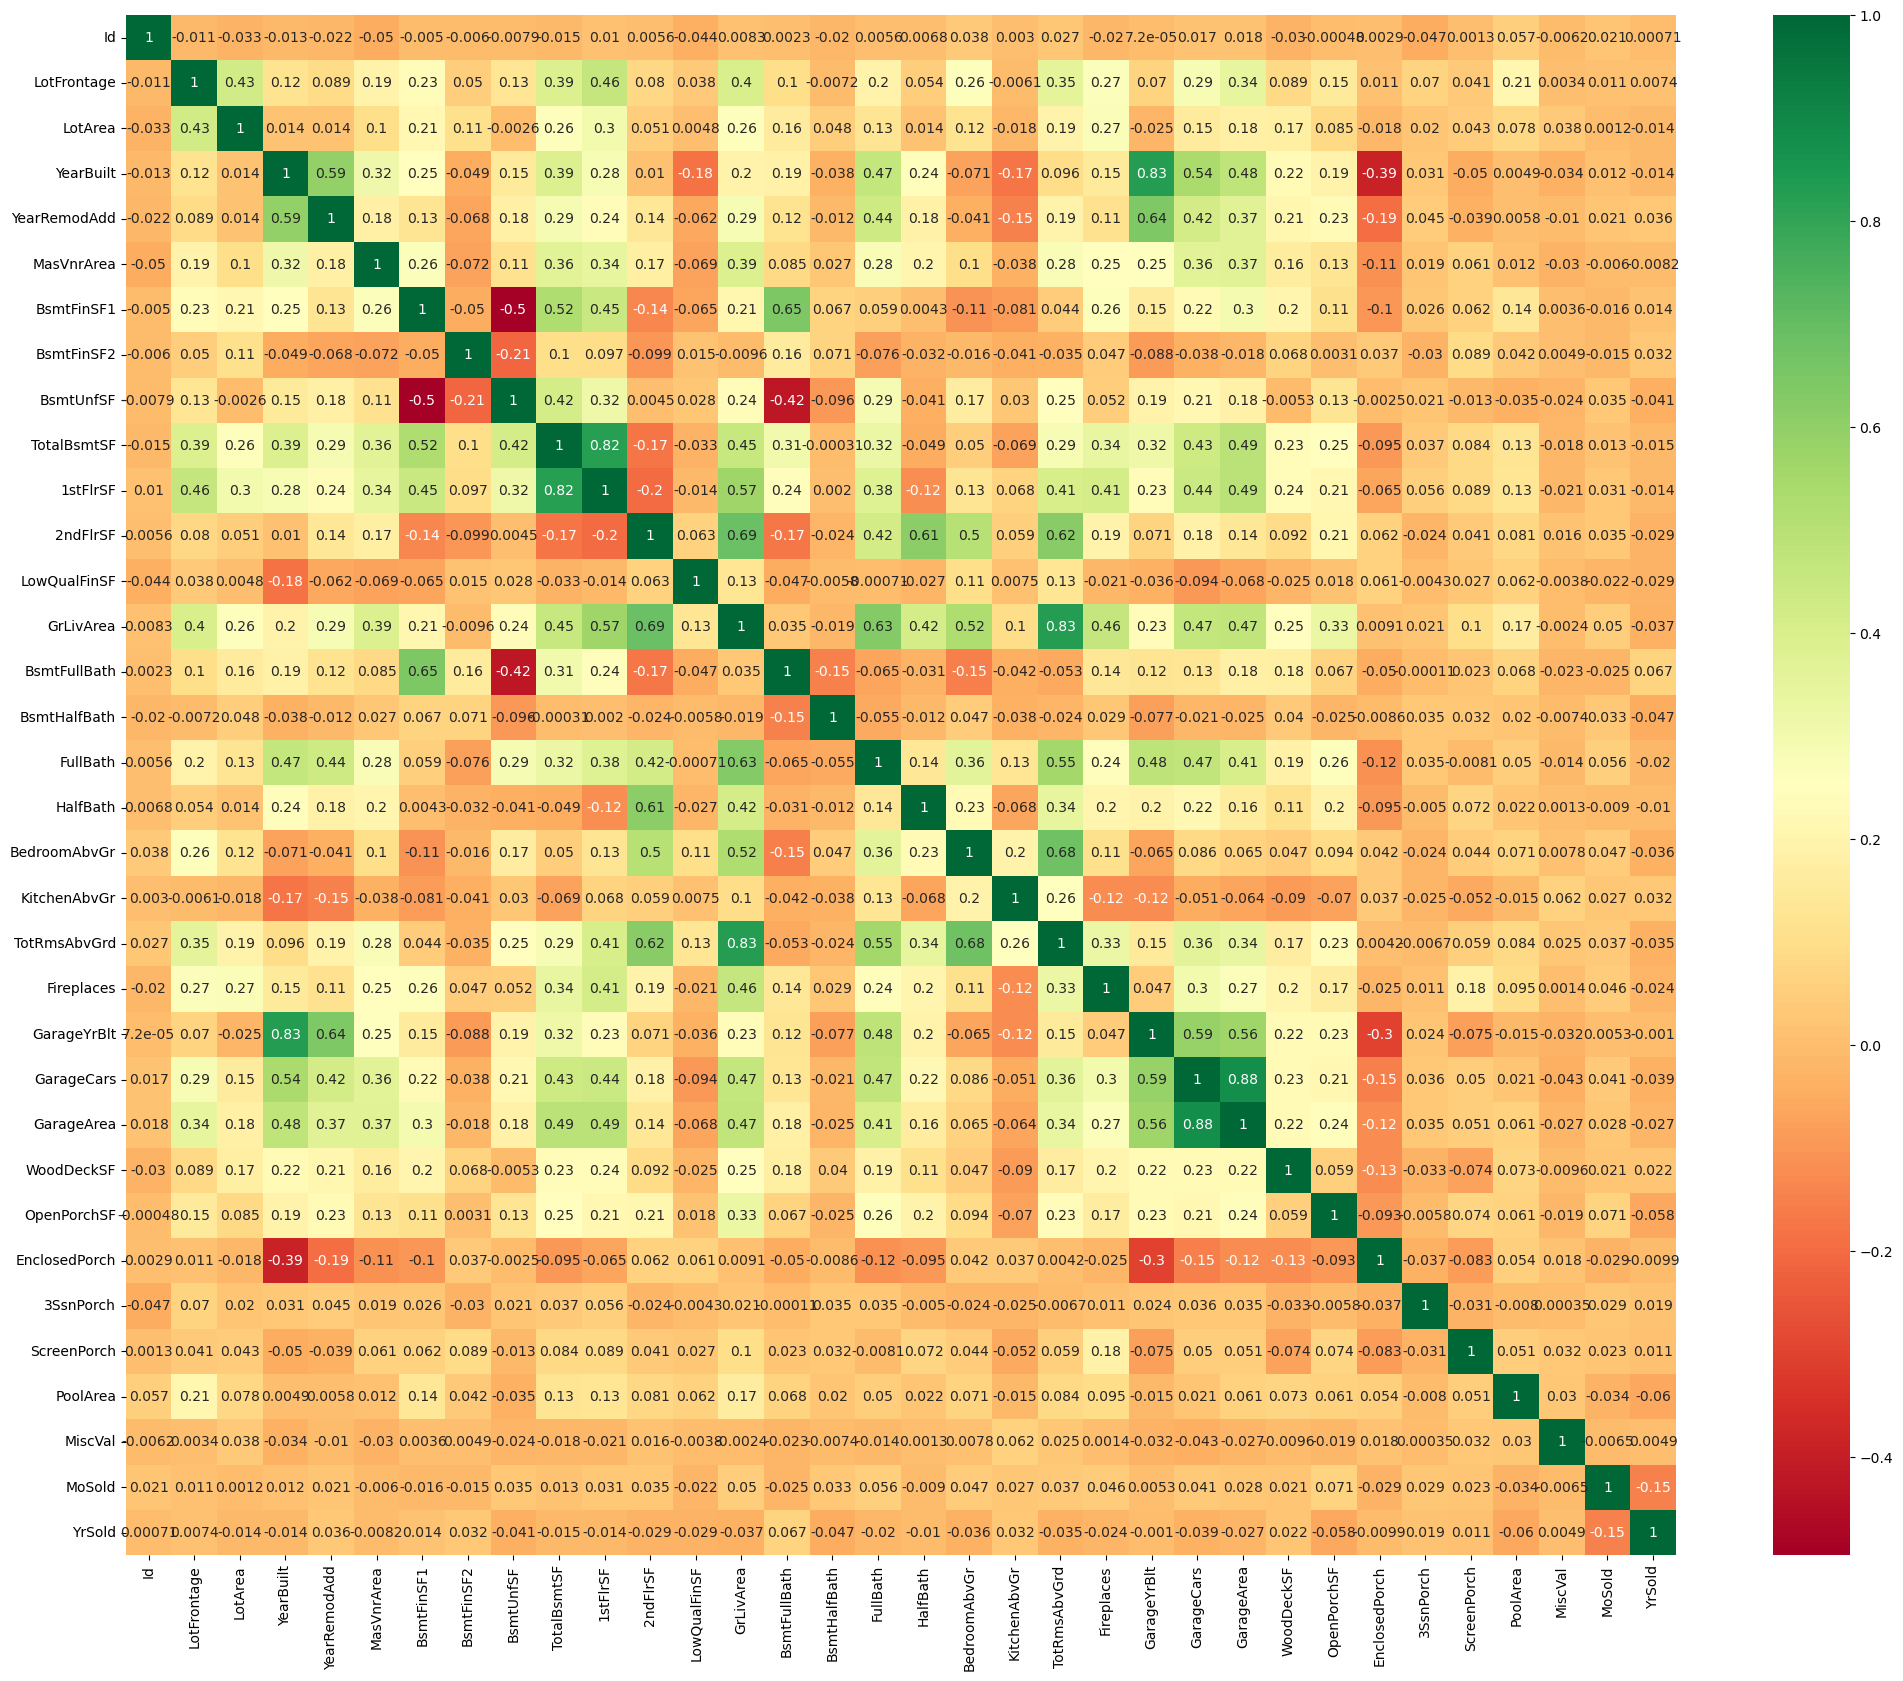

In [348]:
# Plot the heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df_numeric.corr(), annot=True, cmap='RdYlGn');

# Observations

- We can see that SalePrice(Target variable) is highly corelated with GrLivArea, GarageCars and GarageArea.

- Many columns are highly corelated

-  As we can see multicolinearity we can go for Ridge Regression

# Data Engineering

In [349]:
# Creating new columns for age
df['Age'] = df['YrSold'] - df['YearBuilt']

In [350]:
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [351]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave   NaN      Reg   
1   2         20       RL         80.0     9600   Pave   NaN      Reg   
2   3         60       RL         68.0    11250   Pave   NaN      IR1   
3   4         70       RL         60.0     9550   Pave   NaN      IR1   
4   5         60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  SaleType SaleCondition SalePrice  Age  
0       WD        Normal    208500    5  
1       WD        Normal    181500   31  
2       WD        Normal    223500    7  
3       WD       Abnorml    140000   91  
4       WD        Normal    250000    8  

[5 rows x 80 columns]

# Data Preprocessing

In [352]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Age                0
Length: 80, dtype: int64

In [353]:
for i in df.isna().sum().items():
    print(i)

('Id', 0)
('MSSubClass', 0)
('MSZoning', 0)
('LotFrontage', 259)
('LotArea', 0)
('Street', 0)
('Alley', 1369)
('LotShape', 0)
('LandContour', 0)
('Utilities', 0)
('LotConfig', 0)
('LandSlope', 0)
('Neighborhood', 0)
('Condition1', 0)
('Condition2', 0)
('BldgType', 0)
('HouseStyle', 0)
('OverallQual', 0)
('OverallCond', 0)
('YearRemodAdd', 0)
('RoofStyle', 0)
('RoofMatl', 0)
('Exterior1st', 0)
('Exterior2nd', 0)
('MasVnrType', 872)
('MasVnrArea', 8)
('ExterQual', 0)
('ExterCond', 0)
('Foundation', 0)
('BsmtQual', 37)
('BsmtCond', 37)
('BsmtExposure', 38)
('BsmtFinType1', 37)
('BsmtFinSF1', 0)
('BsmtFinType2', 38)
('BsmtFinSF2', 0)
('BsmtUnfSF', 0)
('TotalBsmtSF', 0)
('Heating', 0)
('HeatingQC', 0)
('CentralAir', 0)
('Electrical', 1)
('1stFlrSF', 0)
('2ndFlrSF', 0)
('LowQualFinSF', 0)
('GrLivArea', 0)
('BsmtFullBath', 0)
('BsmtHalfBath', 0)
('FullBath', 0)
('HalfBath', 0)
('BedroomAbvGr', 0)
('KitchenAbvGr', 0)
('KitchenQual', 0)
('TotRmsAbvGrd', 0)
('Functional', 0)
('Fireplaces', 0)
('

In [354]:
# Checking percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

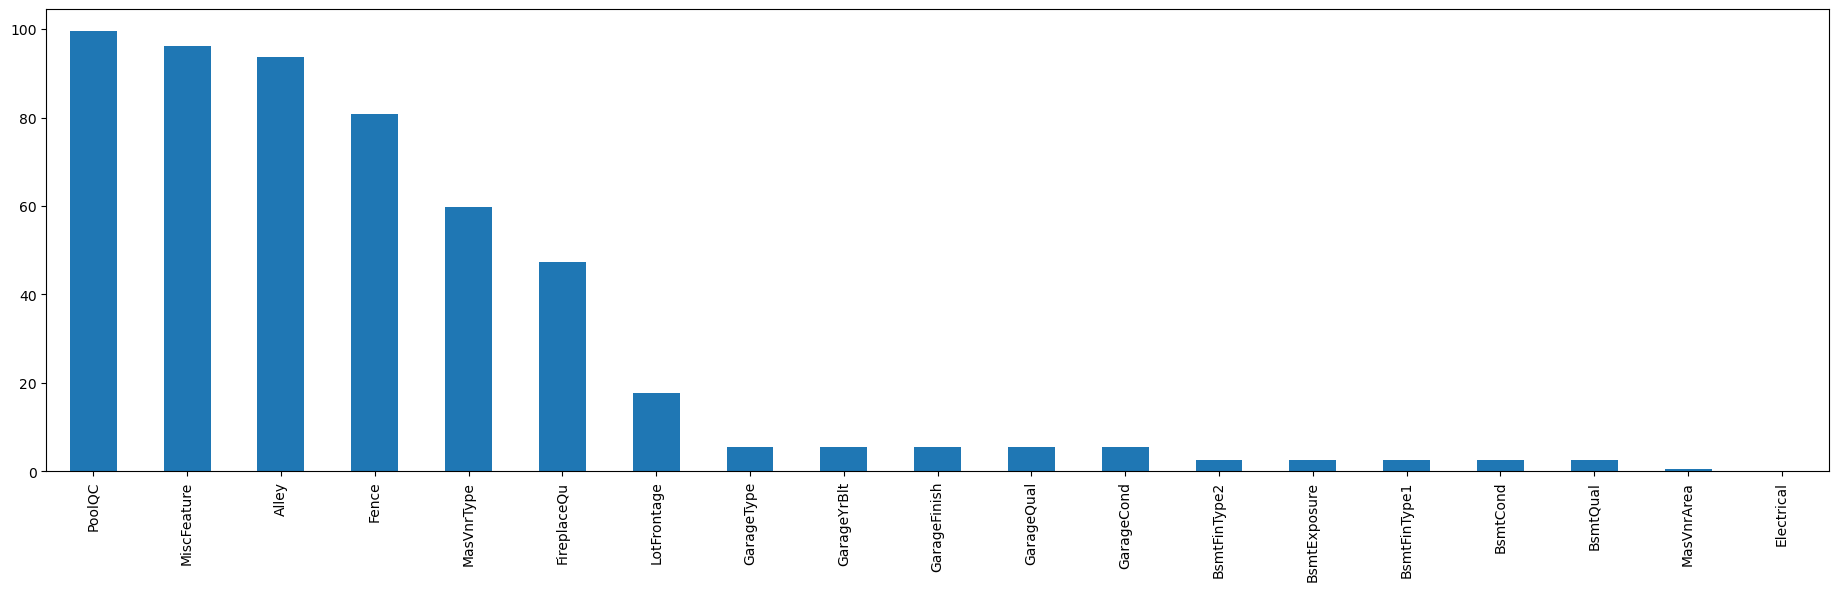

In [355]:
# Plotting the graph for the same
plt.figure(figsize=[23,6])
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False).plot.bar()
plt.show()

In [356]:
# Droping columns with missing values greater that 30%
dropable_cols=df.columns[(df.isnull().sum()/len(df)*100>30)]
df.drop(dropable_cols,axis=1, inplace=True)

In [357]:
# Checking percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [358]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

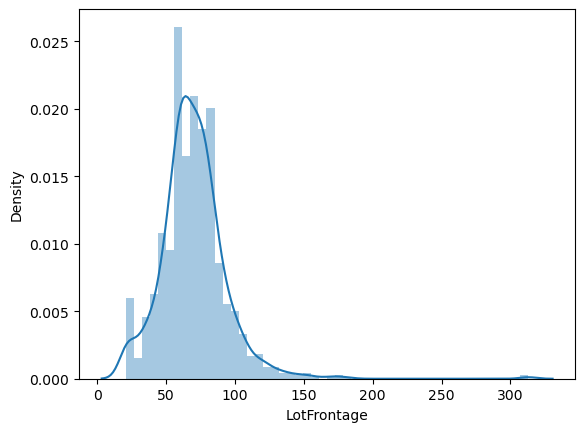

In [359]:
sns.distplot(df['LotFrontage'])
plt.show()

In [360]:
# We are imputing the null values with the median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

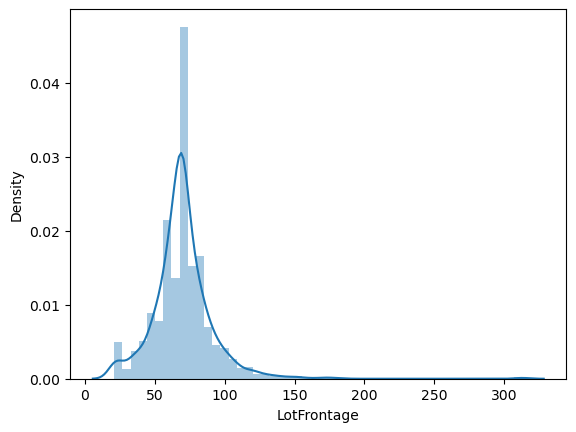

In [361]:
sns.distplot(df['LotFrontage'])
plt.show()

In [362]:
# dropping null values from rows
null_cols=df.columns[df.isnull().any()]
null_cols

Index(['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [363]:
df.dropna(subset=null_cols, inplace=True)
df.shape

(1338, 74)

In [364]:
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1         60       RL         65.0     8450   Pave      Reg         Lvl   
1   2         20       RL         80.0     9600   Pave      Reg         Lvl   
2   3         60       RL         68.0    11250   Pave      IR1         Lvl   
3   4         70       RL         60.0     9550   Pave      IR1         Lvl   
4   5         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold SaleType SaleCondition  SalePrice Age  
0       0      2       WD        Normal     208500   5  
1       0      5       WD        Normal     181500  31  
2       0      9       WD        Normal     223500   7  
3       0      2       WD       Abnorml     140000  91  
4       0     12       WD        Normal     250000   8  

[5 rows x 74 columns]

In [365]:
# As we know that Id is not a feature we can drop it
df.drop('Id', axis=1, inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         60       RL         65.0     8450   Pave      Reg         Lvl   
1         20       RL         80.0     9600   Pave      Reg         Lvl   
2         60       RL         68.0    11250   Pave      IR1         Lvl   
3         70       RL         60.0     9550   Pave      IR1         Lvl   
4         60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal MoSold SaleType  SaleCondition SalePrice Age  
0        0       0      2       WD         Normal    208500   5  
1        0       0      5       WD         Normal    181500  31  
2        0       0      9       WD         Normal    223500   7  
3        0       0      2       WD        Abnorml    140000  91  
4        0       0     12       WD         Normal    250000   8  

[5 rows x 73 columns]

In [366]:
# Checking percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

Series([], dtype: float64)

# Creating Dummy Variables

In [367]:
# Finding out the categorical variables
category_columns=df.select_dtypes('object').columns
category_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [368]:
dummies=pd.get_dummies(df[category_columns],drop_first=True)

In [369]:
dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0          False          False          False          False           True   
1          False          False          False          False          False   
2          False          False          False          False           True   
3          False          False          False          False          False   
4          False          False          False          False           True   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3           True          False          False          False          False   
4          False          False          False          False          False   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...           False           False         False         False   
1  ...           False           False         False         False   
2  ...           False           False         False         False   
3  ...           False           False         False         False   
4  ...           False           False         False         False   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0         True                  False                 False   
1         True                  False                 False   
2         True                  False                 False   
3         True                  False                 False   
4         True                  False                 False   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                 False                  True                  False  
1                 False                  True                  False  
2                 False                  True                  False  
3                 False                 False                  False  
4                 False                  True                  False  

[5 rows x 217 columns]

In [370]:
dummies.shape

(1338, 217)

# Handelling Outliers

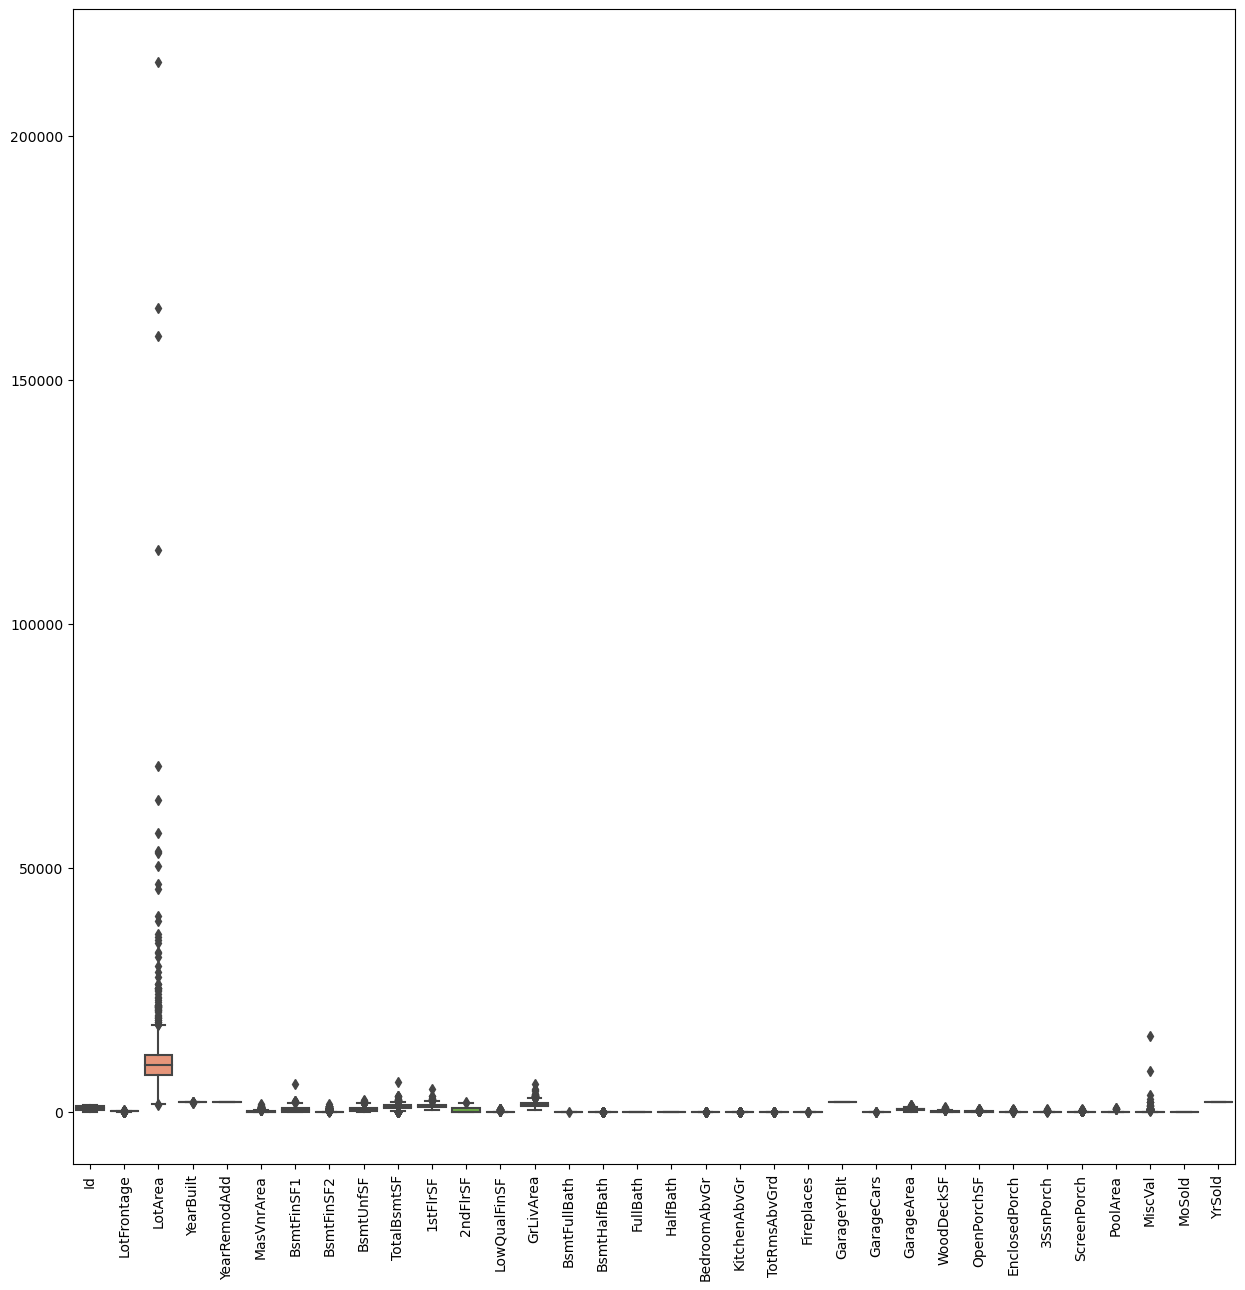

In [371]:
# Checking the boxplots to check outliers of numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric);

In [372]:
# Removing outliers less than 5% and greater than 95%
for col in df_numeric.columns:
    df_numeric[col][df_numeric[col] <= df_numeric[col].quantile(0.05)] = df_numeric[col].quantile(0.05)
    df_numeric[col][df_numeric[col] >= df_numeric[col].quantile(0.95)] = df_numeric[col].quantile(0.95)

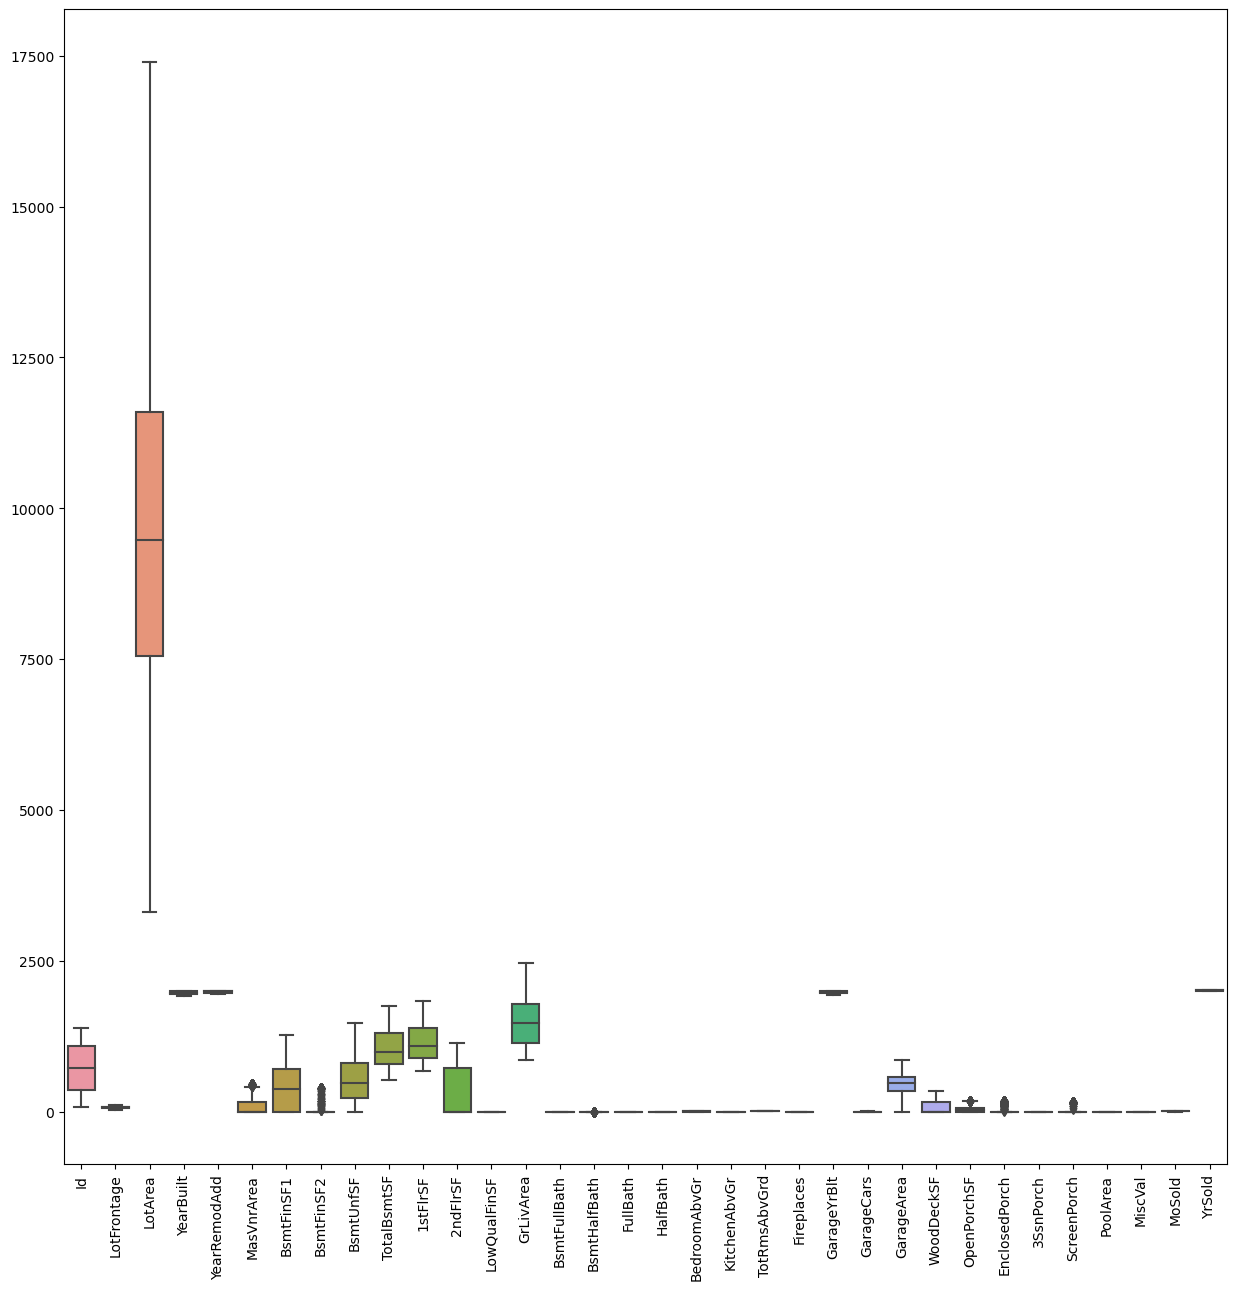

In [373]:
# Checking again
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric);

In [374]:
y = df["SalePrice"].copy()
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [375]:
df = pd.concat([df_num, dummies], axis=1)


## View the first few rows of our dataframe
df.head()

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0     8450          2003       196.0         706           0   
1         80.0     9600          1976         0.0         978           0   
2         68.0    11250          2002       162.0         486           0   
3         60.0     9550          1970         0.0         216           0   
4         84.0    14260          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  ...  SaleType_ConLI  \
0        150          856       856       854  ...           False   
1        284         1262      1262         0  ...           False   
2        434          920       920       866  ...           False   
3        540          756       961       756  ...           False   
4        490         1145      1145      1053  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 250 columns]

# Creating Model

In [376]:
X = df.drop('SalePrice', axis=1)

In [377]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=166, shuffle=True)

In [378]:
print(X_train.shape)
print(y_train.shape)

(1070, 249)
(1070,)


In [379]:
print(X_test.shape)
print(y_test.shape)

(268, 249)
(268,)


## Scalling data

In [380]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [381]:
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Ridge Regression

In [382]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [383]:
# Now we will use cross validation along with a list of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 30, 40, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 30, 40,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [384]:
ridgeCV.best_params_

{'alpha': 20}

In [294]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.4553504 , 0.4634119 , 0.26330385, 0.11125727, 0.07286749,
        0.03975334, 0.02872171, 0.02924695, 0.03166776, 0.03548985,
        0.03193531, 0.03175168, 0.0276011 , 0.02844934, 0.03000121,
        0.0281816 , 0.02895694, 0.02720447, 0.06687727, 0.04454541,
        0.03683171, 0.0386322 , 0.05105848, 0.05604019, 0.0363307 ,
        0.0430675 , 0.02741723, 0.06315818, 0.02671385, 0.02461162]),
 'std_fit_time': array([0.01048215, 0.04238746, 0.21183646, 0.04707554, 0.02820987,
        0.00185289, 0.00367995, 0.00178468, 0.00184113, 0.00413253,
        0.00157736, 0.00175007, 0.00174253, 0.00240191, 0.00328087,
        0.00069688, 0.00176226, 0.00240374, 0.04350316, 0.01628745,
        0.00754691, 0.01422229, 0.02114901, 0.02149196, 0.01323066,
        0.01616175, 0.00160184, 0.01901373, 0.00544253, 0.00120252]),
 'mean_score_time': array([0.03223944, 0.03072538, 0.02989082, 0.01565776, 0.01192946,
        0.00911565, 0.00739646, 0.00720482, 0.00771275, 0.00

We got best value of alpha as 0.0001

In [385]:
ridge = Ridge(alpha=20)

In [386]:
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [387]:
ridge.coef_

array([-3.29510492e+03,  1.46159296e+03,  3.34567948e+03,  3.05645381e+03,
       -6.09364014e+02, -2.05765850e+02, -3.28551368e+02, -1.11199772e+03,
        8.18517770e+03,  1.05190102e+04,  2.17673616e+02,  1.49587101e+04,
        3.73661512e+03,  2.01255337e+02,  5.41221209e+03,  1.88167895e+03,
       -2.67147939e+03, -5.73300050e+03,  5.90239979e+03,  3.47634555e+03,
       -3.72781746e+03,  8.45878340e+03,  2.20411497e+03,  3.18392094e+03,
        2.85812664e+02,  6.07672134e+02,  1.46774965e+03,  2.87203947e+03,
        1.48216298e+03,  6.72611688e+01, -1.07396216e+02, -6.72035412e+03,
       -4.13523871e+03,  9.49550459e+02,  1.96543149e+03, -8.05082347e+02,
       -1.46540389e+03,  4.07232565e+03,  1.23955849e+03, -1.84876930e+02,
       -8.51537802e+02, -5.68501598e+02, -7.53648679e+03, -9.13718132e+03,
       -2.79836384e+03, -1.95471500e+03,  5.05634984e+03,  1.36469953e+03,
        2.67695861e+03, -4.68928558e+03,  3.73283939e+03,  8.80314303e+03,
       -9.20674210e+03, -

In [388]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [389]:
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.88
R-Squared (Test) = 0.86
RSS (Train) = 796245003832.30
RSS (Test) = 236430199123.07
MSE (Train) = 744154209.19
MSE (Test) = 882202235.53
RMSE (Train) = 27279.19
RMSE (Test) = 29701.89


We can see that our model is next to perfect

In [390]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.263015      0.027456         0.017711        0.010322      0.0001   
1        0.279512      0.044126         0.016759        0.013901       0.001   
2        0.126256      0.092611         0.019816        0.014689        0.01   
3        0.045509      0.024111         0.018318        0.018137        0.05   
4        0.029842      0.002245         0.018040        0.012364         0.1   
5        0.030430      0.000780         0.007993        0.000661         0.2   
6        0.029925      0.002022         0.008382        0.001722         0.3   
7        0.028340      0.000720         0.008566        0.000464         0.4   
8        0.029117      0.000921         0.008823        0.001433         0.5   
9        0.032817      0.004146         0.008603        0.001208         0.6   
10       0.048512      0.033526         0.027512        0.037527         0.7   
11       0.035636      0.007191         0.008907        0.001350         0.8   
12       0.033103      0.002340         0.008404        0.000493         0.9   
13       0.042317      0.015829         0.016464        0.015434         1.0   
14       0.029701      0.001575         0.009119        0.001379         2.0   
15       0.032049      0.005184         0.011307        0.007369         3.0   
16       0.029724      0.000679         0.008802        0.000748         4.0   
17       0.029202      0.001934         0.020611        0.013864         5.0   
18       0.029524      0.001524         0.009108        0.002110         6.0   
19       0.029205      0.000980         0.015604        0.015224         7.0   
20       0.031328      0.004397         0.008303        0.000402         8.0   
21       0.030424      0.001225         0.008700        0.000747         9.0   
22       0.045025      0.032279         0.012905        0.006285          10   
23       0.043728      0.032429         0.008001        0.000624          20   
24       0.052242      0.041037         0.056313        0.039040          30   
25       0.047826      0.038400         0.008201        0.000748          40   
26       0.040513      0.020532         0.008111        0.000665          50   
27       0.041753      0.014222         0.027268        0.032791         100   
28       0.038035      0.017285         0.015885        0.015348         500   
29       0.031024      0.002210         0.009814        0.003198        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -19336.342375      -19633.358201   
1    {'alpha': 0.001}      -19337.650351      -19672.286318   
2     {'alpha': 0.01}      -19496.674908      -20077.249351   
3     {'alpha': 0.05}      -20304.505684      -21137.286642   
4      {'alpha': 0.1}      -20596.865370      -21510.626887   
5      {'alpha': 0.2}      -20624.231520      -21635.249000   
6      {'alpha': 0.3}      -20531.080942      -21541.025725   
7      {'alpha': 0.4}      -20430.462558      -21408.376644   
8      {'alpha': 0.5}      -20354.954979      -21268.049857   
9      {'alpha': 0.6}      -20291.812794      -21137.893387   
10     {'alpha': 0.7}      -20243.331376      -21019.249423   
11     {'alpha': 0.8}      -20189.586845      -20913.658437   
12     {'alpha': 0.9}      -20131.719784      -20818.348231   
13     {'alpha': 1.0}      -20071.834261      -20731.748178   
14     {'alpha': 2.0}      -19672.669233      -20098.955923   
15     {'alpha': 3.0}      -19426.325563      -19769.129279   
16     {'alpha': 4.0}      -19223.598059      -19553.539368   
17     {'alpha': 5.0}      -19083.719535      -19391.258621   
18     {'alpha': 6.0}      -18984.186742      -19283.201065   
19     {'alpha': 7.0}      -18939.870748      -19191.231857   
20     {'alpha': 8.0}      -18900.049178      -19110.462378   
21     {'alpha': 9.0}      -18862.890500      -19044.253246   
22      {'alpha': 10}      -18827.805247      -18983.664290   
23      {'a

# Lasso Model

In [391]:
 # Now we will create a Lasso model and will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [392]:
lassoCV.best_params_

{'alpha': 100}

In [393]:
lassoCV.cv_results_

{'mean_fit_time': array([0.81603236, 0.86032991, 0.7106308 , 0.7660512 , 0.71762786,
        0.69907203, 0.80205135, 0.62875967, 0.7866456 , 0.77594481,
        0.74311342, 0.66740322, 0.8190352 , 0.79988728, 0.80952091,
        0.56860647, 0.67495265, 0.53151135, 0.47231503, 0.45612383,
        0.44452796, 0.42349062, 0.40521941, 0.33801928, 0.38651681,
        0.37305884, 0.46223216, 0.24107251, 0.09027276, 0.04930949]),
 'std_fit_time': array([0.1291324 , 0.10878412, 0.07648886, 0.07510499, 0.12343021,
        0.1104924 , 0.15427975, 0.10766117, 0.07222319, 0.13940156,
        0.21435205, 0.08533087, 0.13547027, 0.0815823 , 0.07891198,
        0.13078364, 0.18620232, 0.1428813 , 0.16580718, 0.1906873 ,
        0.13049105, 0.12735711, 0.09491624, 0.15318459, 0.22718964,
        0.16543441, 0.08704977, 0.03990356, 0.02876836, 0.01563764]),
 'mean_score_time': array([0.01148896, 0.01052966, 0.01100707, 0.01126266, 0.01041217,
        0.01120262, 0.0120079 , 0.01223021, 0.01080217, 0.01

We got the optimum value of lass model at 0.3

In [394]:
# Creating the model
lasso = Lasso(alpha=100)

In [395]:
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [396]:
lasso.coef_

array([-3.54329180e+03,  1.54886267e+03,  2.88099802e+03,  2.02829662e+03,
       -7.79511463e-01, -0.00000000e+00,  0.00000000e+00, -3.70256833e+03,
        0.00000000e+00,  9.74663672e+02, -9.34727644e+02,  2.76490380e+04,
        3.69929085e+03,  2.18160050e+02,  4.54496160e+03,  1.23692963e+03,
       -2.17023831e+03, -4.87721600e+03,  4.12652683e+03,  2.64727109e+03,
       -3.05502950e+03,  7.64552728e+03,  1.09013931e+03,  2.31504933e+03,
        2.28594939e+02,  3.62266963e+02,  1.53201100e+03,  2.78404648e+03,
        1.36938784e+03, -0.00000000e+00, -4.57342486e+02, -7.13704778e+03,
       -5.03560447e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.97092250e+01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -8.16507717e+02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.77563694e+03,  0.00000000e+00,  1.03759830e+04,
       -1.41166458e+04,  

In [397]:
# Predicting output
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [398]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.89
R-Squared (Test) = 0.88
RSS (Train) = 710555825348.22
RSS (Test) = 207456292505.98
MSE (Train) = 664070864.81
MSE (Test) = 774090643.68
RMSE (Train) = 25769.57
RMSE (Test) = 27822.48


We can observe that this model is also very good but ridge model has better results

In [399]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.816032      0.129132         0.011489        0.001485      0.0001   
1        0.860330      0.108784         0.010530        0.001004       0.001   
2        0.710631      0.076489         0.011007        0.001094        0.01   
3        0.766051      0.075105         0.011263        0.001575        0.05   
4        0.717628      0.123430         0.010412        0.000738         0.1   
5        0.699072      0.110492         0.011203        0.000751         0.2   
6        0.802051      0.154280         0.012008        0.001253         0.3   
7        0.628760      0.107661         0.012230        0.001135         0.4   
8        0.786646      0.072223         0.010802        0.001604         0.5   
9        0.775945      0.139402         0.011314        0.001337         0.6   
10       0.743113      0.214352         0.014726        0.003842         0.7   
11       0.667403      0.085331         0.020618        0.017003         0.8   
12       0.819035      0.135470         0.032713        0.026328         0.9   
13       0.799887      0.081582         0.012004        0.001096         1.0   
14       0.809521      0.078912         0.012617        0.000844         2.0   
15       0.568606      0.130784         0.011169        0.001509         3.0   
16       0.674953      0.186202         0.012448        0.001523         4.0   
17       0.531511      0.142881         0.010880        0.001026         5.0   
18       0.472315      0.165807         0.010734        0.001038         6.0   
19       0.456124      0.190687         0.010769        0.001255         7.0   
20       0.444528      0.130491         0.011580        0.001324         8.0   
21       0.423491      0.127357         0.009751        0.001746         9.0   
22       0.405219      0.094916         0.008076        0.000908        10.0   
23       0.338019      0.153185         0.008851        0.001911          20   
24       0.386517      0.227190         0.010323        0.001901          30   
25       0.373059      0.165434         0.009766        0.001782          40   
26       0.462232      0.087050         0.011708        0.004871          50   
27       0.241073      0.039904         0.009913        0.001196         100   
28       0.090273      0.028768         0.009450        0.000839         500   
29       0.049309      0.015638         0.008235        0.001026        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -19438.883047      -19585.904146   
1    {'alpha': 0.001}      -19435.984322      -19586.250611   
2     {'alpha': 0.01}      -19406.479120      -19589.155375   
3     {'alpha': 0.05}      -19275.858812      -19602.080189   
4      {'alpha': 0.1}      -19132.027709      -19600.485557   
5      {'alpha': 0.2}      -18848.134873      -19580.210167   
6      {'alpha': 0.3}      -18724.927684      -19559.531866   
7      {'alpha': 0.4}      -18684.247143      -19534.855876   
8      {'alpha': 0.5}      -18643.495312      -19510.799820   
9      {'alpha': 0.6}      -18605.129014      -19487.893288   
10     {'alpha': 0.7}      -18569.098985      -19464.102963   
11     {'alpha': 0.8}      -18534.596697      -19437.346018   
12     {'alpha': 0.9}      -18501.650462      -19410.471805   
13     {'alpha': 1.0}      -18468.820433      -19384.127543   
14     {'alpha': 2.0}      -18127.315347      -19194.934387   
15     {'alpha': 3.0}      -17843.711871      -19019.639954   
16     {'alpha': 4.0}      -17625.584477      -18852.907421   
17     {'alpha': 5.0}      -17456.832513      -18689.882627   
18     {'alpha': 6.0}      -17329.559955      -18546.432743   
19     {'alpha': 7.0}      -17204.817481      -18410.486307   
20     {'alpha': 8.0}      -17091.809937      -18310.248832   
21     {'alpha': 9.0}      -17005.268689      -18233.216943   
22    {'alpha': 10.0}      -16992.063414      -18167.248884   
23      {'a

# So we can say that the Ridge model performed better

# Question

## Question 1

In [400]:
ridge = Ridge(alpha=40)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [401]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [402]:
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.87
R-Squared (Test) = 0.85
RSS (Train) = 888755959394.72
RSS (Test) = 254174931123.73
MSE (Train) = 830613046.16
MSE (Test) = 948413922.10
RMSE (Train) = 28820.36
RMSE (Test) = 30796.33


In [403]:
lasso = Lasso(alpha=200)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=200)

In [404]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [405]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.88
R-Squared (Test) = 0.87
RSS (Train) = 815589517610.60
RSS (Test) = 227583632010.34
MSE (Train) = 762233194.03
MSE (Test) = 849192656.76
RMSE (Train) = 27608.57
RMSE (Test) = 29140.91


C Part

In [406]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, ...]

[249 rows x 0 columns]

In [407]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [408]:
betas 

Ridge        Lasso
LotFrontage           -2861.584834 -3015.862463
LotArea                1450.786608  1476.528540
YearRemodAdd           4146.099423  3599.549551
MasVnrArea             3635.120134  1604.062361
BsmtFinSF1              349.845711    -0.000000
...                            ...          ...
SaleCondition_AdjLand   488.272268     0.000000
SaleCondition_Alloca   1964.425341     0.000000
SaleCondition_Family  -1392.218878    -0.000000
SaleCondition_Normal   2612.300819  2487.700329
SaleCondition_Partial  5890.917775     0.000000

[249 rows x 2 columns]

In [409]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           21895.804426
Neighborhood_NoRidge    14236.624911
Neighborhood_NridgHt    14054.357816
GrLivArea               13801.208647
Neighborhood_StoneBr    12188.207319
BsmtExposure_Gd         11977.393577
2ndFlrSF                 9591.748841
Condition1_Norm          8863.996621
GarageCars               8607.961999
Functional_Typ           8590.161983
Name: Ridge, dtype: float64

In [410]:
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

SaleCondition_Partial    inf
Condition1_Norm          inf
Functional_Typ           inf
Neighborhood_StoneBr     inf
Neighborhood_Somerst     inf
GarageType_Attchd        inf
GarageType_BuiltIn       inf
Neighborhood_NridgHt     inf
Neighborhood_NoRidge     inf
GarageQual_Gd            inf
Name: Ridge, dtype: float64

In [411]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           64344.594688
OverallQual_10          45633.276092
Neighborhood_NoRidge    33971.700627
Neighborhood_StoneBr    32162.745350
GrLivArea               25594.192996
Neighborhood_NridgHt    24225.645032
OverallQual_8           21456.891549
Neighborhood_Crawfor    19196.403411
SaleType_New            18276.576449
BsmtExposure_Gd         17415.538988
Name: Lasso, dtype: float64

In [412]:
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

LandSlope_Mod          inf
3SsnPorch              inf
PoolArea               inf
HouseStyle_1Story      inf
Exterior2nd_ImStucc    inf
RoofMatl_WdShngl       inf
BsmtFinType1_GLQ       inf
SaleType_New           inf
Exterior1st_BrkFace    inf
BsmtExposure_Gd        inf
Name: Lasso, dtype: float64

## Ques 4

In [413]:
top_var_lasso = ["LandSlope_Mod","3SsnPorch","PoolArea","HouseStyle_1Story","Exterior2nd_ImStucc"]

In [414]:
X_train_dropped = X_train.drop(top_var_lasso, axis=1)
X_test_dropped = X_test.drop(top_var_lasso, axis=1)

In [415]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [416]:
lassoCV.best_params_

{'alpha': 100}

The alpha value is modified to 100 now

In [417]:
lasso = Lasso(alpha=100)

In [418]:
lasso.fit(X_train_dropped, y_train)

Lasso(alpha=100)

In [419]:
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [420]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.89
R-Squared (Test) = 0.88
RSS (Train) = 726407424307.93
RSS (Test) = 204803905524.06
MSE (Train) = 678885443.28
MSE (Test) = 764193677.33
RMSE (Train) = 26055.43
RMSE (Test) = 27644.05


In [421]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

Lasso Regression
Metric                            
R2 Score (Train)      8.897002e-01
R2 Score (Test)       8.822342e-01
RSS (Train)           7.264074e+11
RSS (Test)            2.048039e+11
MSE (Train)           6.788854e+08
MSE (Test)            7.641937e+08
RMSE (Train)          2.605543e+04
RMSE (Test)           2.764405e+04

In [422]:
betas = pd.DataFrame(index=X_train_dropped.columns)
betas.rows = X_train_dropped.columns
betas

Empty DataFrame
Columns: []
Index: [LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, MiscVal, MoSold, Age, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, Condition2_RRAe, Condition2_RRAn, Condition2_RRNn, ...]

[244 rows x 0 columns]

In [423]:
betas['Lasso'] = lasso.coef_

In [424]:
betas 

Lasso
LotFrontage           -2891.032026
LotArea                1145.574821
YearRemodAdd           2887.482298
MasVnrArea             1865.873517
BsmtFinSF1               -0.000000
...                            ...
SaleCondition_AdjLand     0.000000
SaleCondition_Alloca   1571.157841
SaleCondition_Family     -0.000000
SaleCondition_Normal   3216.688911
SaleCondition_Partial     0.000000

[244 rows x 1 columns]

In [425]:
betas['Lasso'].sort_values(ascending=False)[:5]

OverallQual_9           62194.492914
OverallQual_10          59848.814073
Neighborhood_NoRidge    37515.922836
Neighborhood_StoneBr    36067.457978
RoofMatl_WdShngl        32906.317791
Name: Lasso, dtype: float64